In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import mplhep as hep
from scipy.optimize import curve_fit
import pandas as pd
import mplhep as hep
hep.style.use(hep.style.ROOT)

def Gauss(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

In [2]:
hep.style.use(hep.style.ROOT)

### Threshold Variation

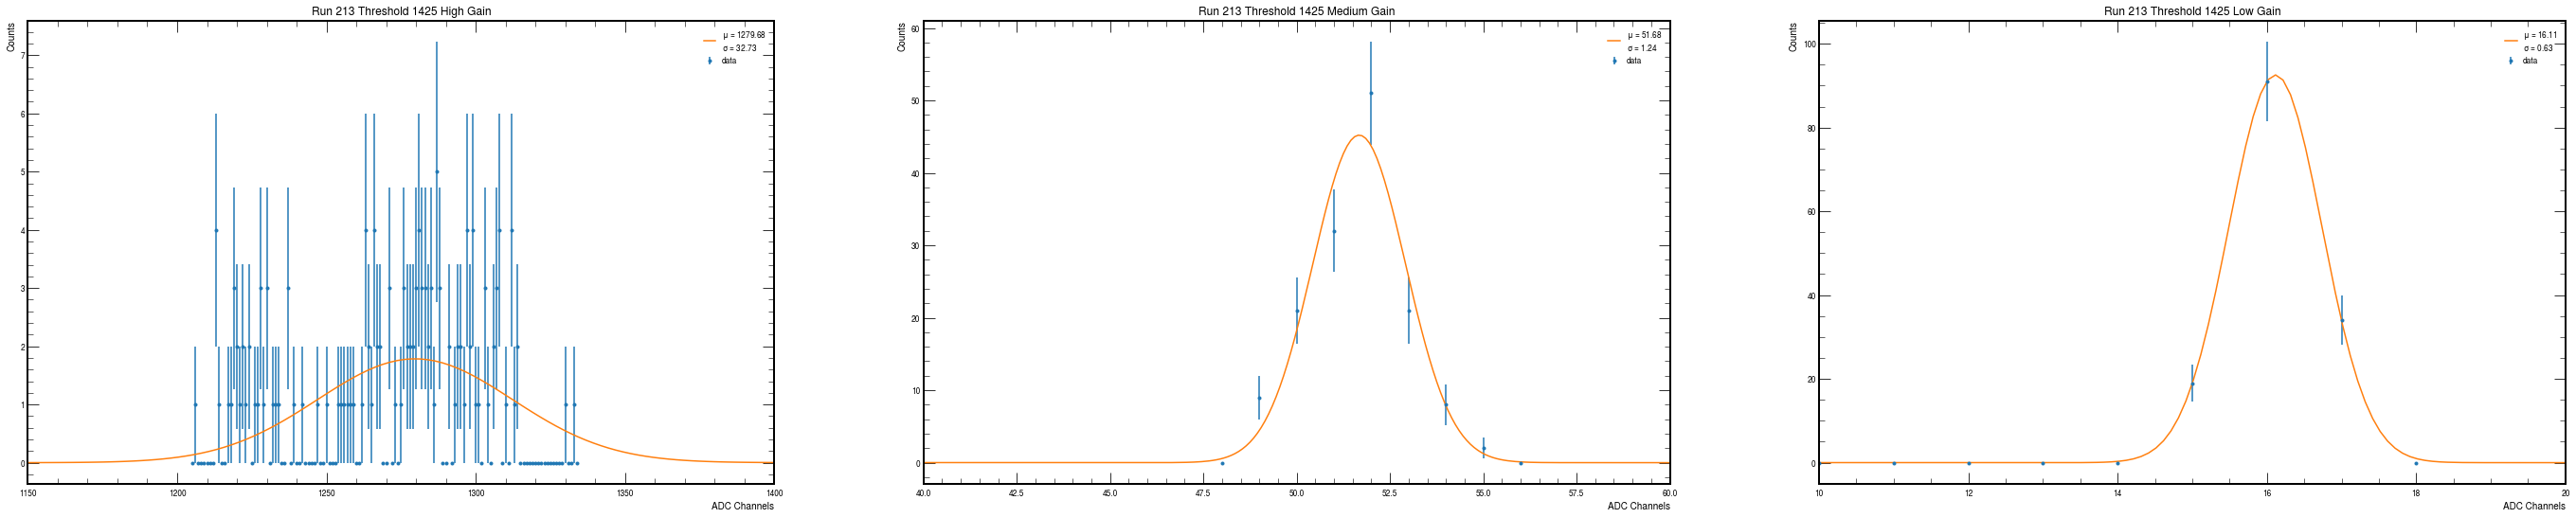

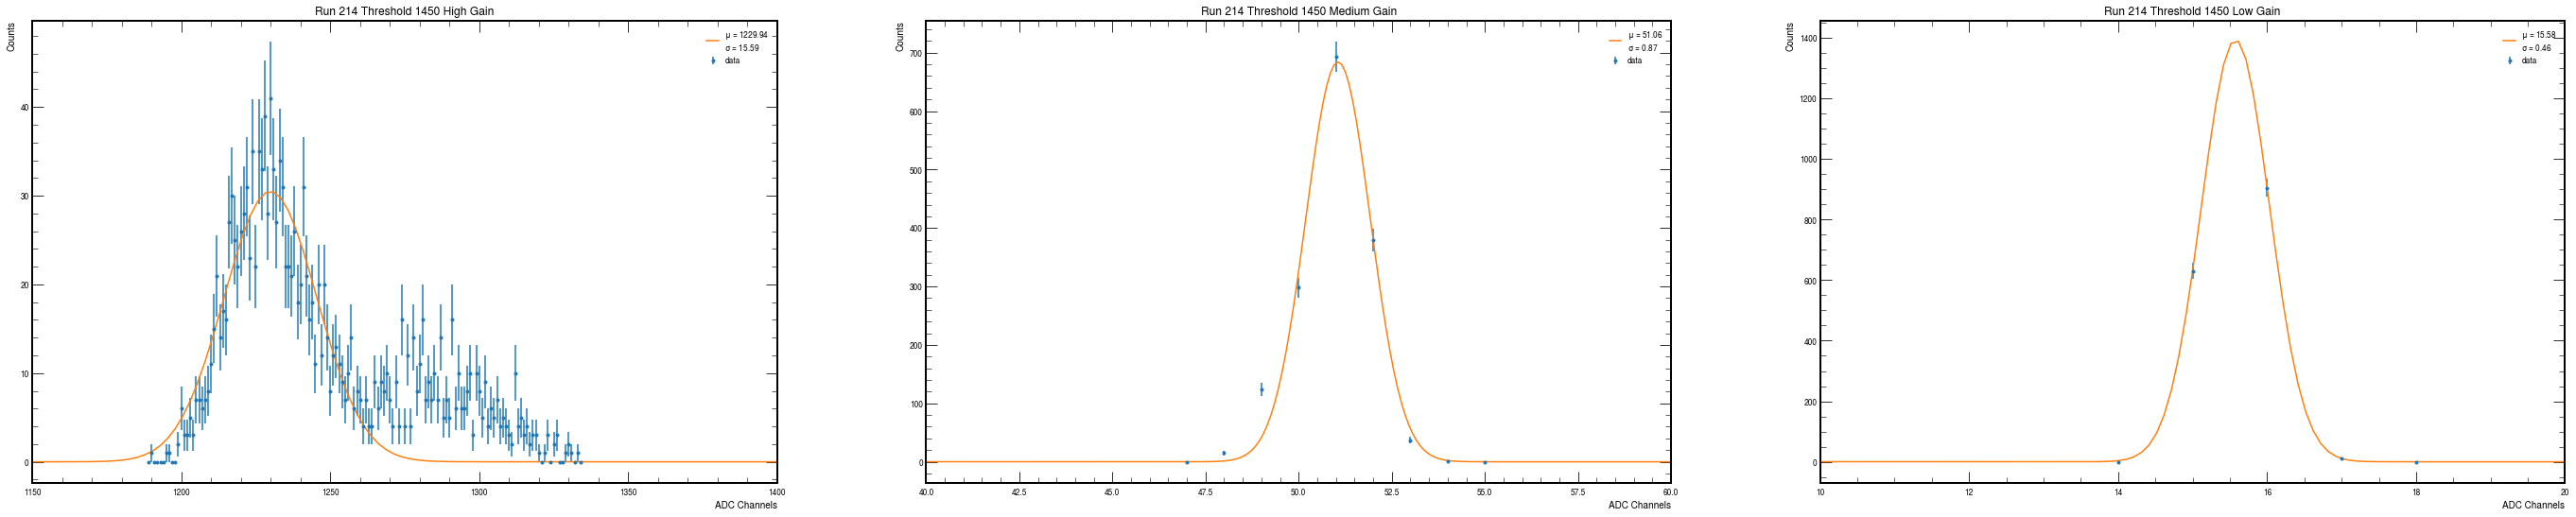

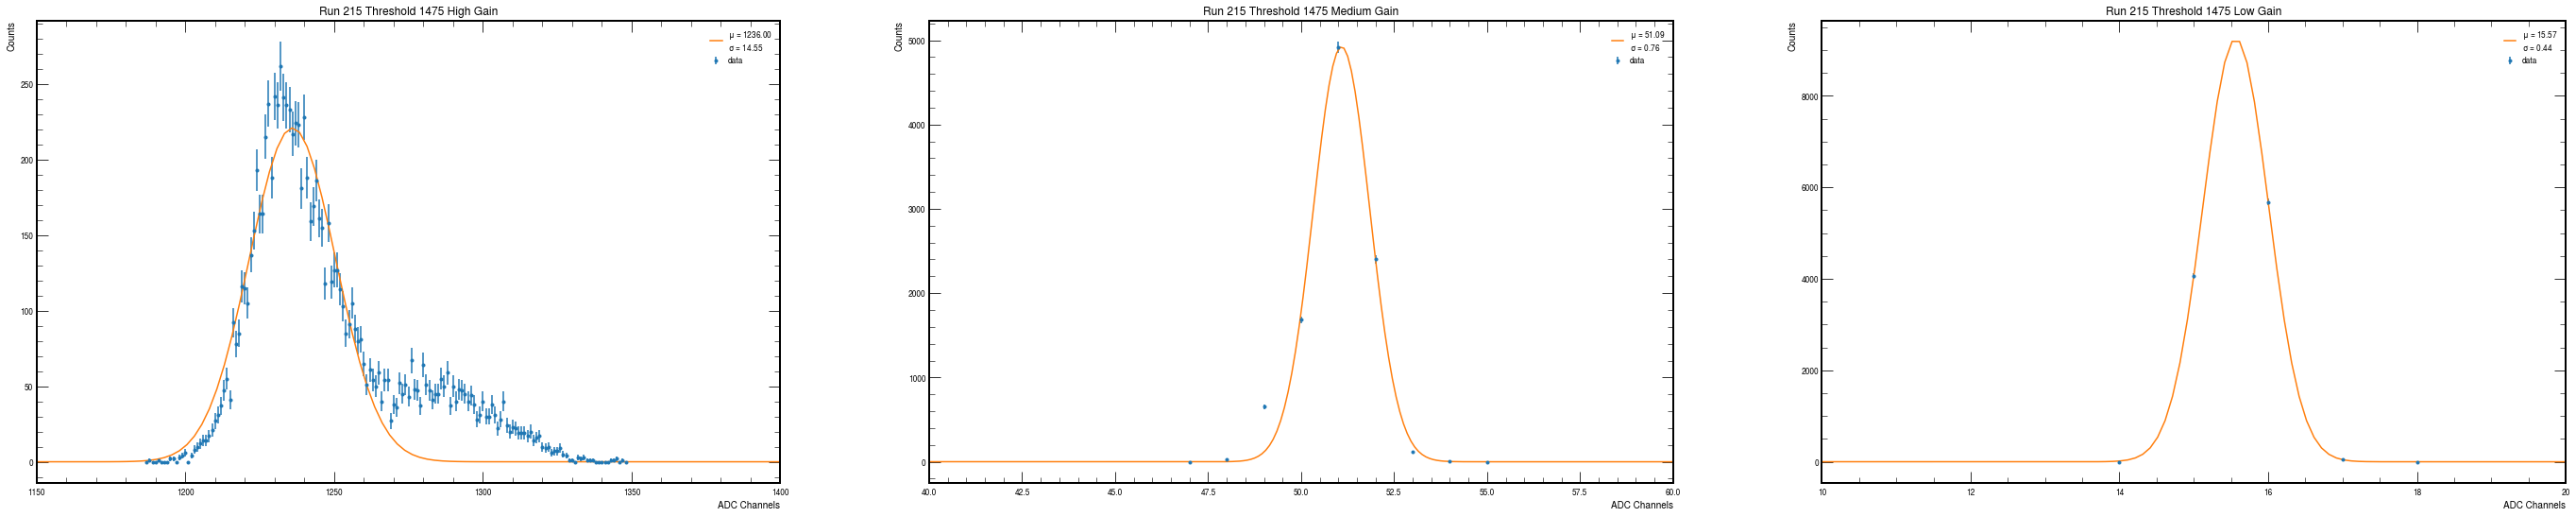

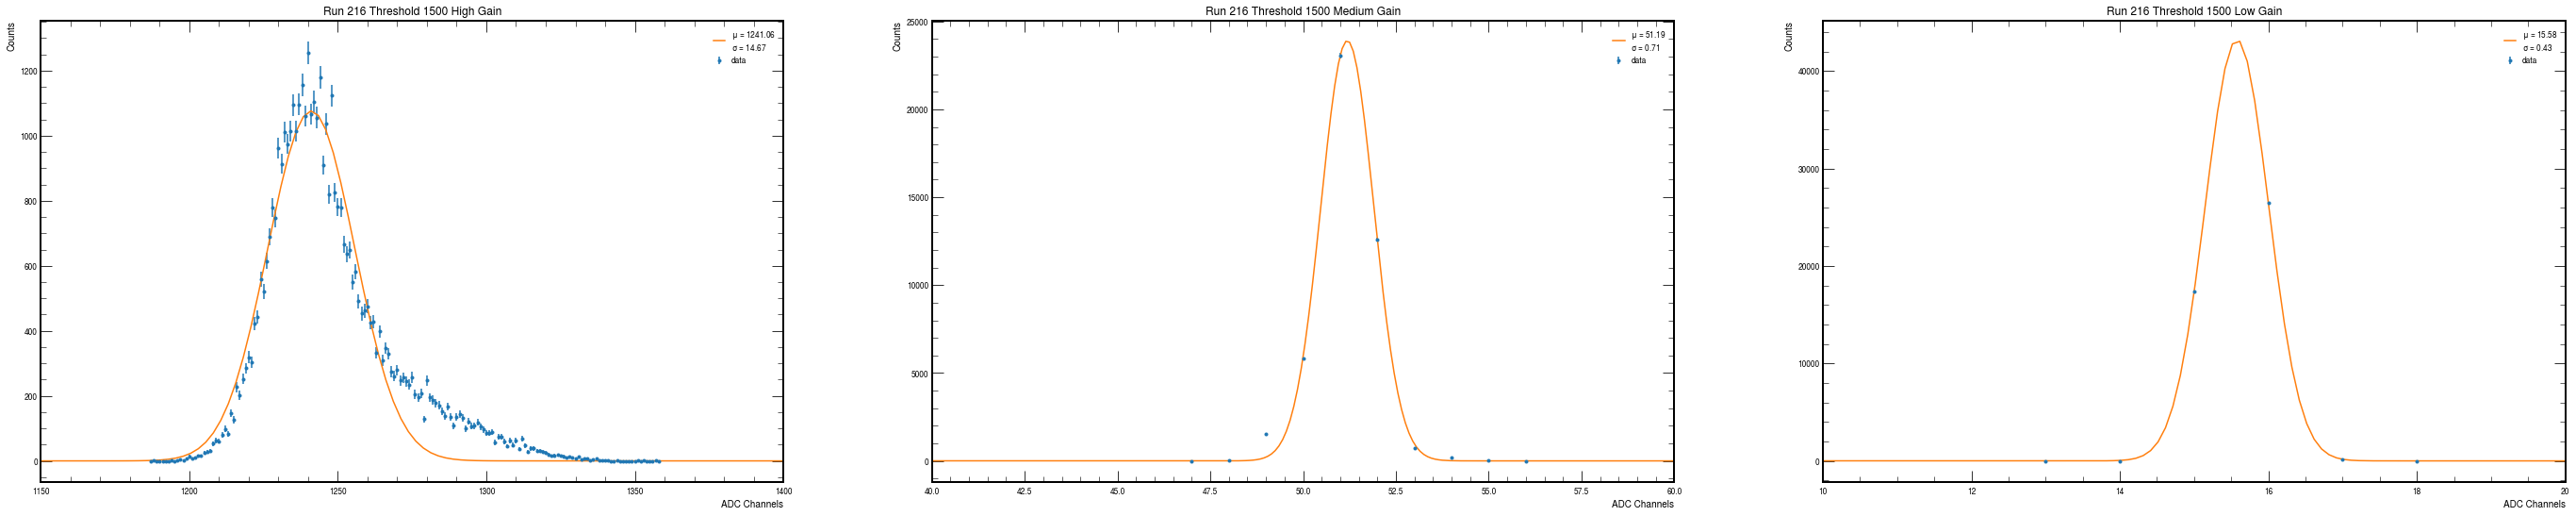

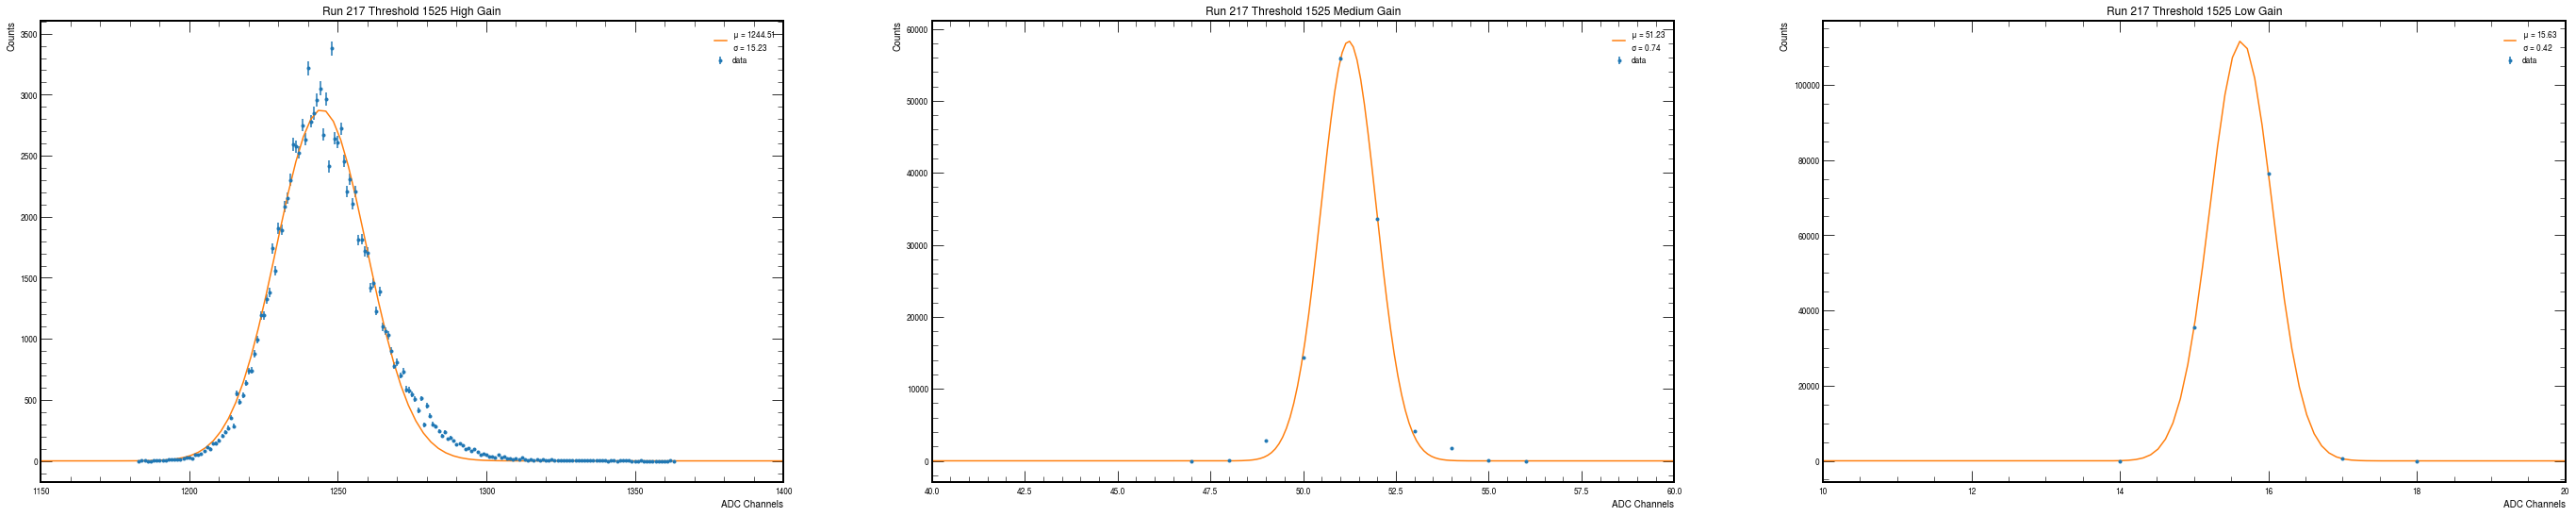

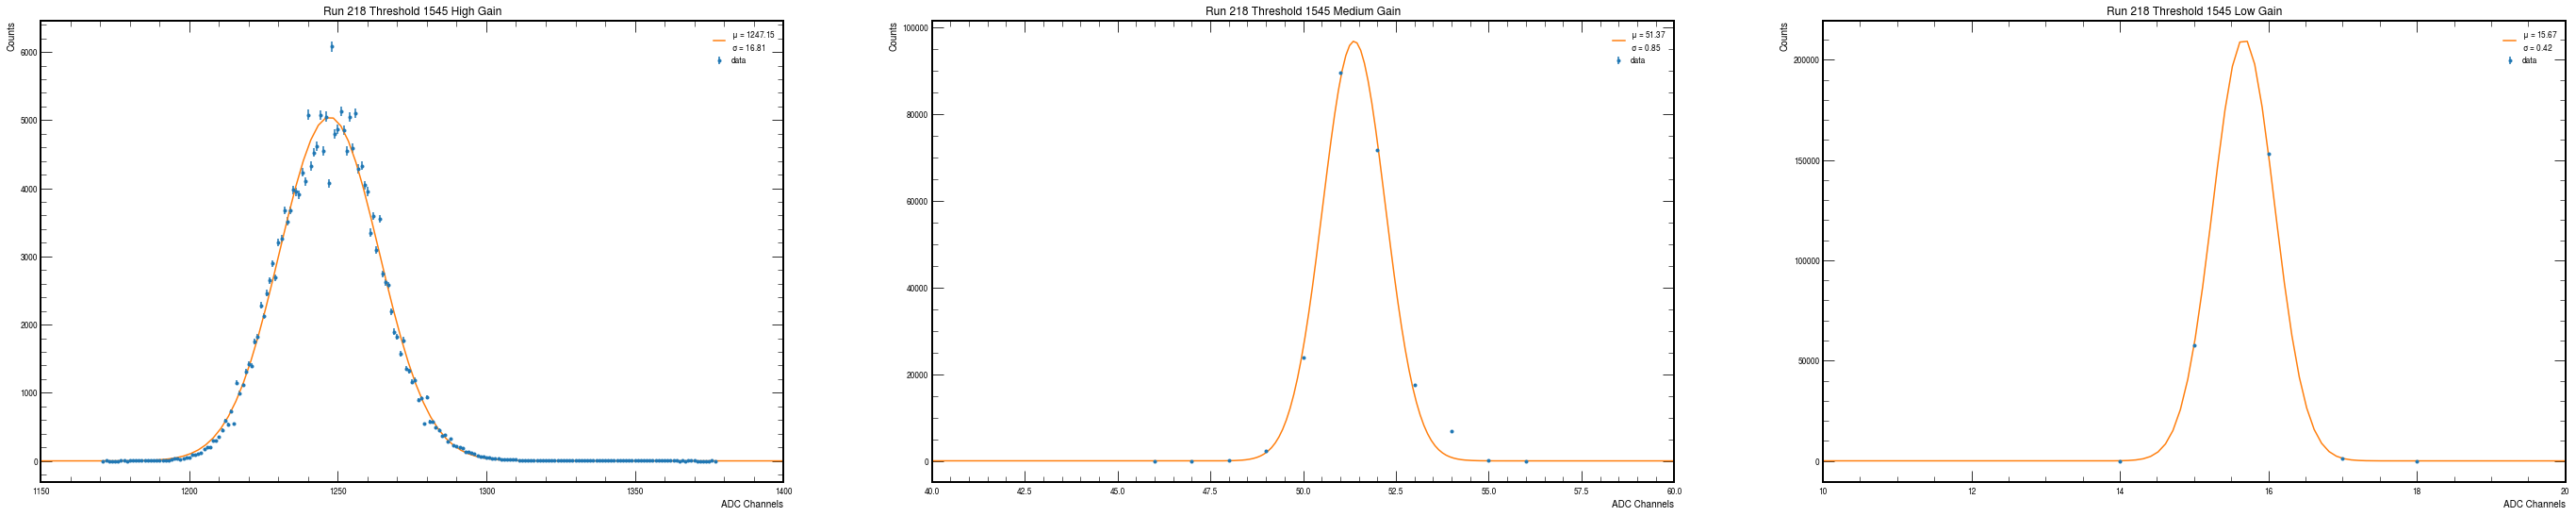

In [3]:
runnum = np.arange(213,218+1,1)
threshold = [1425, 1450, 1475, 1500, 1525, 1545]
voltage = [2400]
gain = ["High", "Medium", "Low"]

din = {}
din["Count"] = np.array([])
for i in range(3):
    din[gain[i]] = np.array([])
    din[gain[i]+" Sigma"] = np.array([])

for j in range(len(runnum)):
    hist_x = {}
    hist_y = {}
    for elem in gain:
        hist_x[f"{elem}"] = np.array([])
        hist_y[f"{elem}"] = np.array([])

    for i in range(3):
        with open(f"Condor Data/run_0000{runnum[j]}/run_0000{runnum[j]}_adc{i}_hist.dat") as f:
            for line in f:
                line = line.partition('#')[0].split(' ')
                if(len(line)>1):
                    hist_x[gain[i]] = np.append(hist_x[gain[i]],float(line[0]))
                    hist_y[gain[i]] = np.append(hist_y[gain[i]],float(line[1]))
    din["Count"] = np.append(din["Count"],float(np.sum(hist_y[gain[0]])))
    fig, axs = plt.subplots(1,3,figsize=(48,9))
    for i in range(3):
        plt.sca(axs[i])
        plt.title(f"Run {runnum[j]} Threshold {threshold[j]} {gain[i]} Gain")
        plt.errorbar(hist_x[gain[i]],hist_y[gain[i]],yerr=np.sqrt(hist_y[gain[i]]), linestyle='', marker='o', label='data', markersize=3)
        coeff, covar = curve_fit(Gauss,hist_x[gain[i]],hist_y[gain[i]], p0 = (250,1225,25) if i ==0 else ((5000,51.5,0.3) if i ==1 else (5000,16,0.5)))
        x=np.linspace(1150, 1400, 100) if i == 0 else np.linspace(0, 100, 1000)
        plt.plot(x, Gauss(x,*coeff), label=f"$\mu$ = {coeff[1]:.2f}\n$\sigma$ = {abs(coeff[2]):.2f}")
        plt.xlim((1150,1400) if i==0 else ((40,60) if i==1 else (10,20)))
        plt.xlabel("ADC Channels")
        plt.ylabel("Counts")
        plt.legend()
        din[gain[i]] = np.append(din[gain[i]],float(coeff[1]))
        din[gain[i]+" Sigma"] = np.append(din[gain[i]+" Sigma"],float(np.sqrt(covar[1][1])))
    plt.show()
    
df = pd.DataFrame(din)

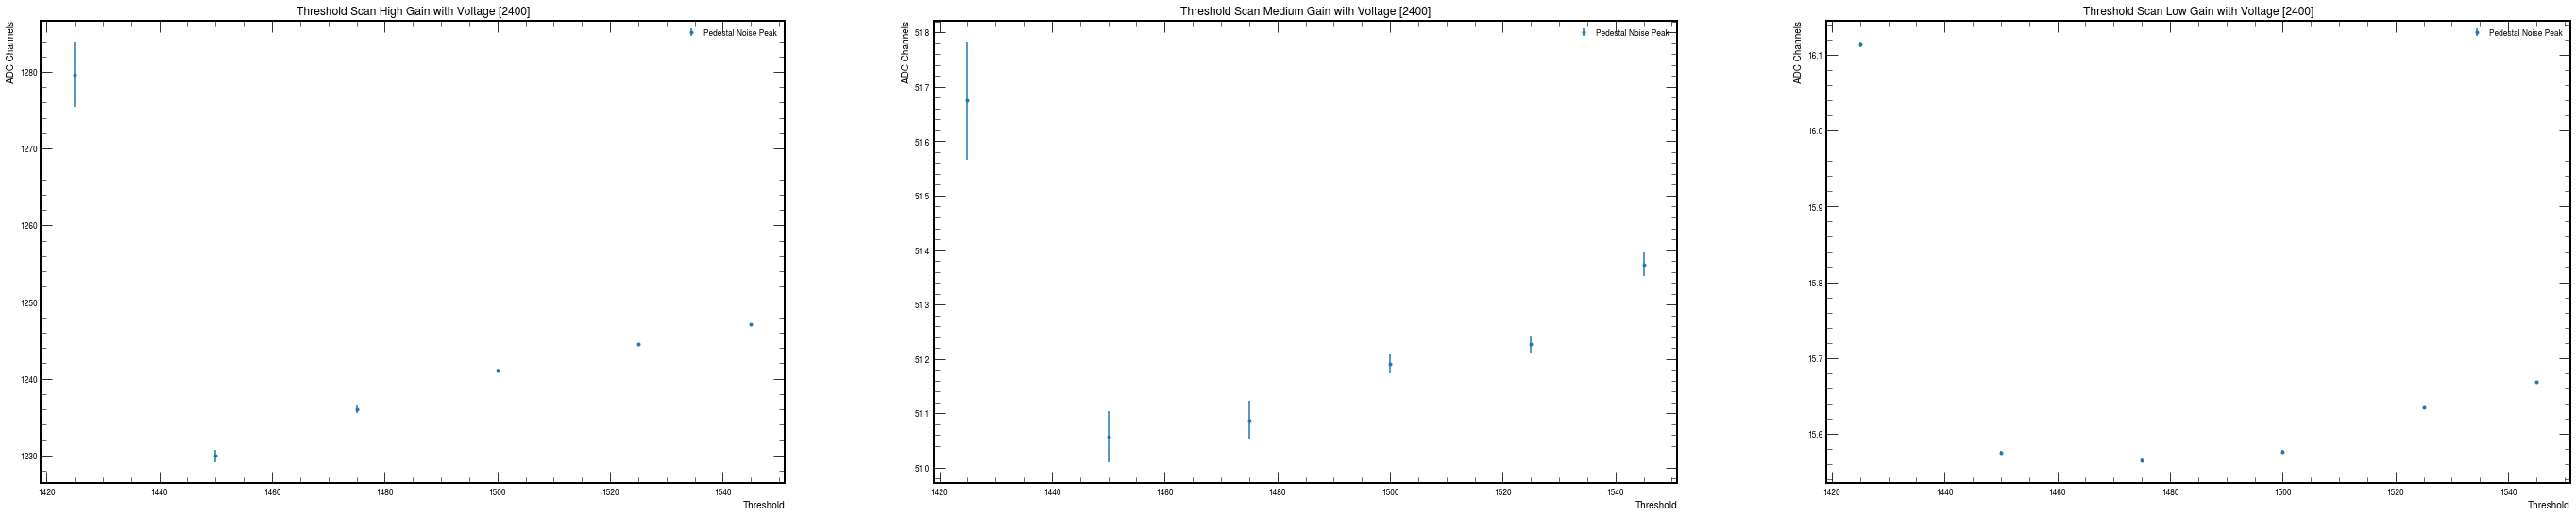

In [4]:
fig, axs = plt.subplots(1,3,figsize=(48,9))
for i in range(3):
    plt.sca(axs[i])
    plt.title(f"Threshold Scan {gain[i]} Gain with Voltage {voltage}")
    plt.errorbar(threshold,df[gain[i]],yerr=din[gain[i]+" Sigma"], linestyle='', marker='o', label='Pedestal Noise Peak', markersize=3)
    plt.ylabel("ADC Channels")
    plt.xlabel("Threshold")
    plt.legend()
plt.show()

Text(0.5, 1.0, 'Rate with Voltage [2400]')

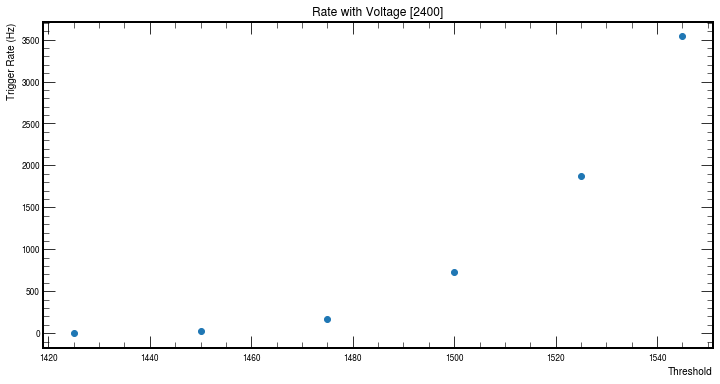

In [5]:
plt.figure(figsize=(12,6))
plt.scatter(threshold,df["Count"]/60)
plt.xlabel("Threshold")
plt.ylabel("Trigger Rate (Hz)")
plt.title(f"Rate with Voltage {voltage}")

### Voltage Variation

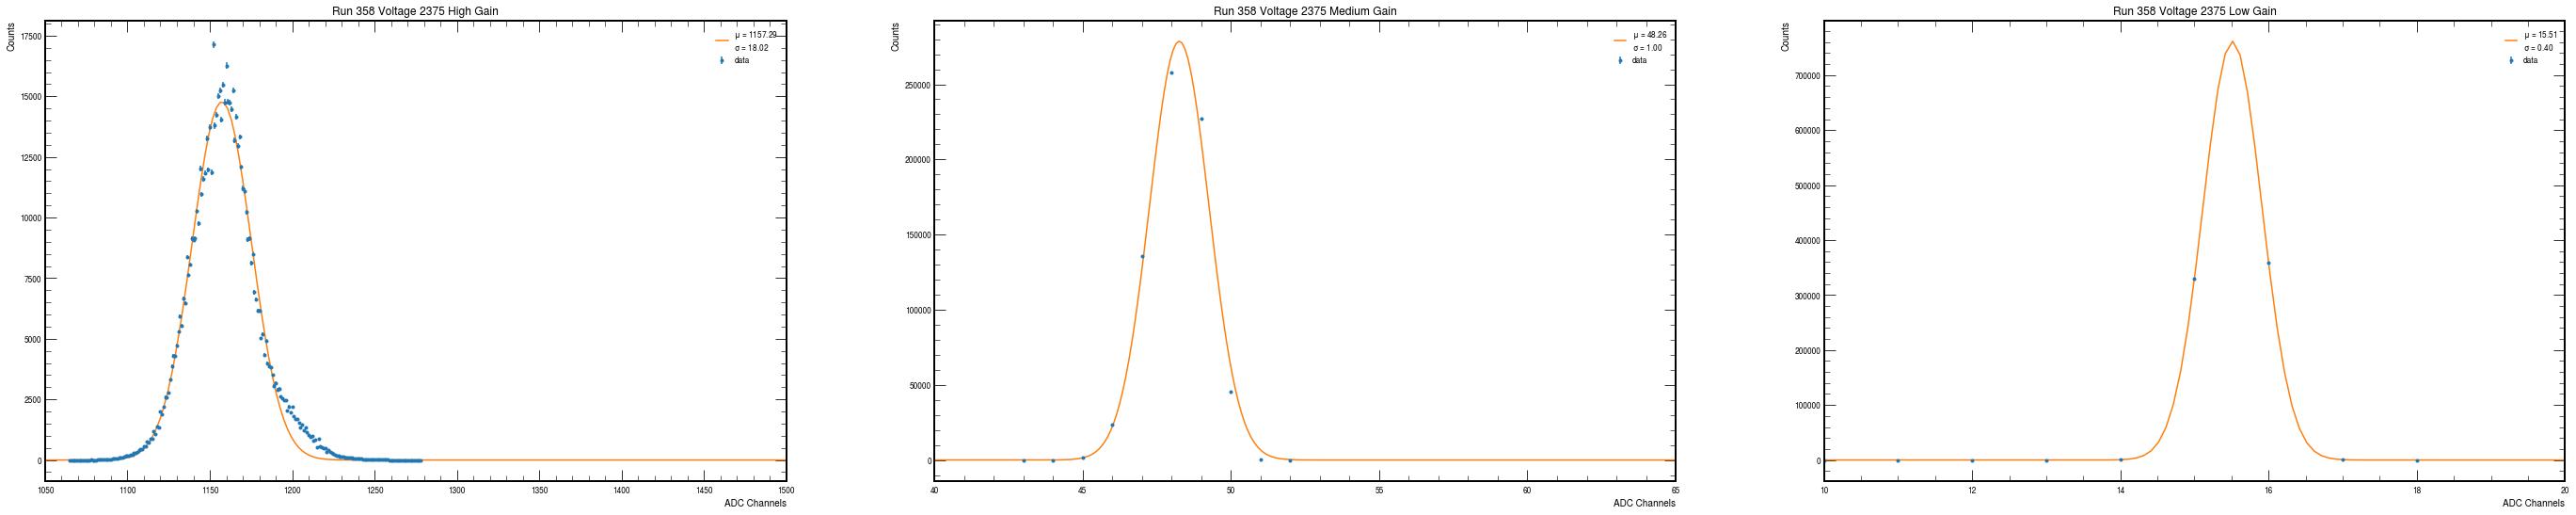

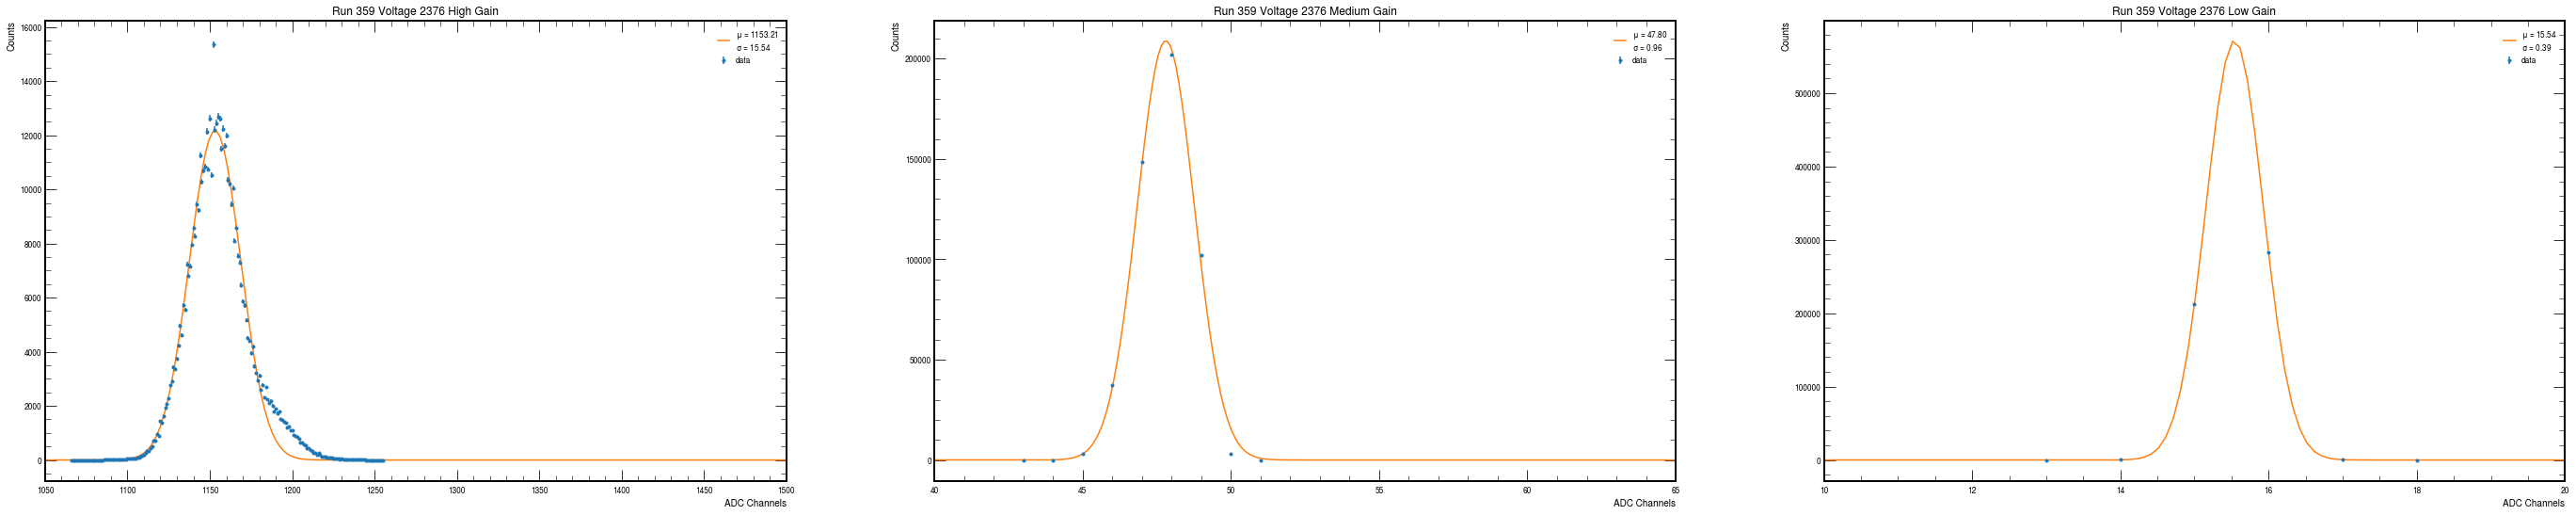

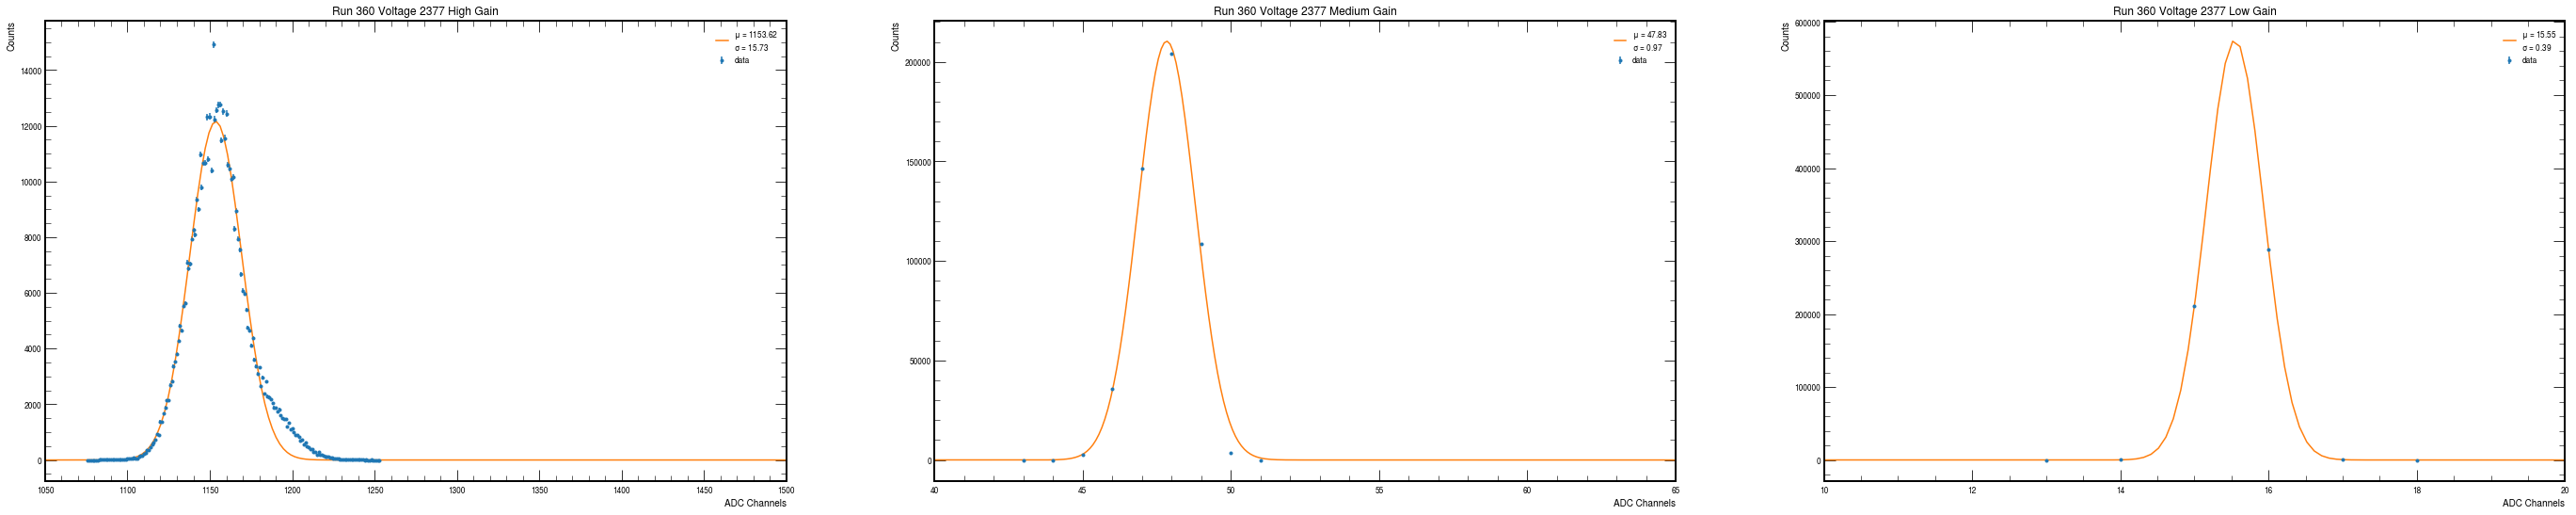

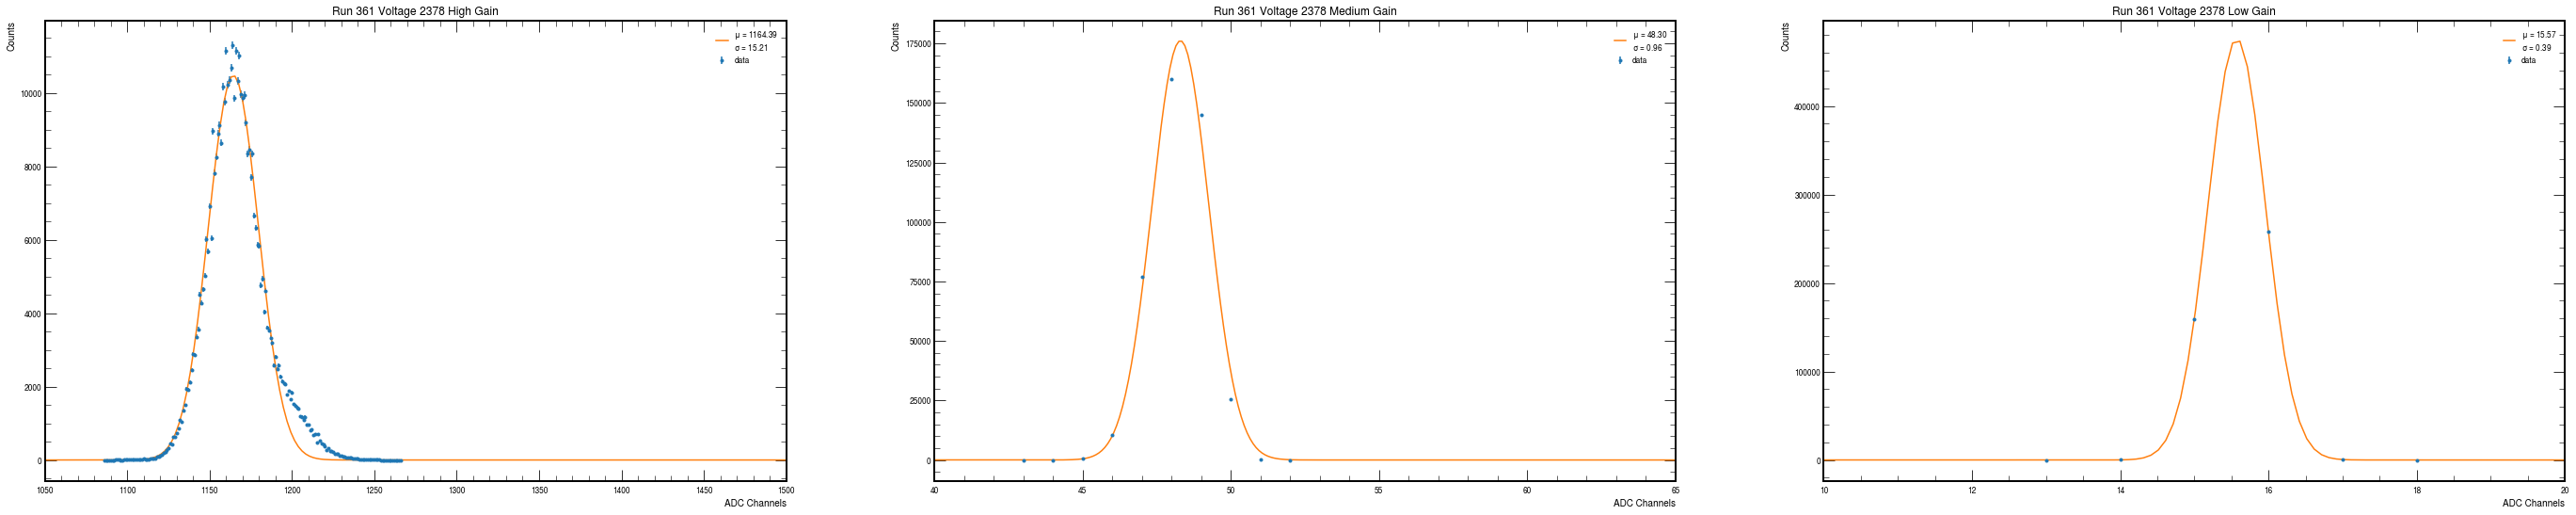

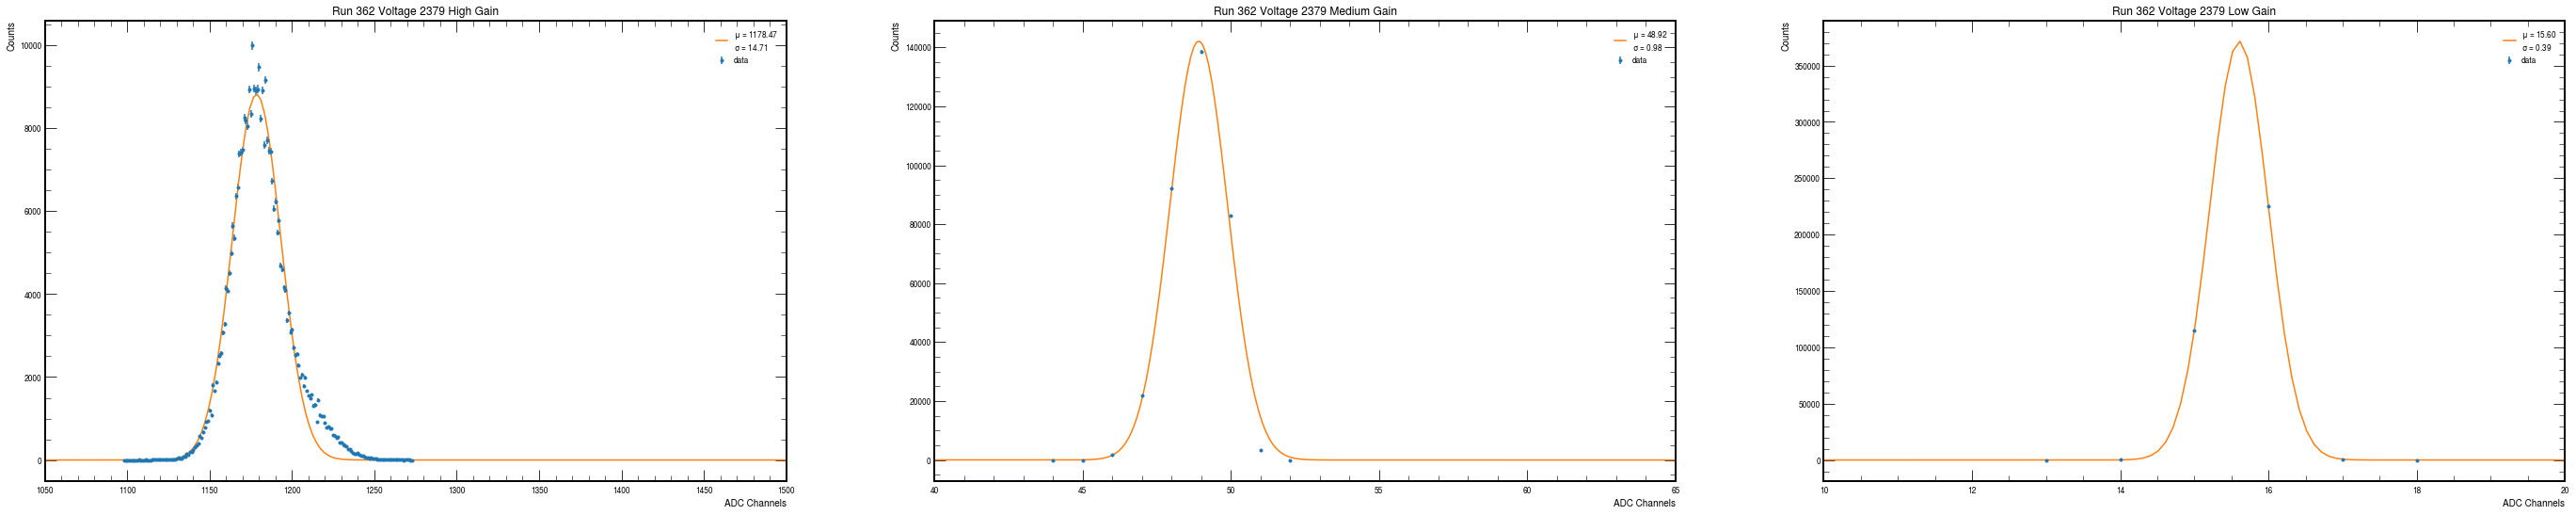

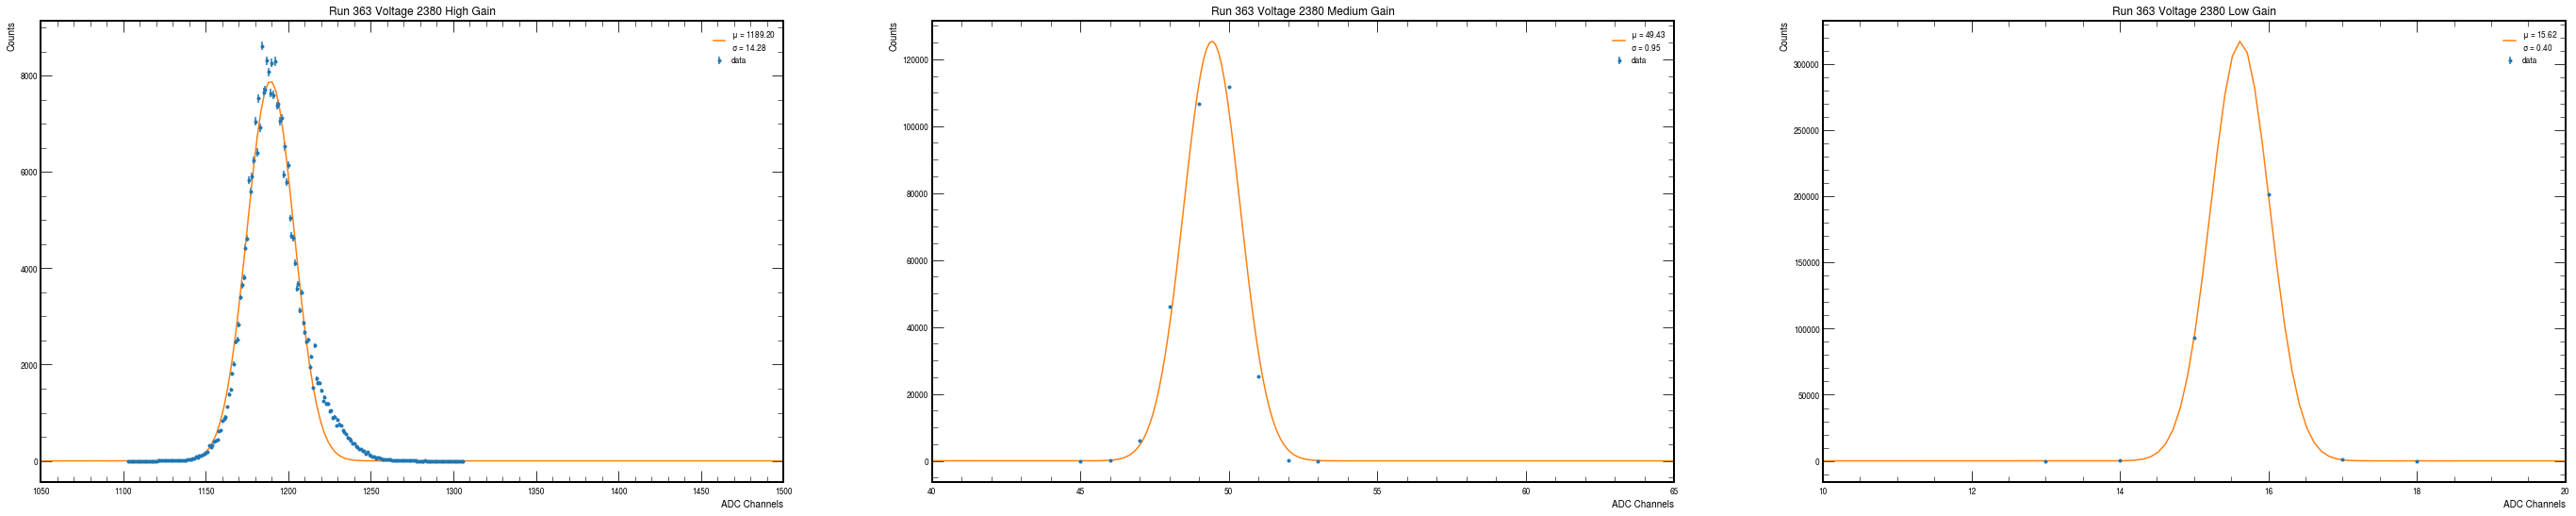

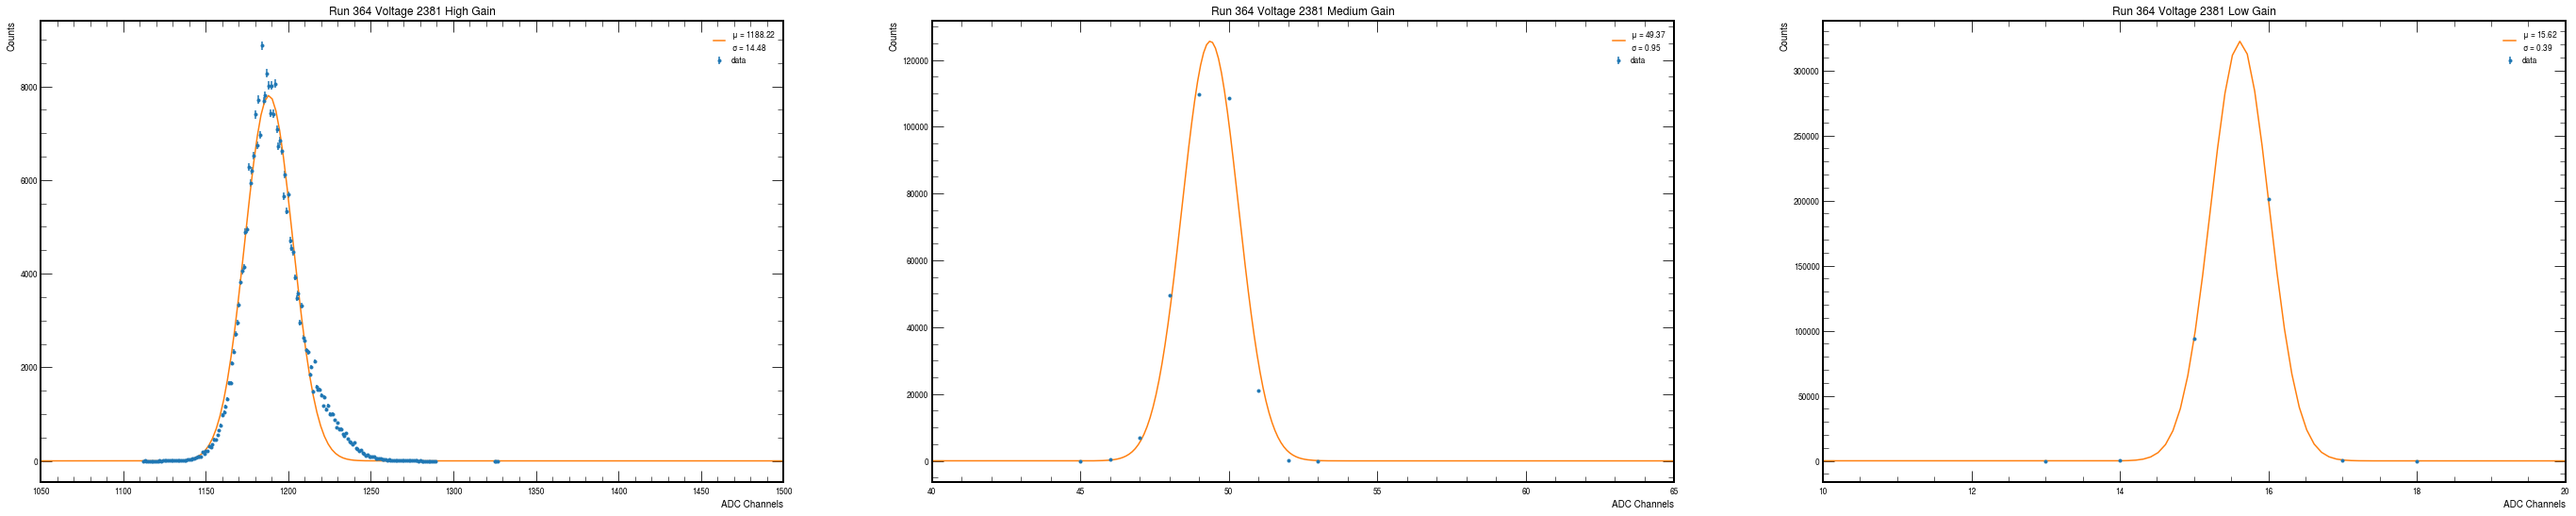

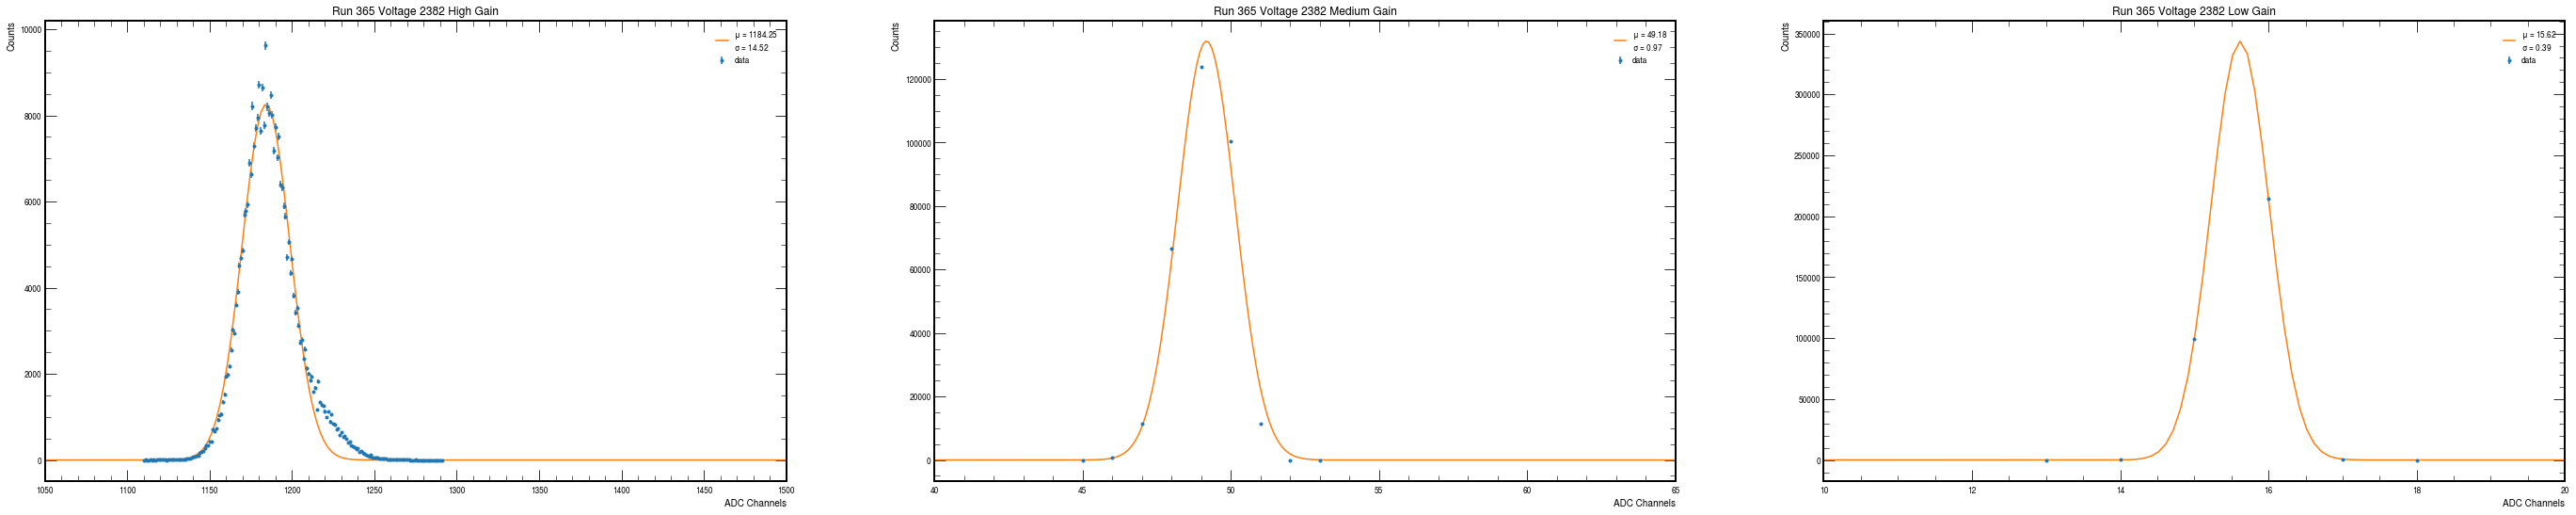

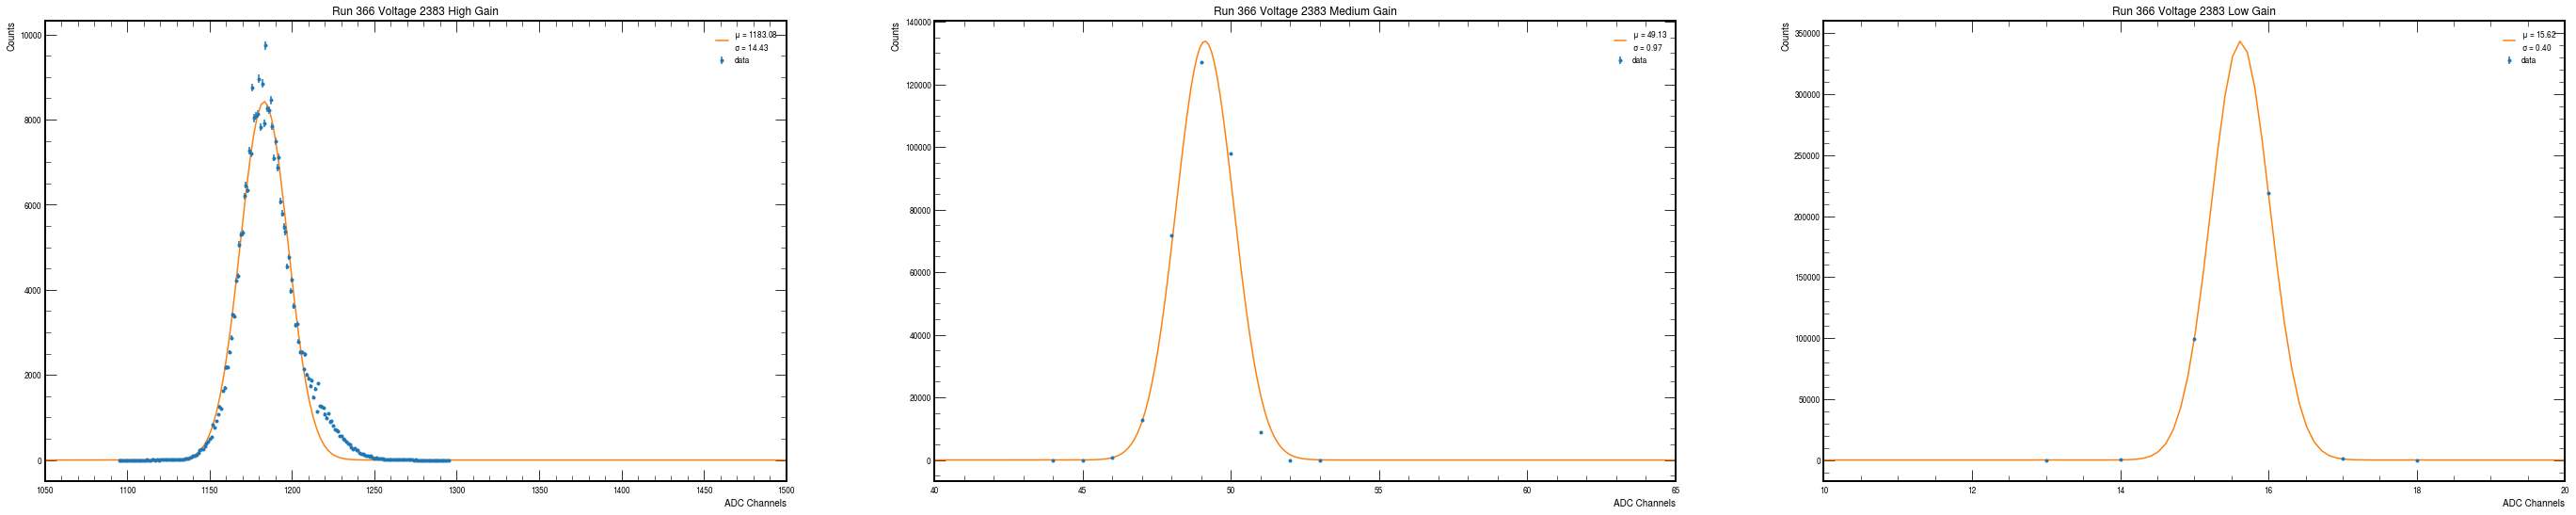

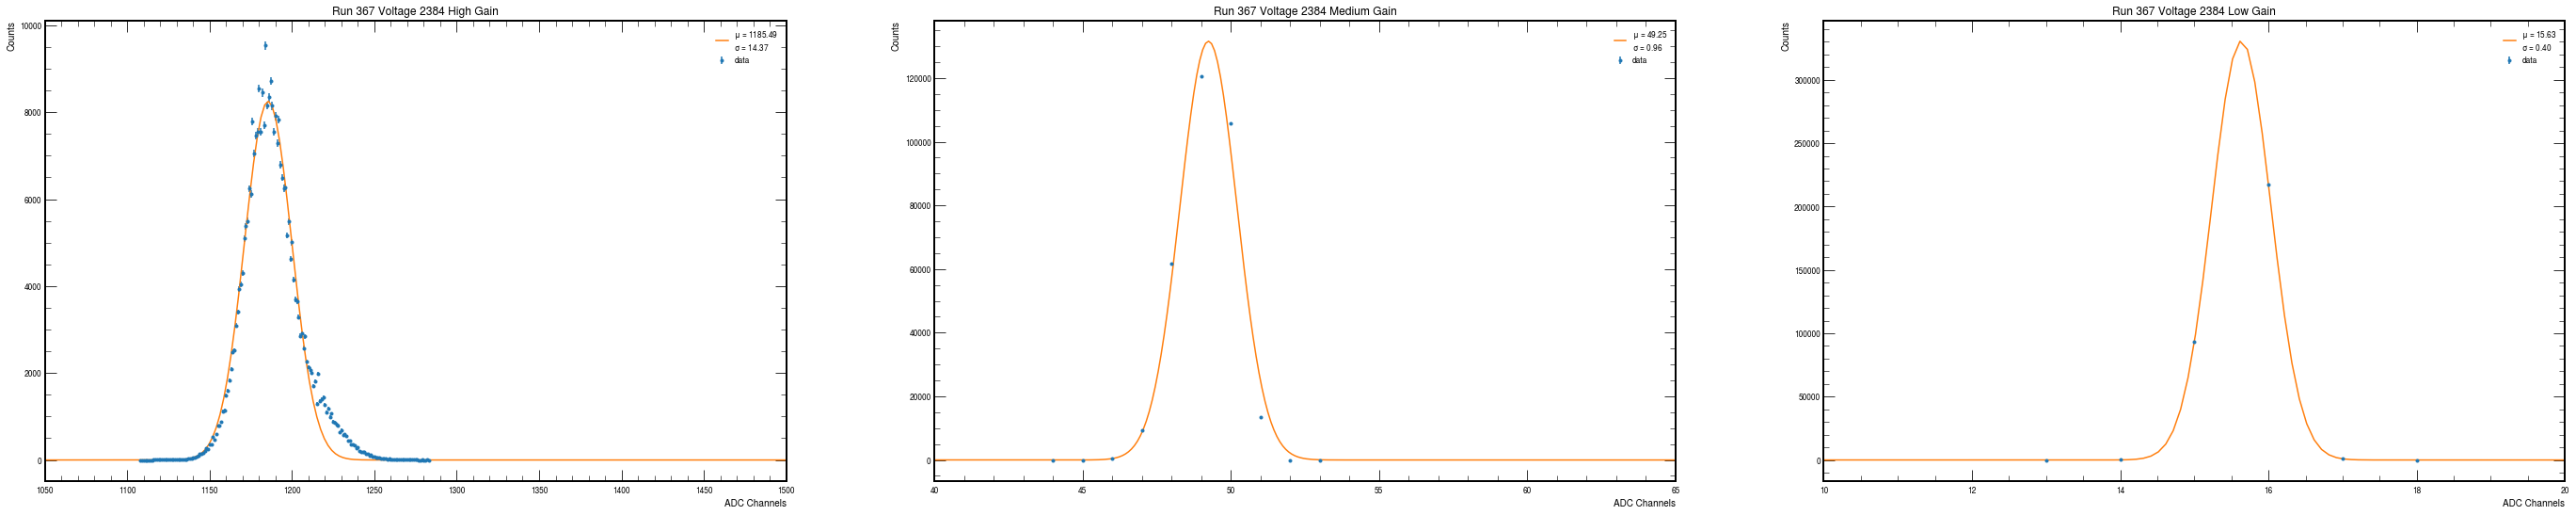

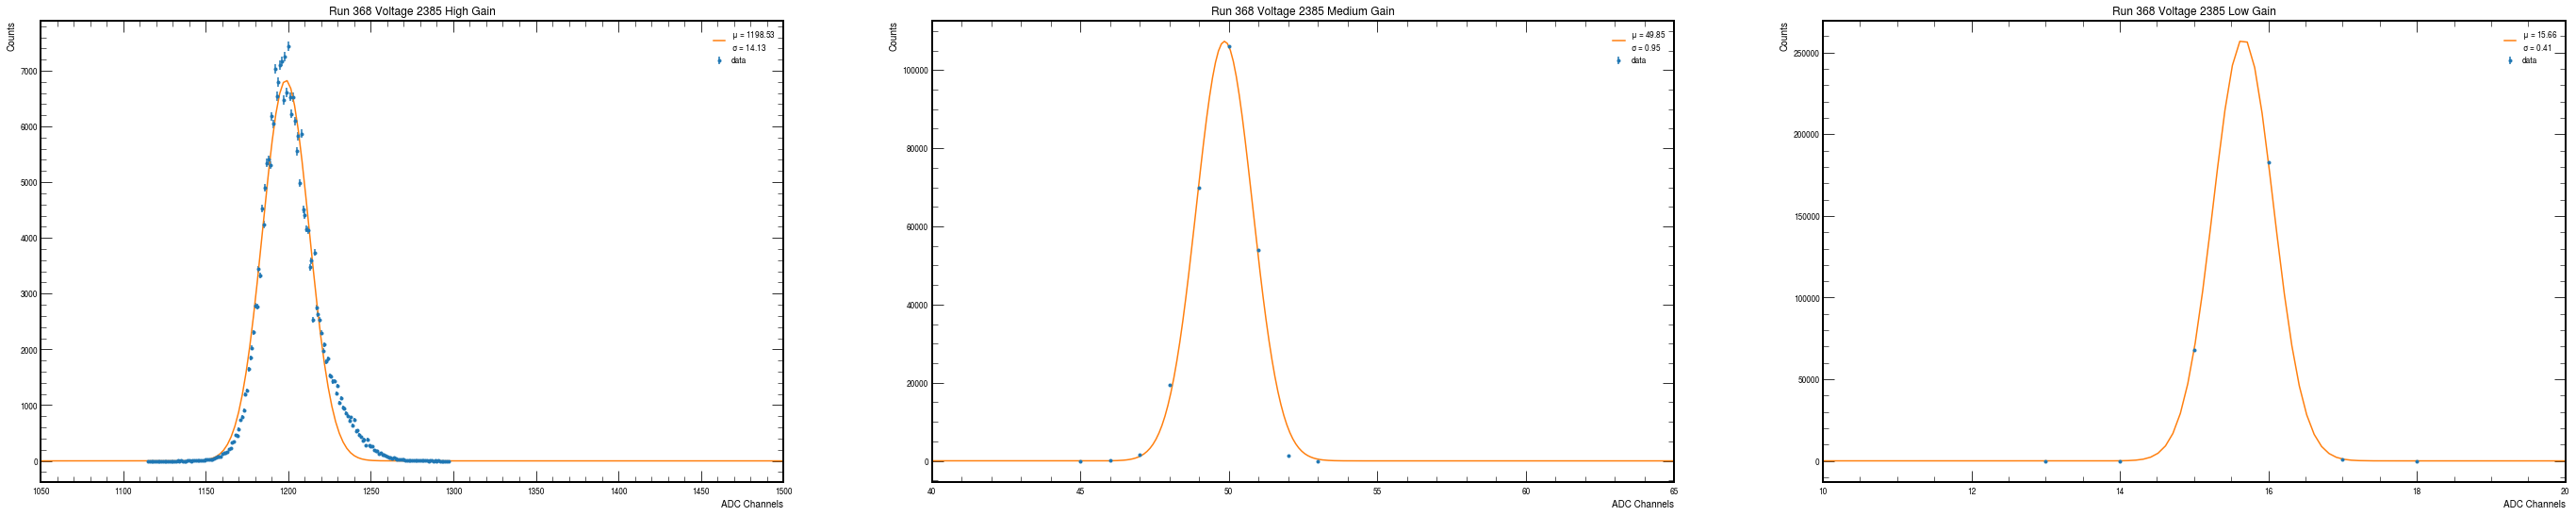

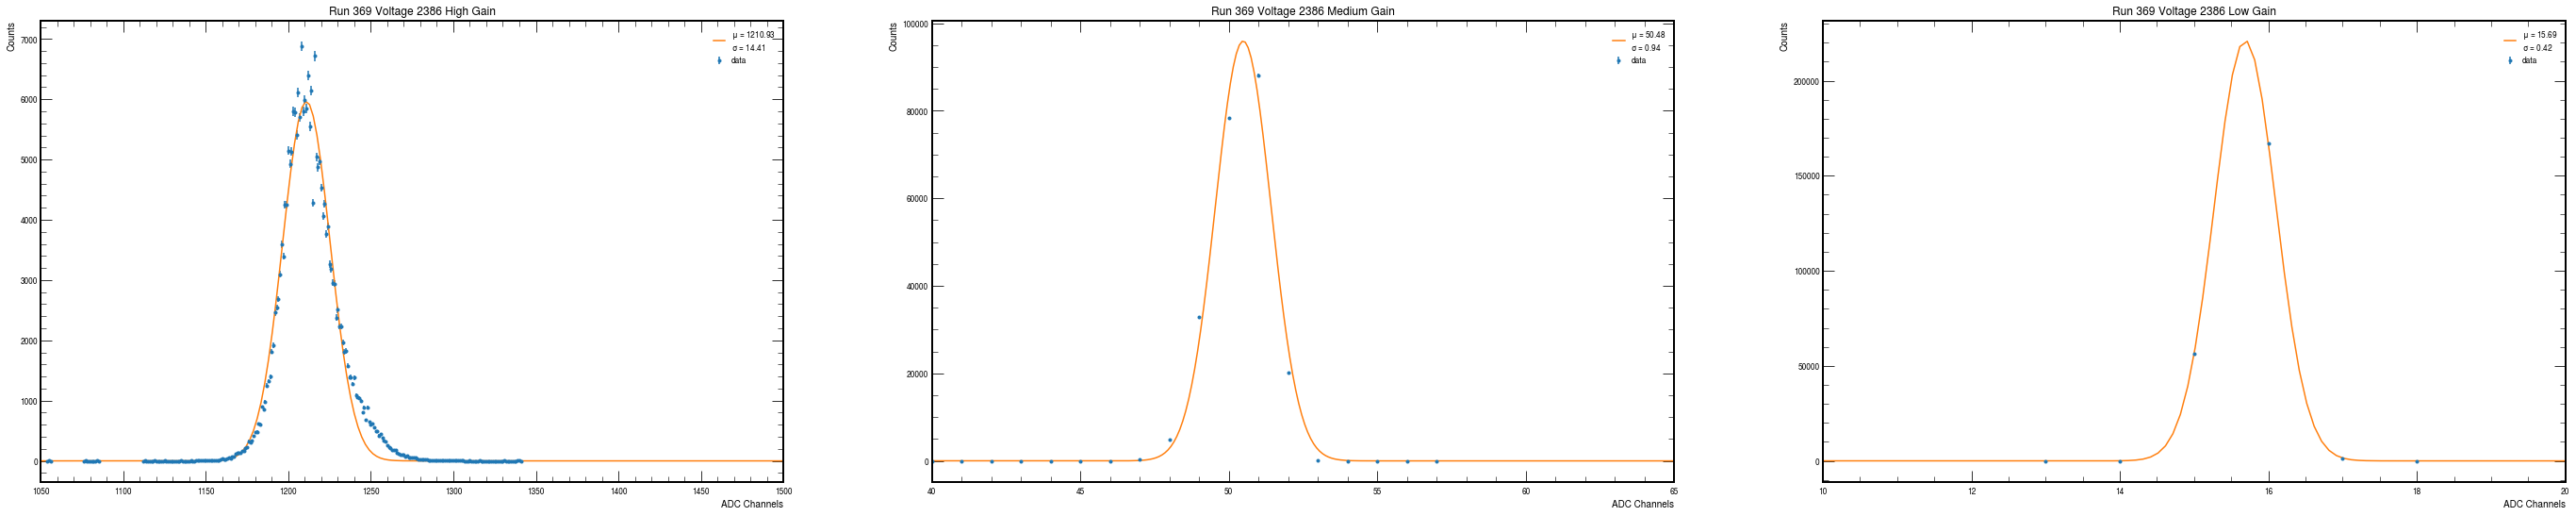

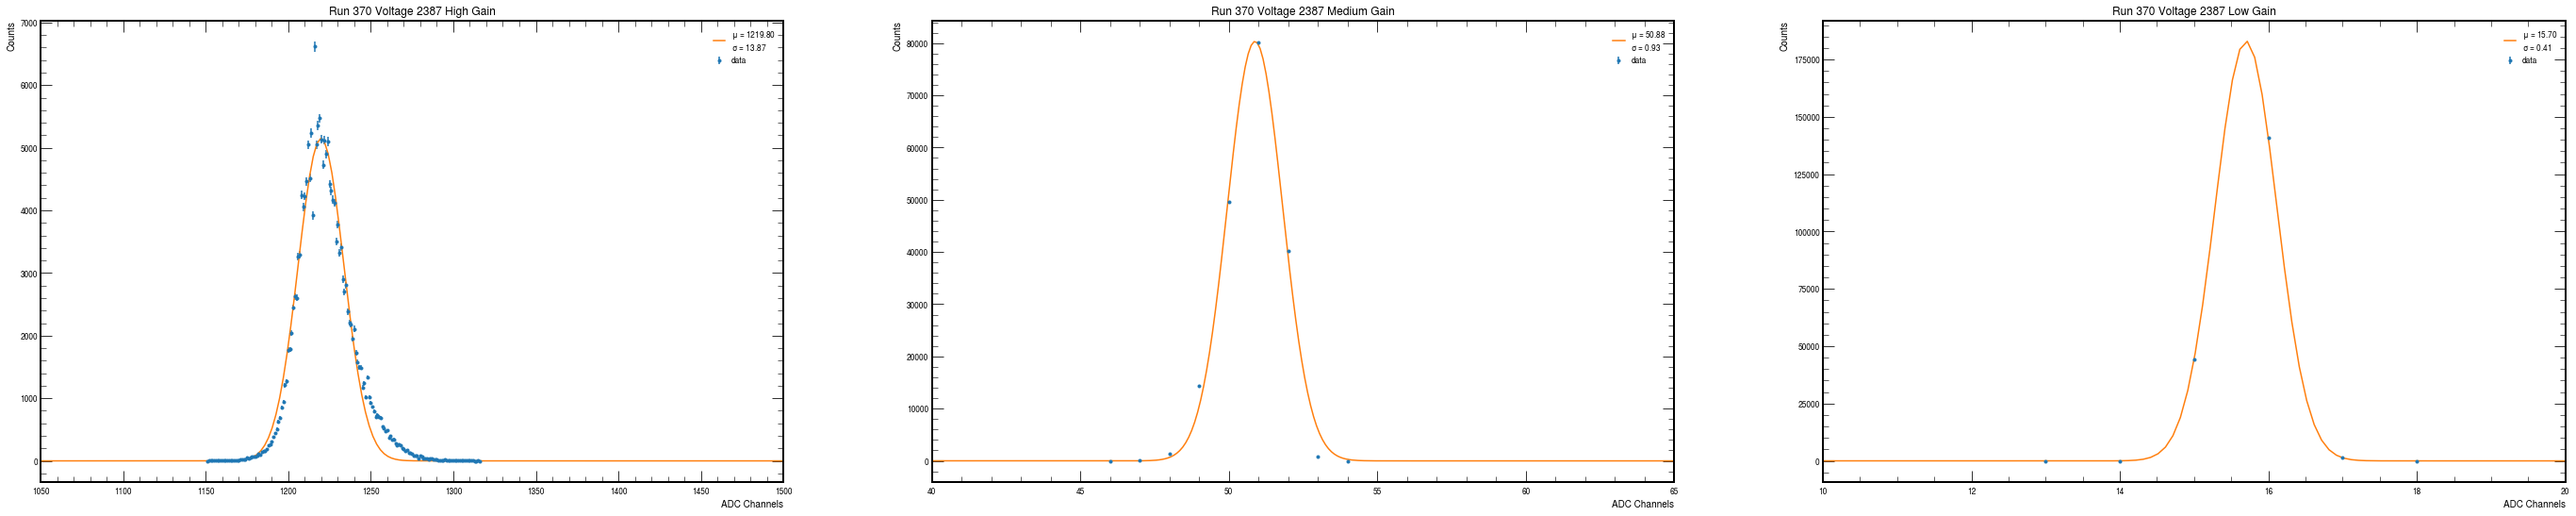

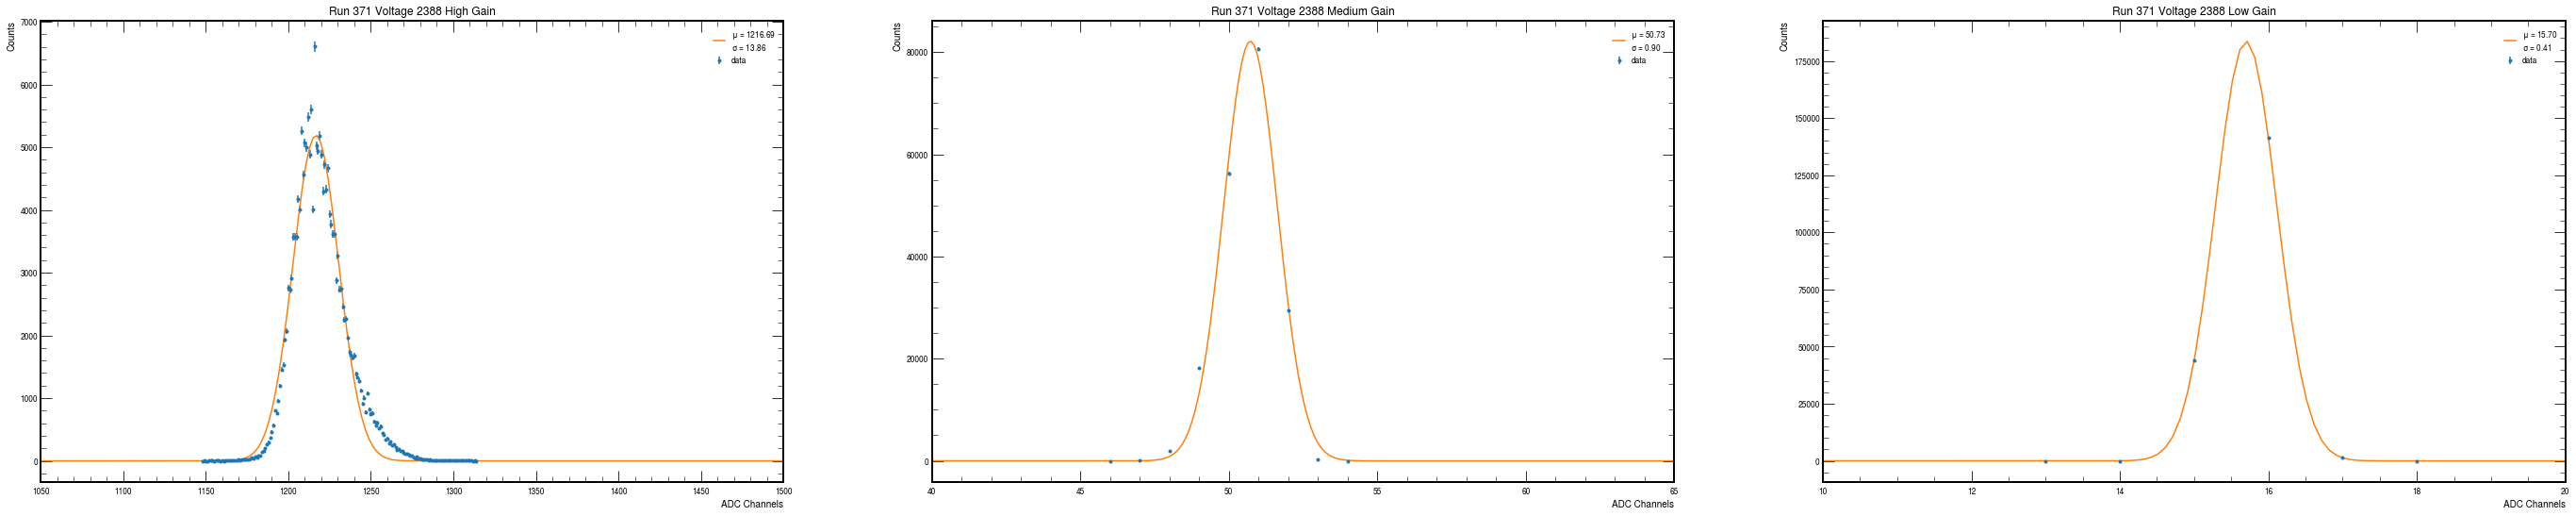

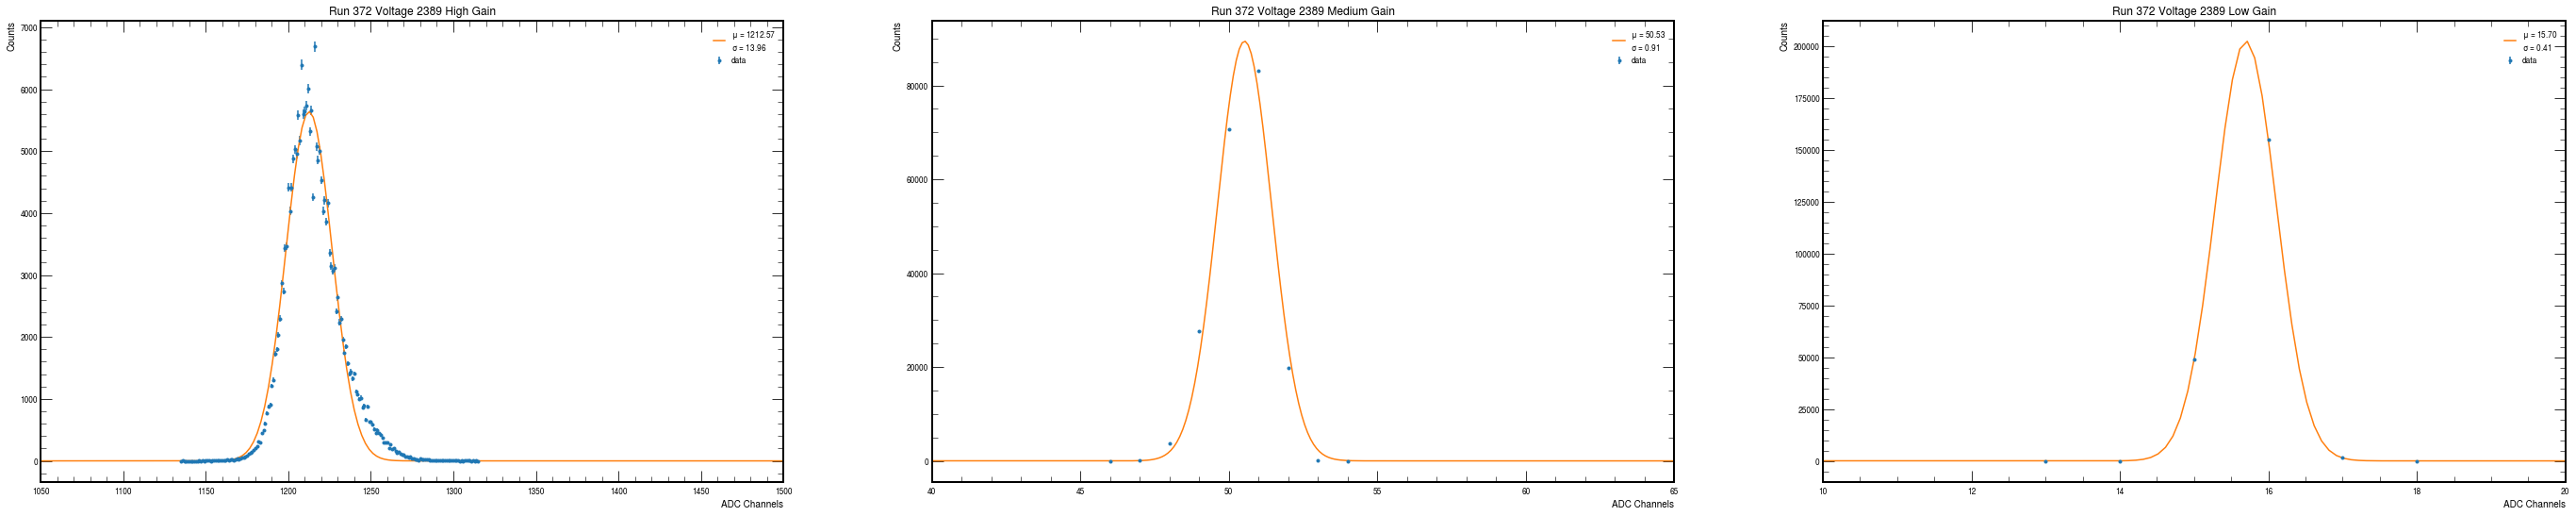

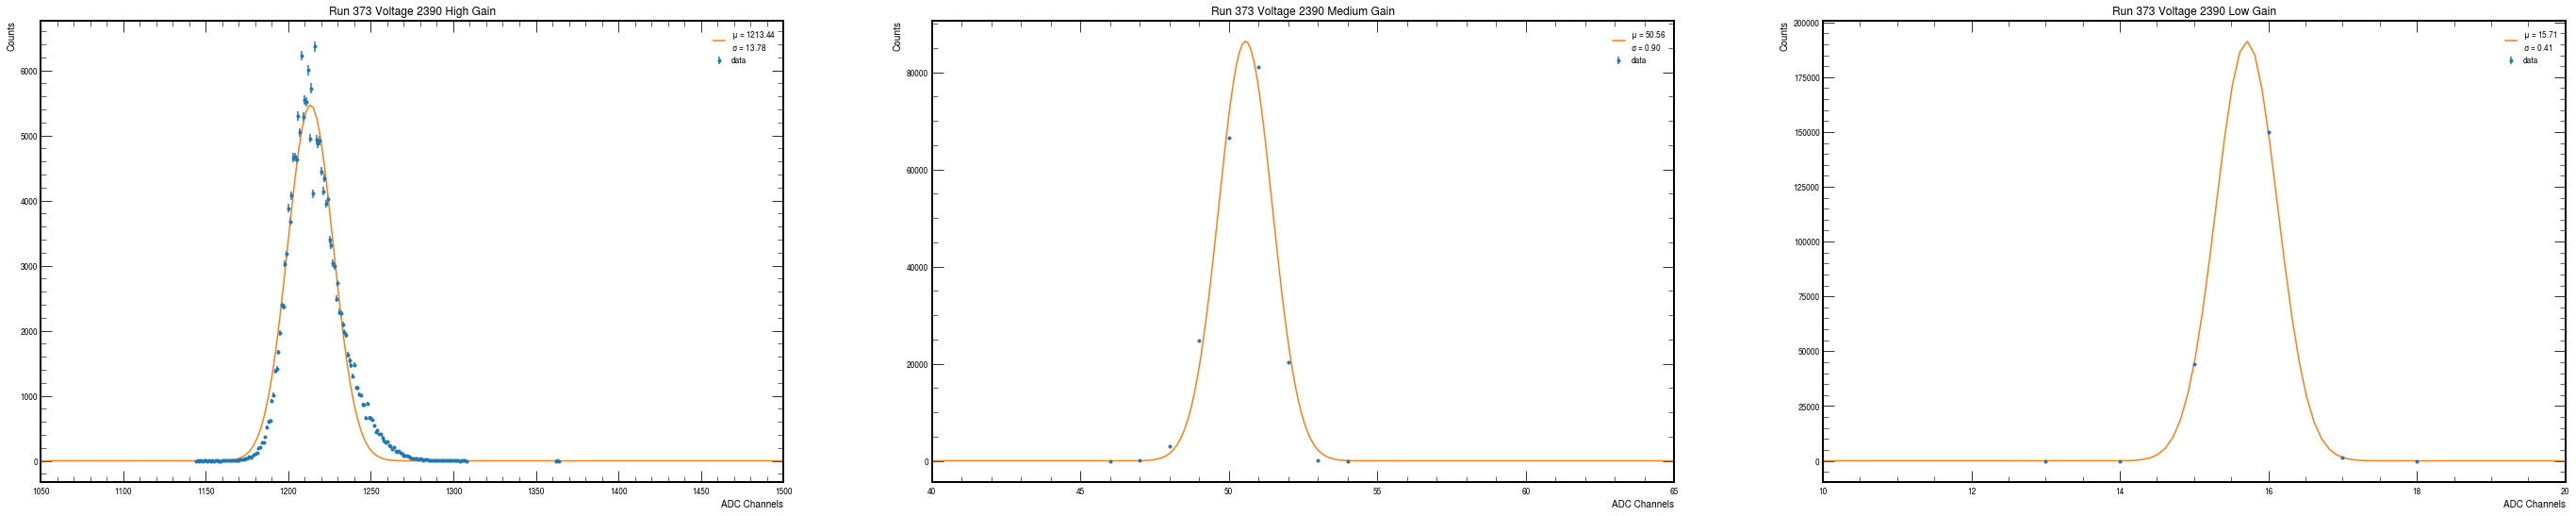

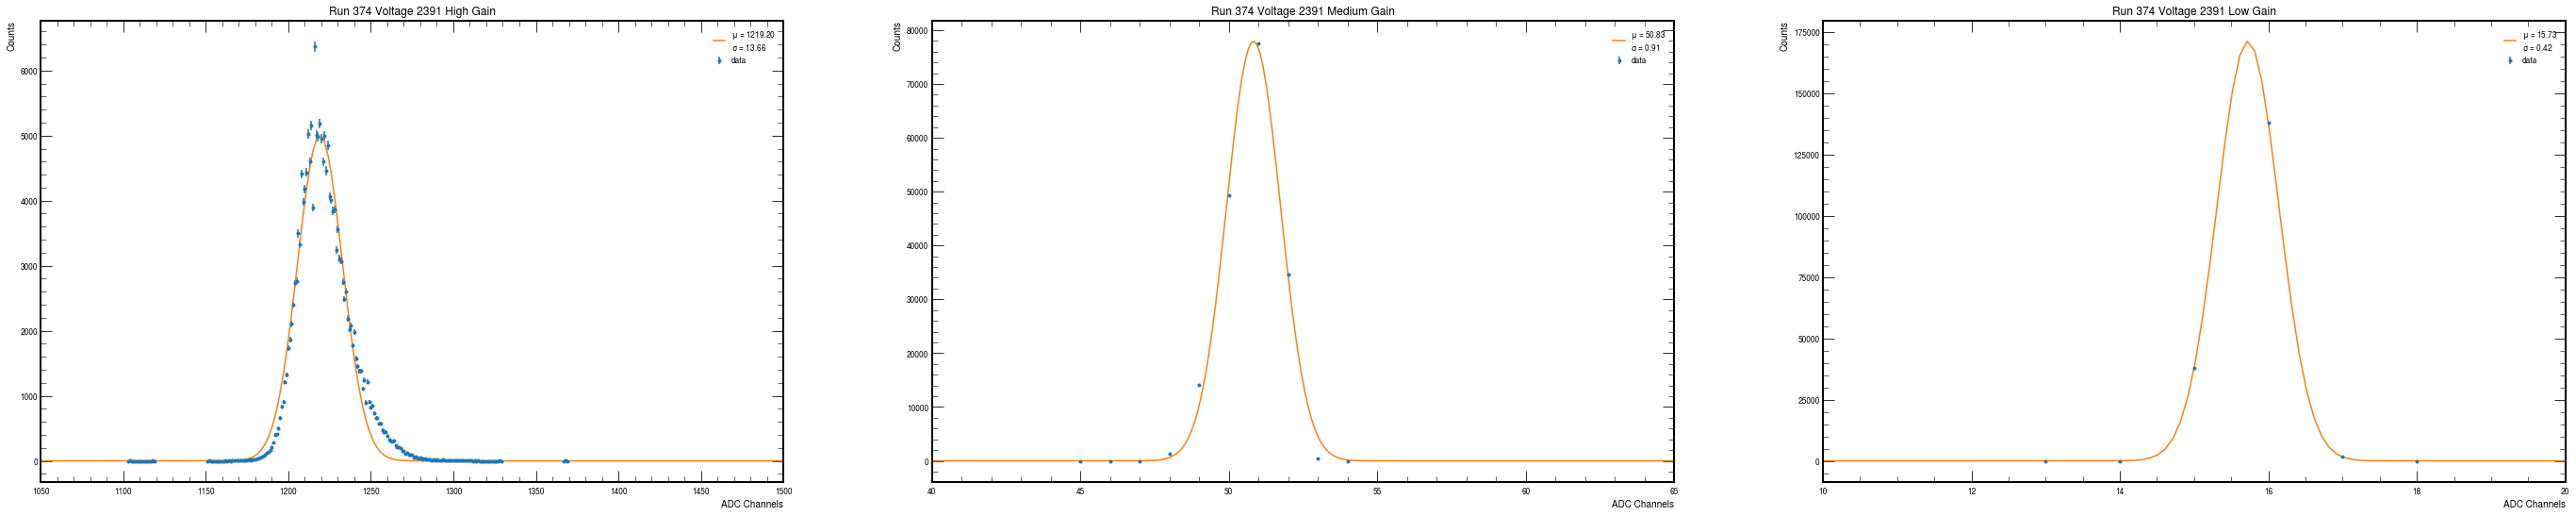

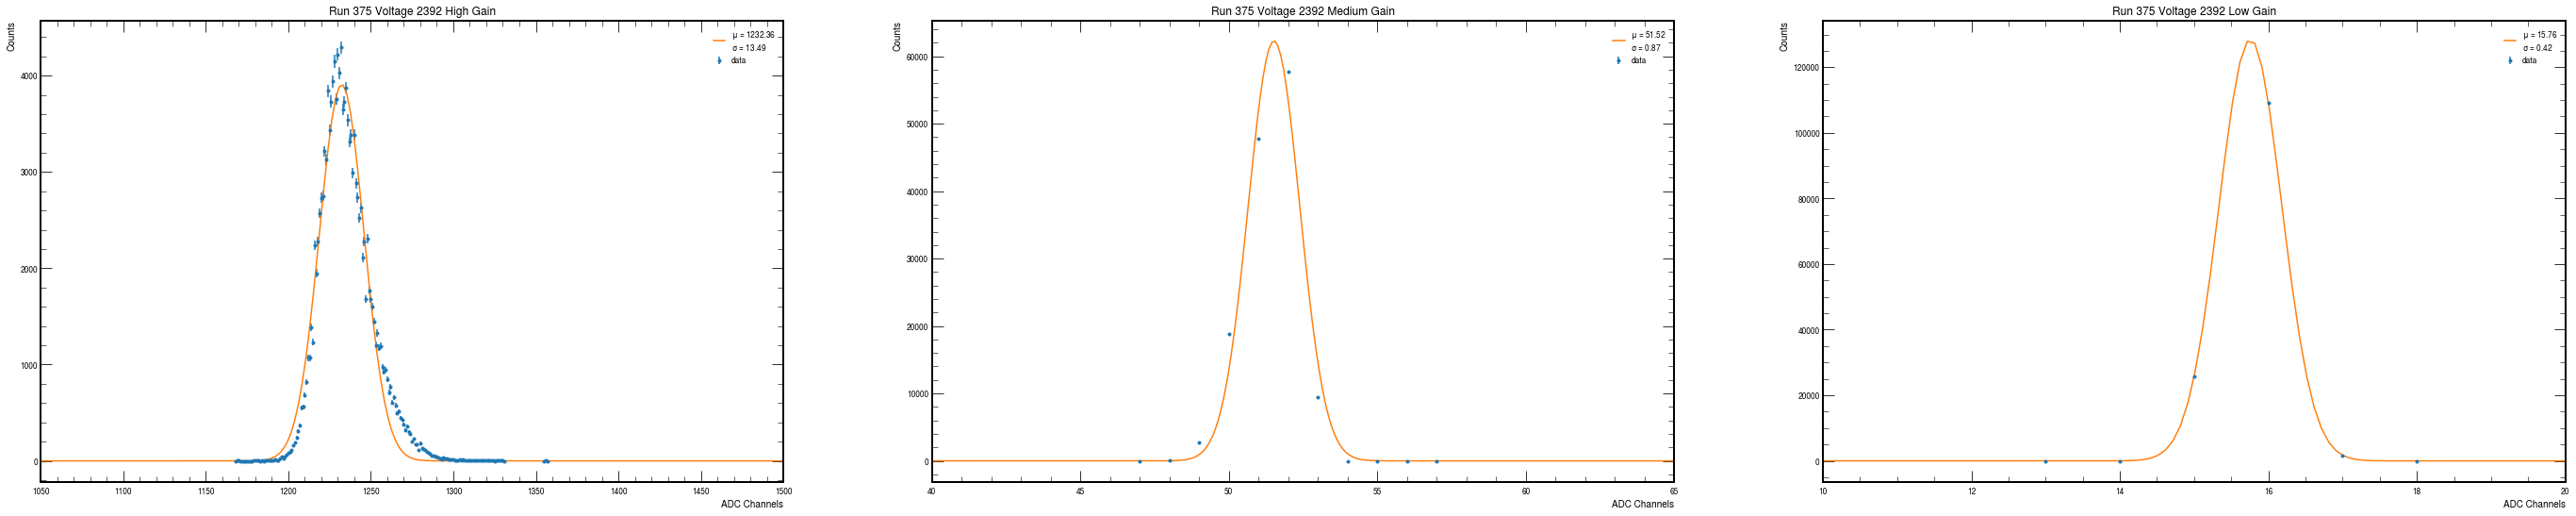

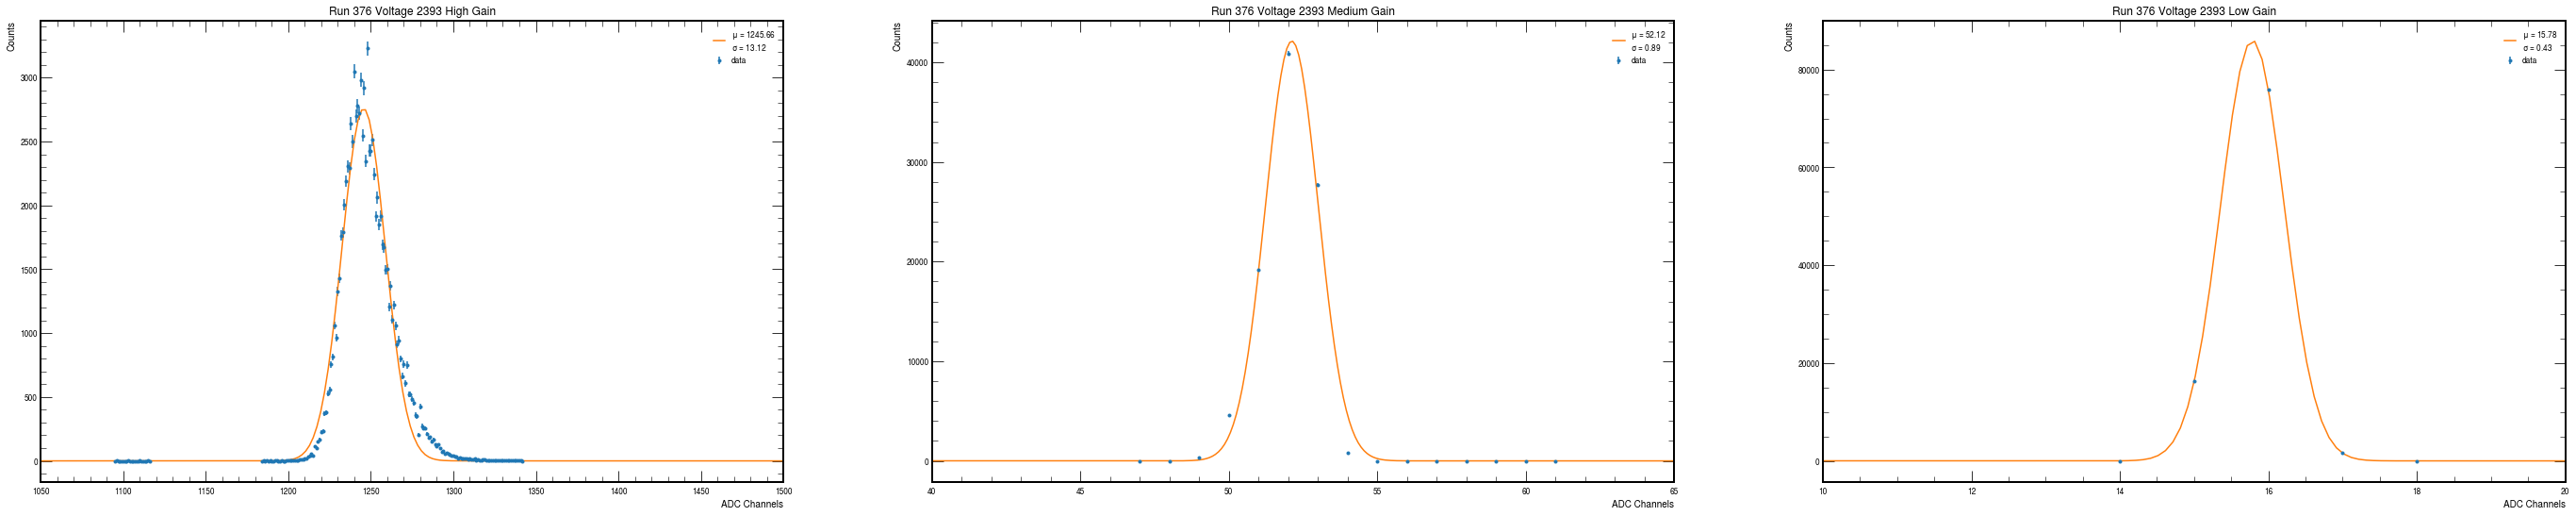

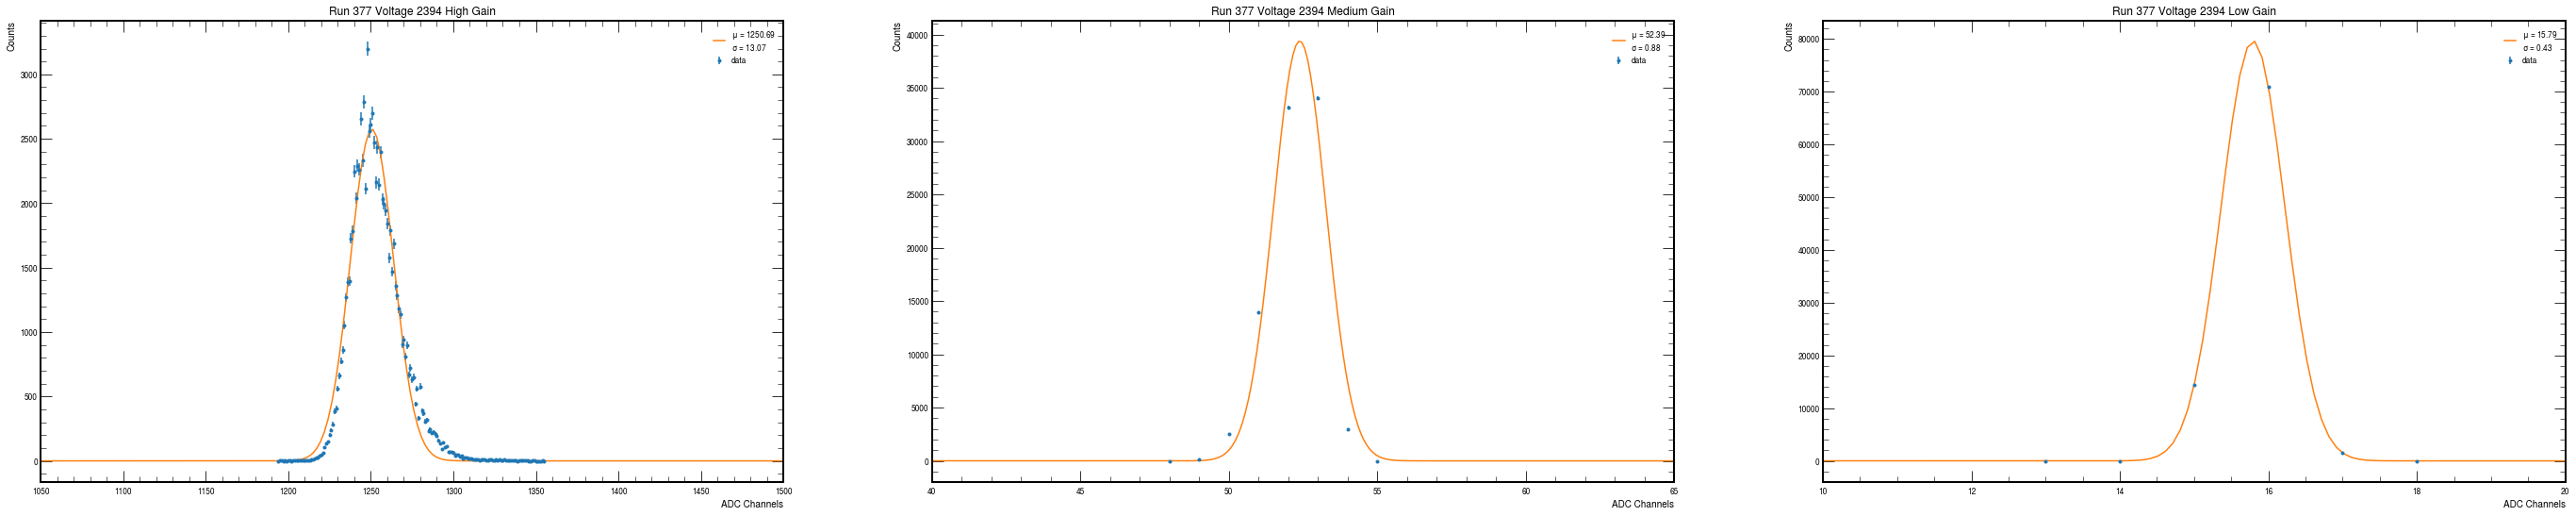

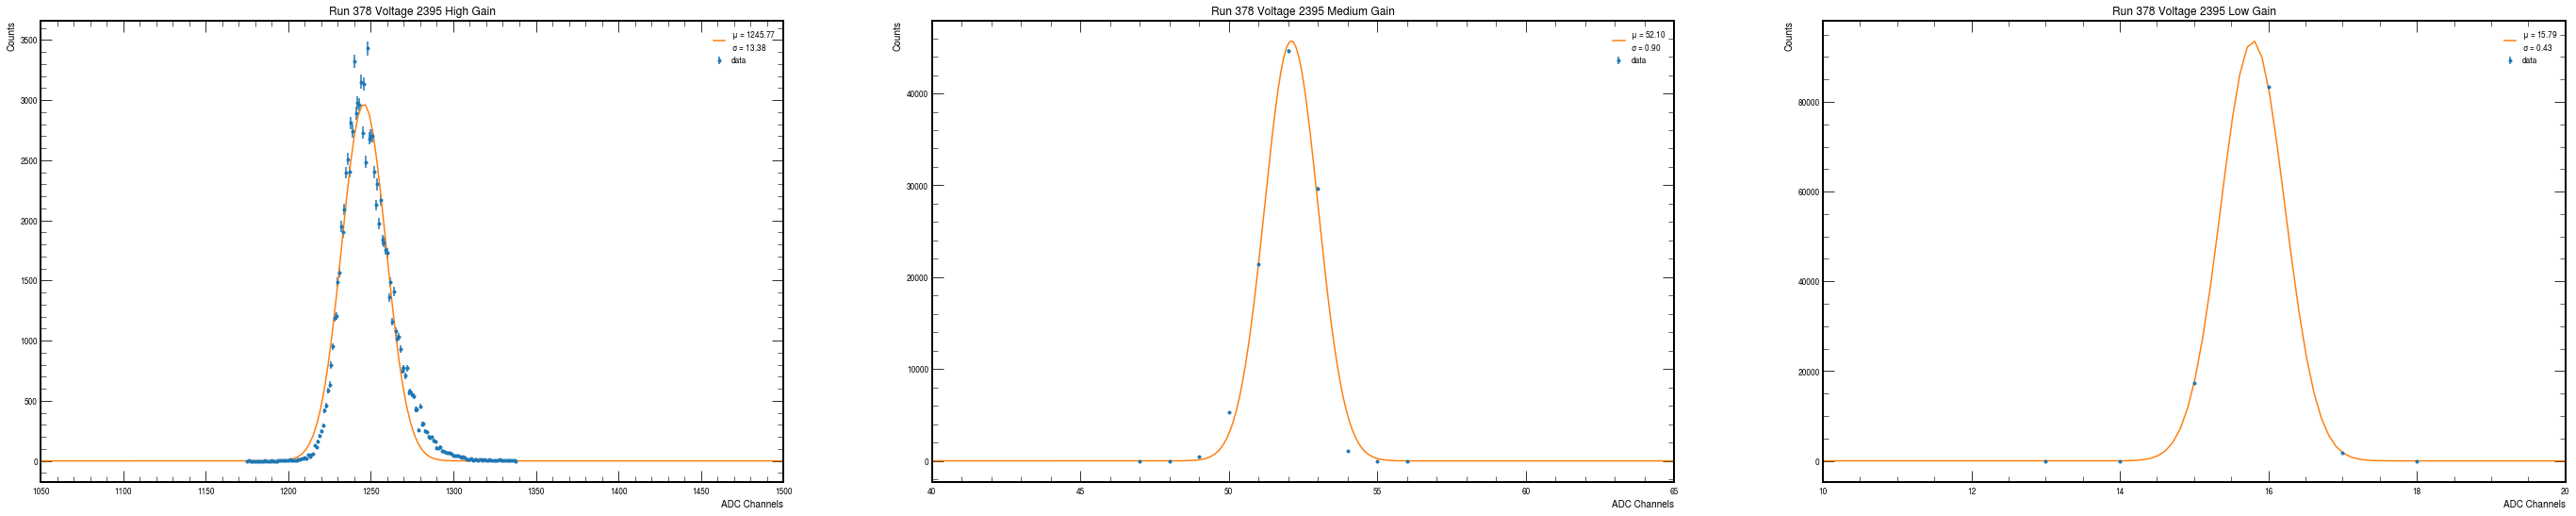

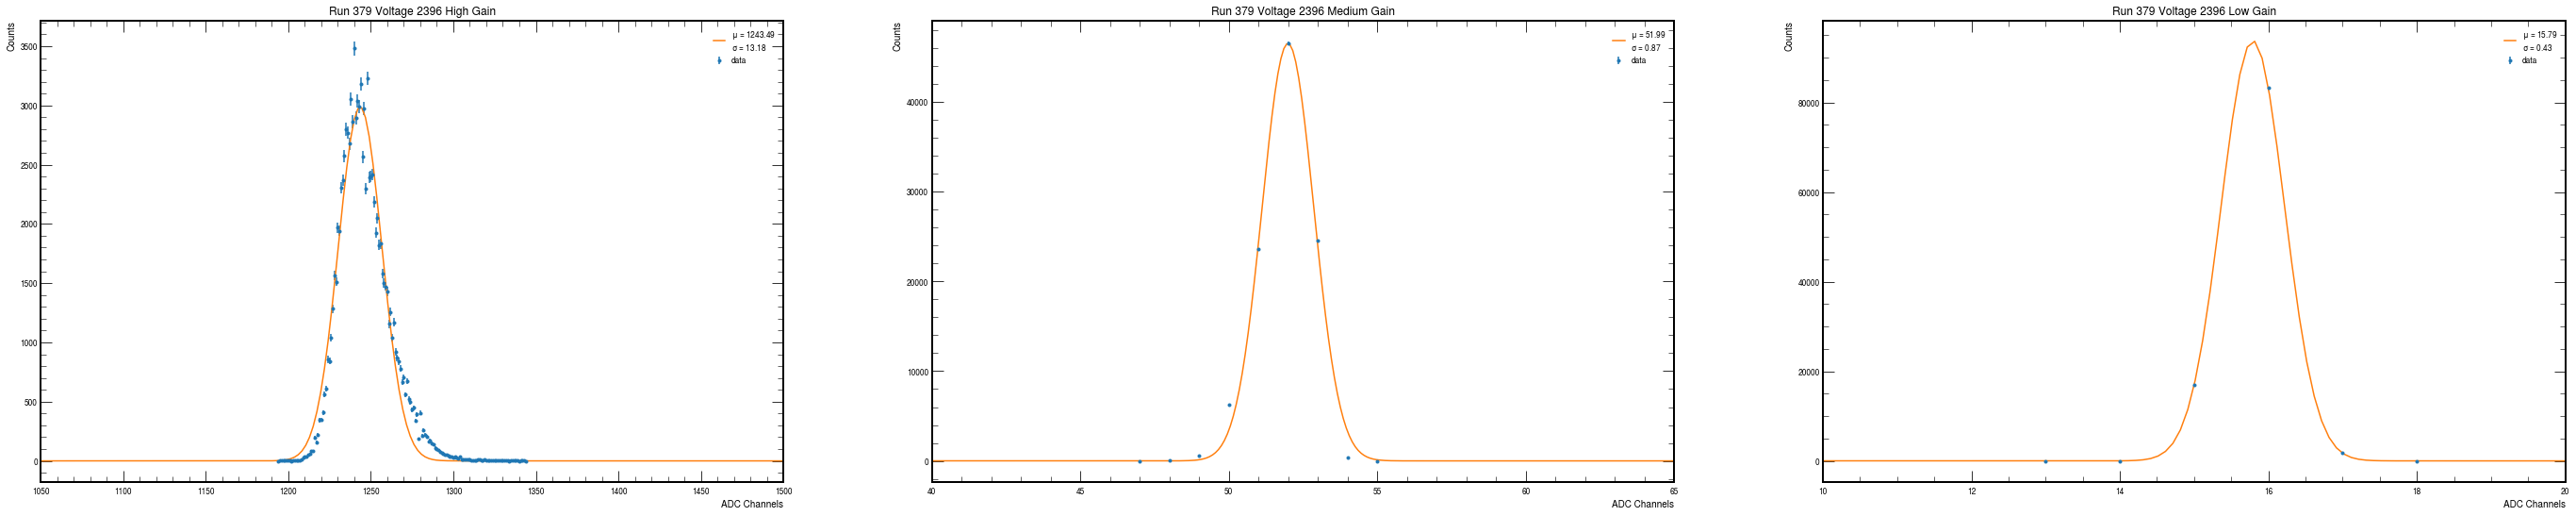

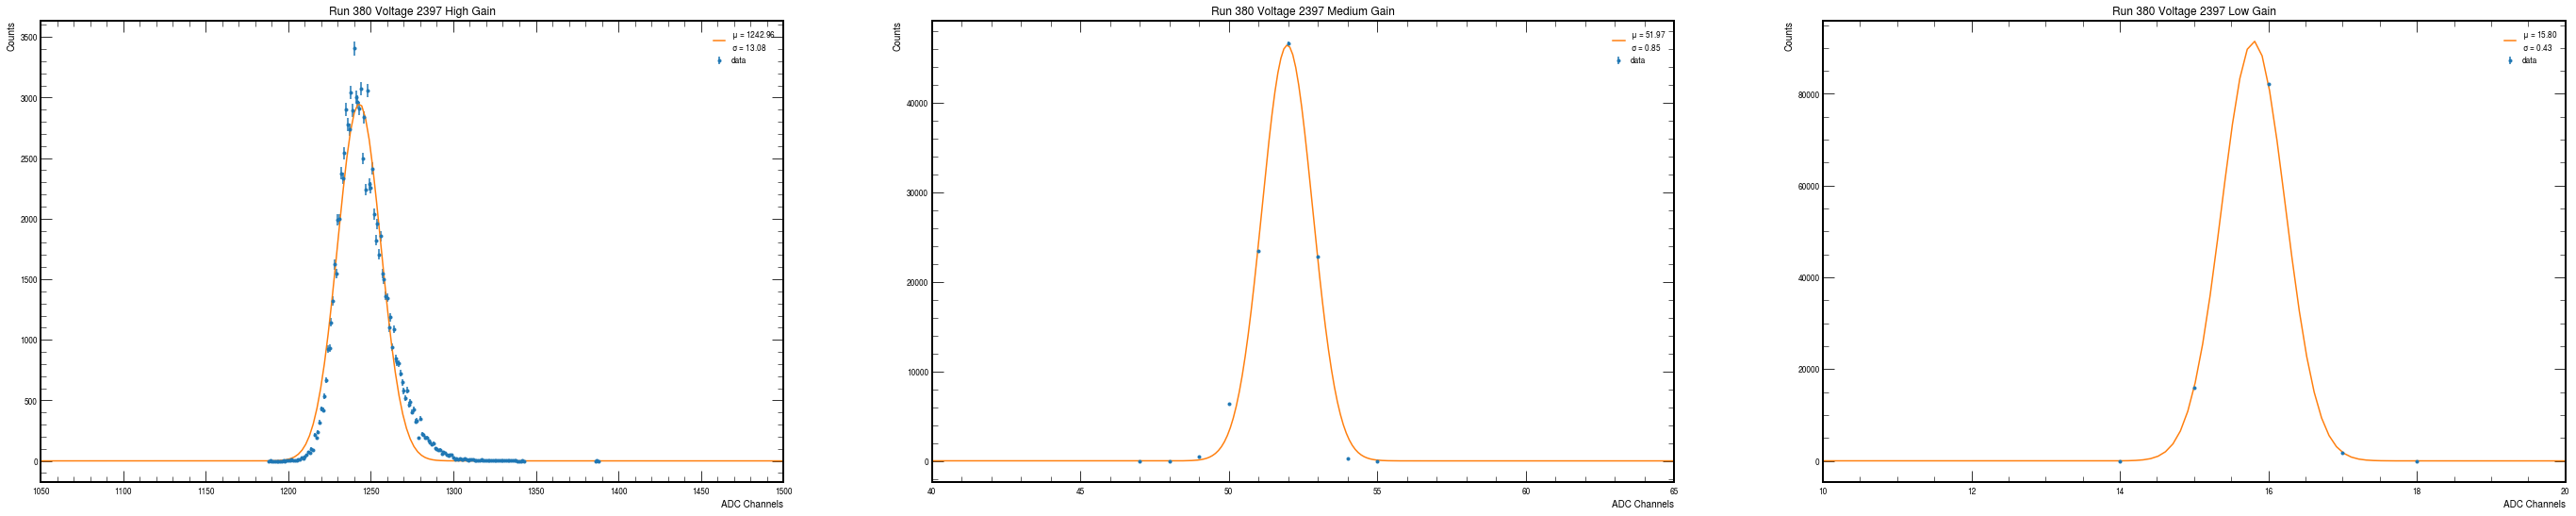

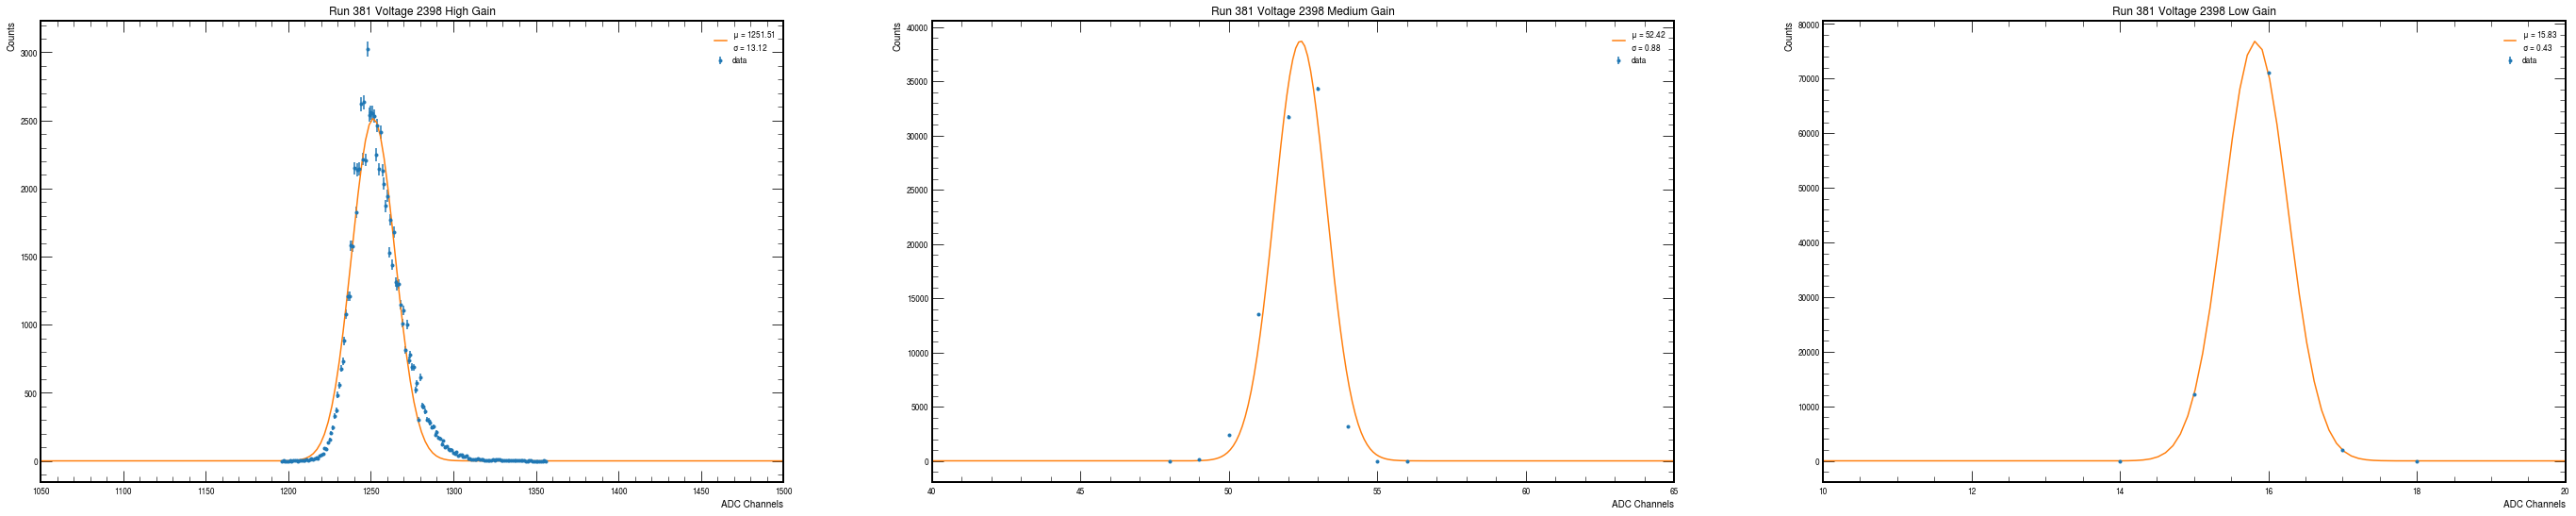

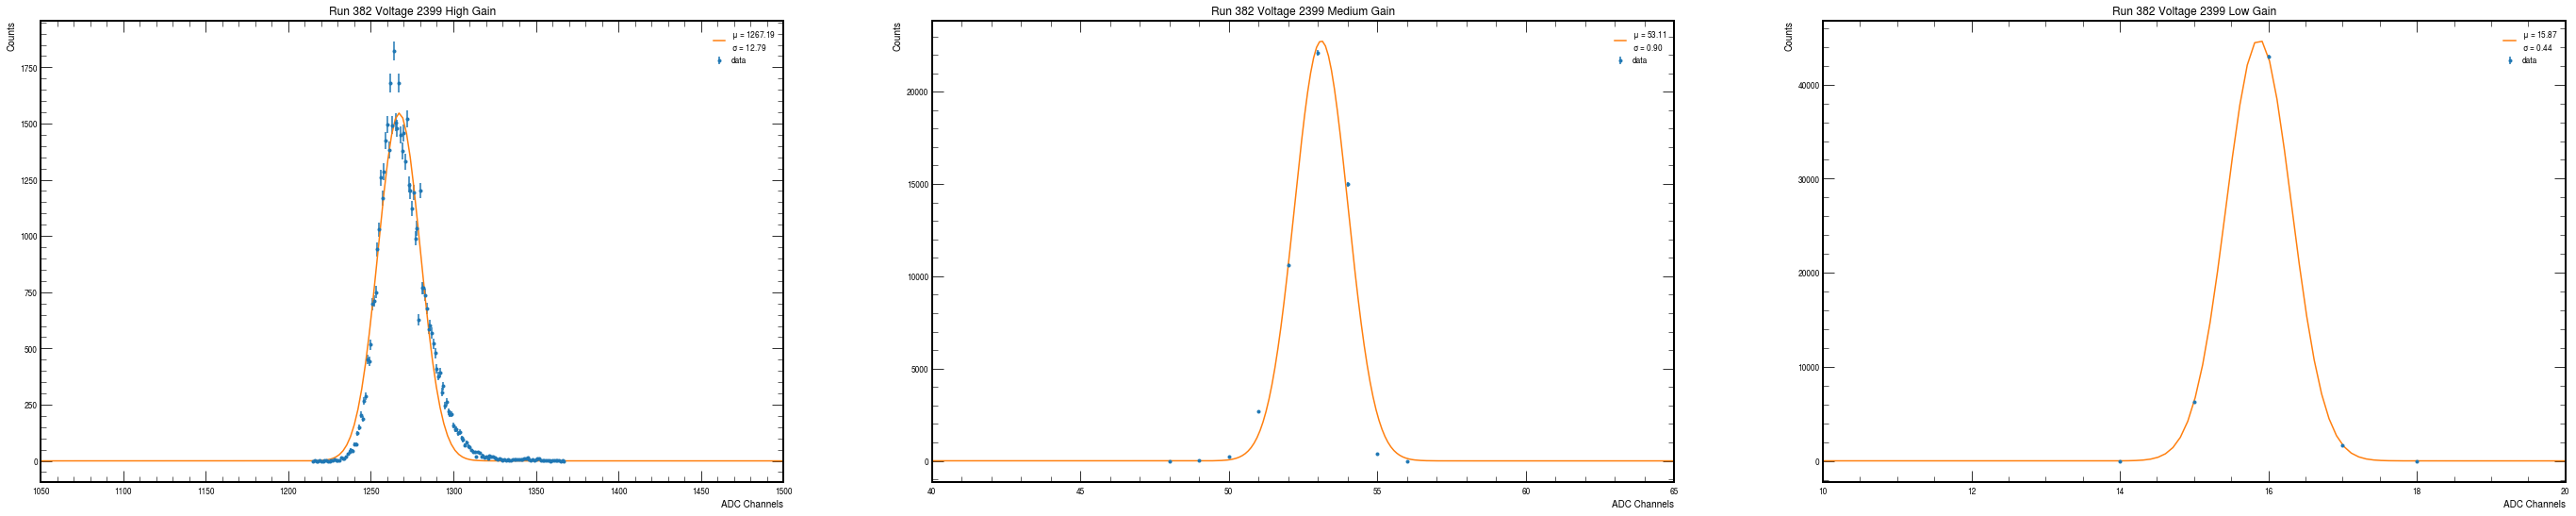

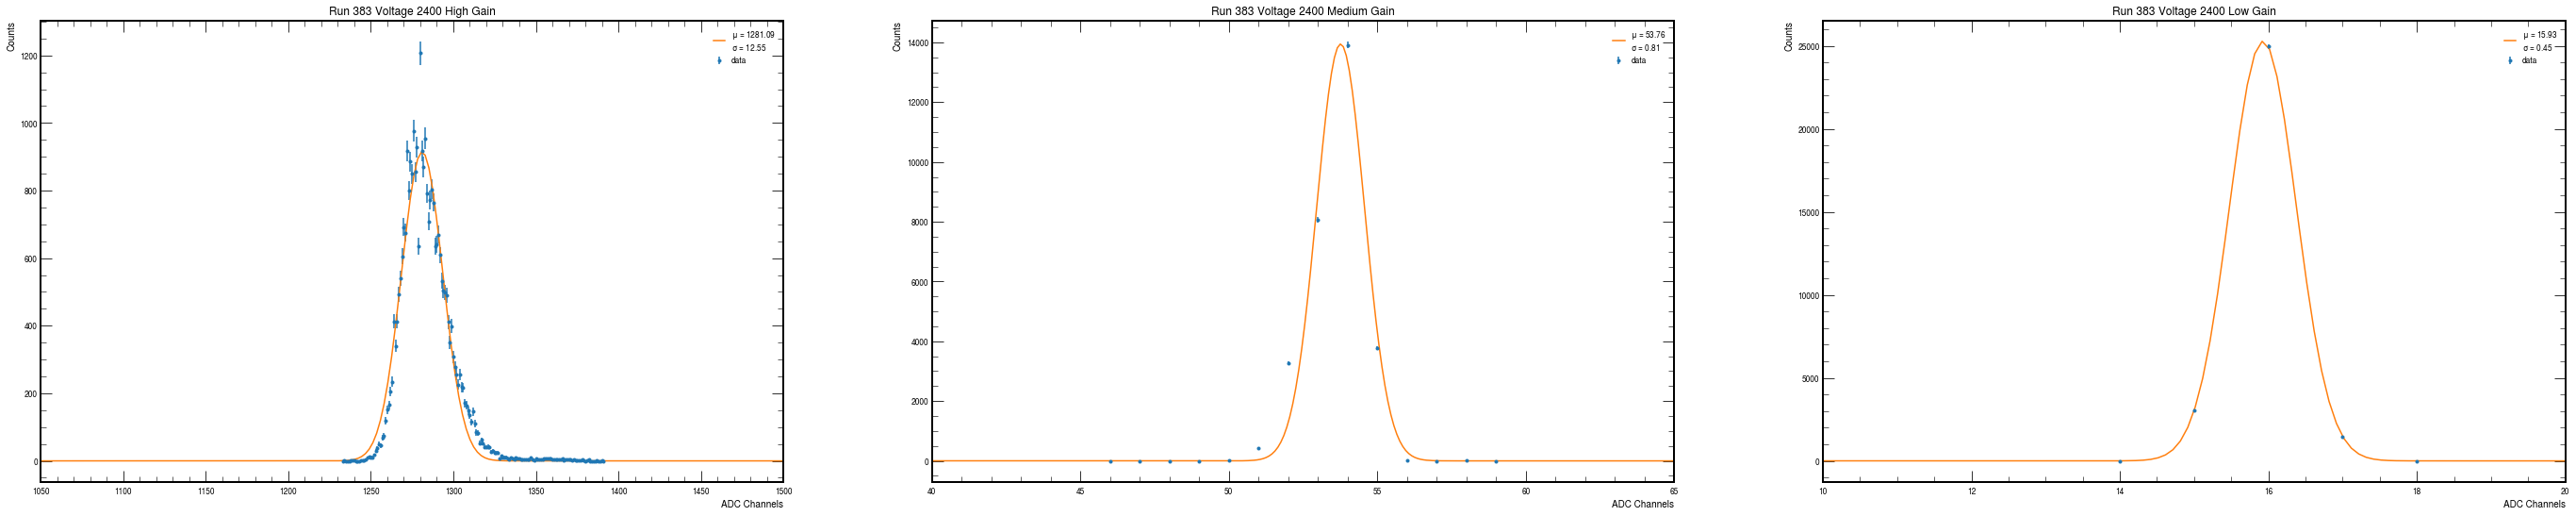

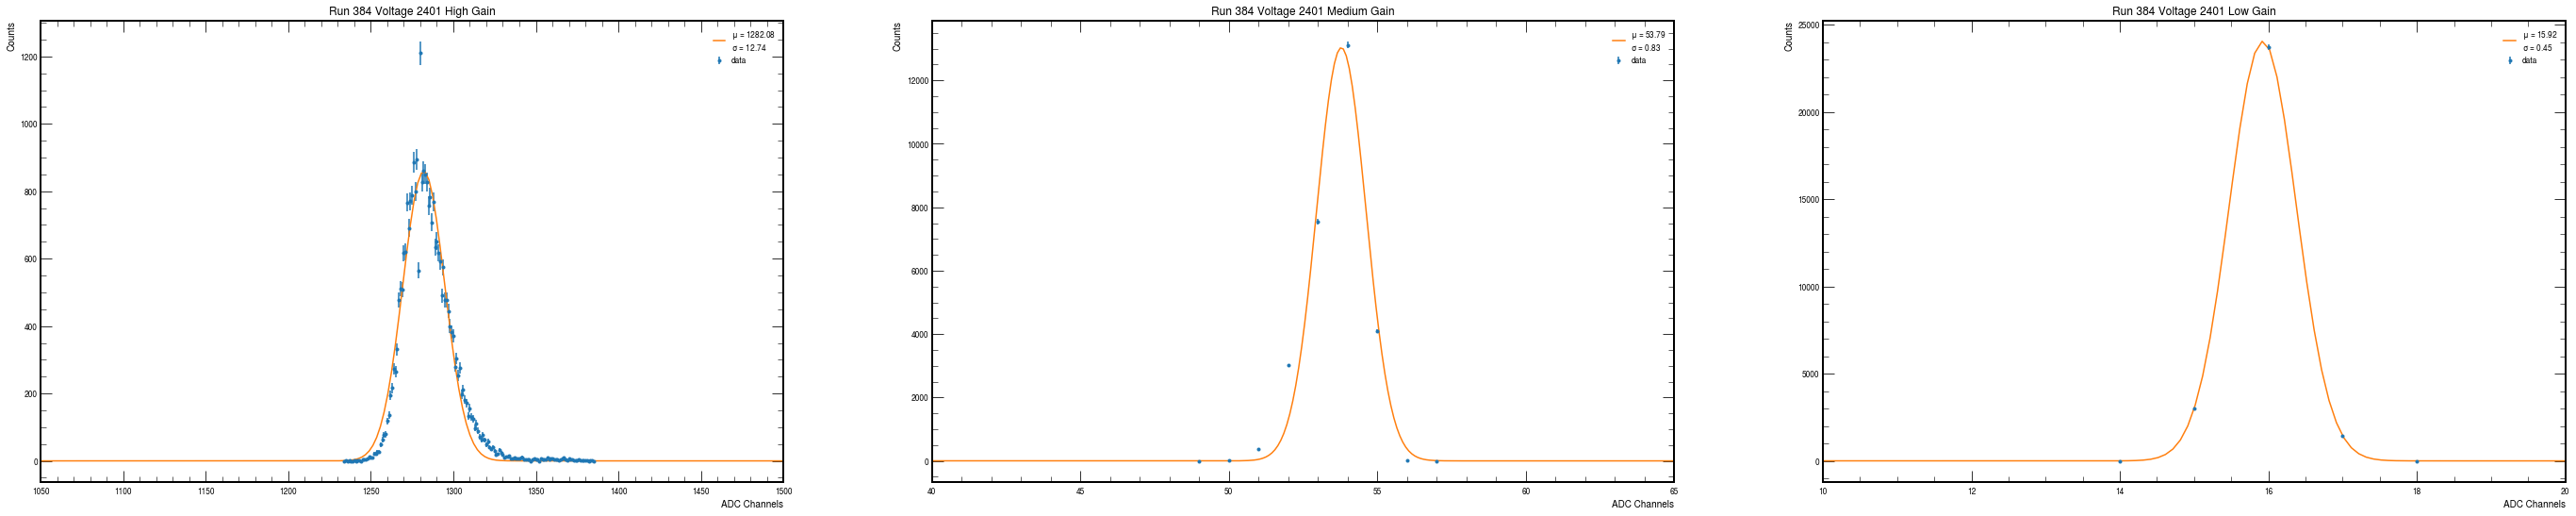

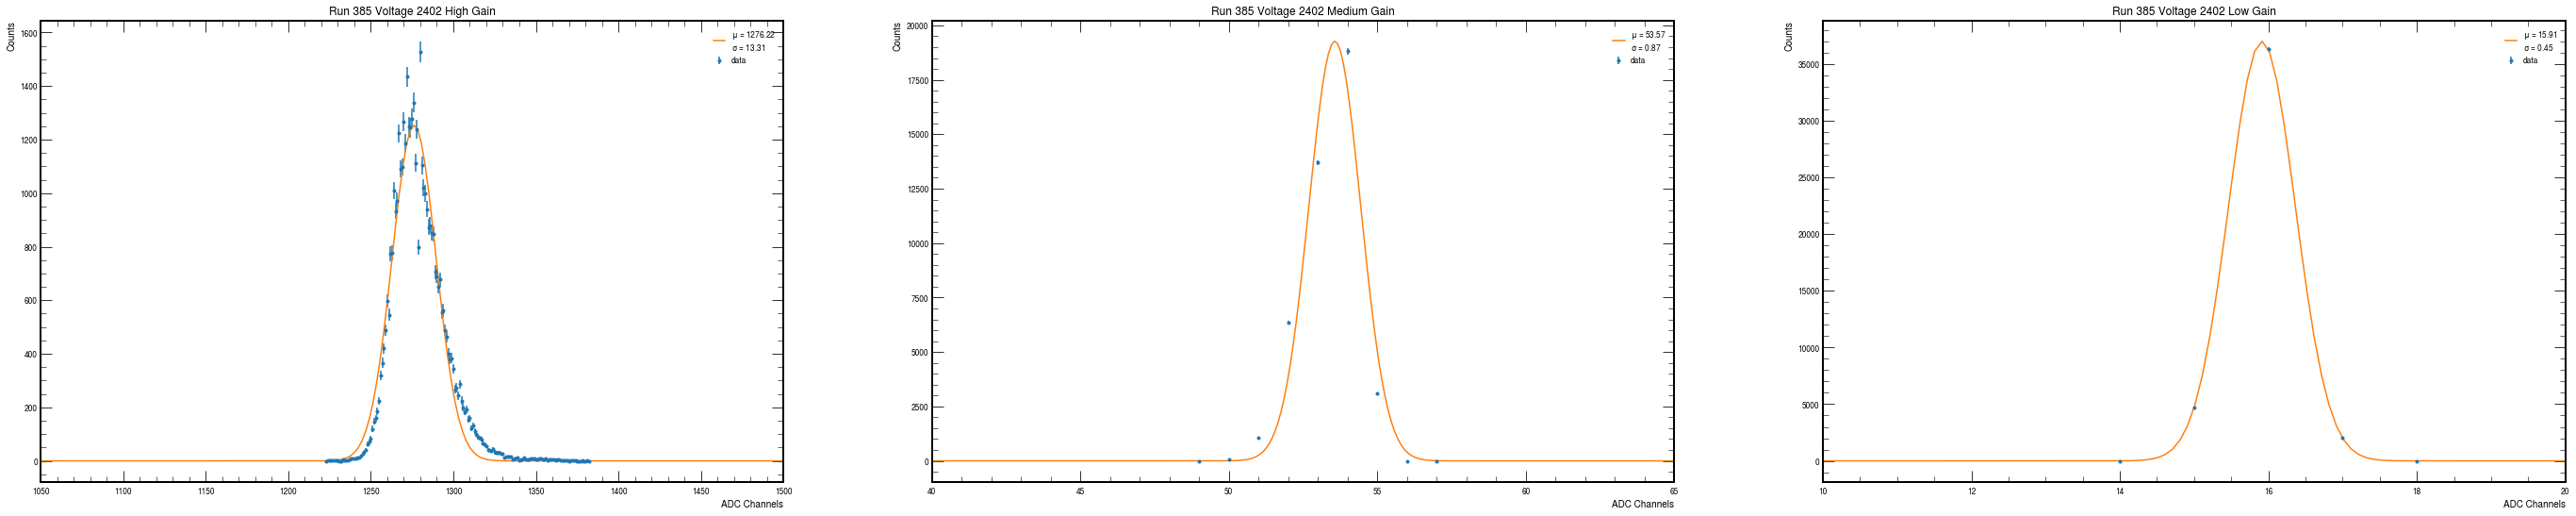

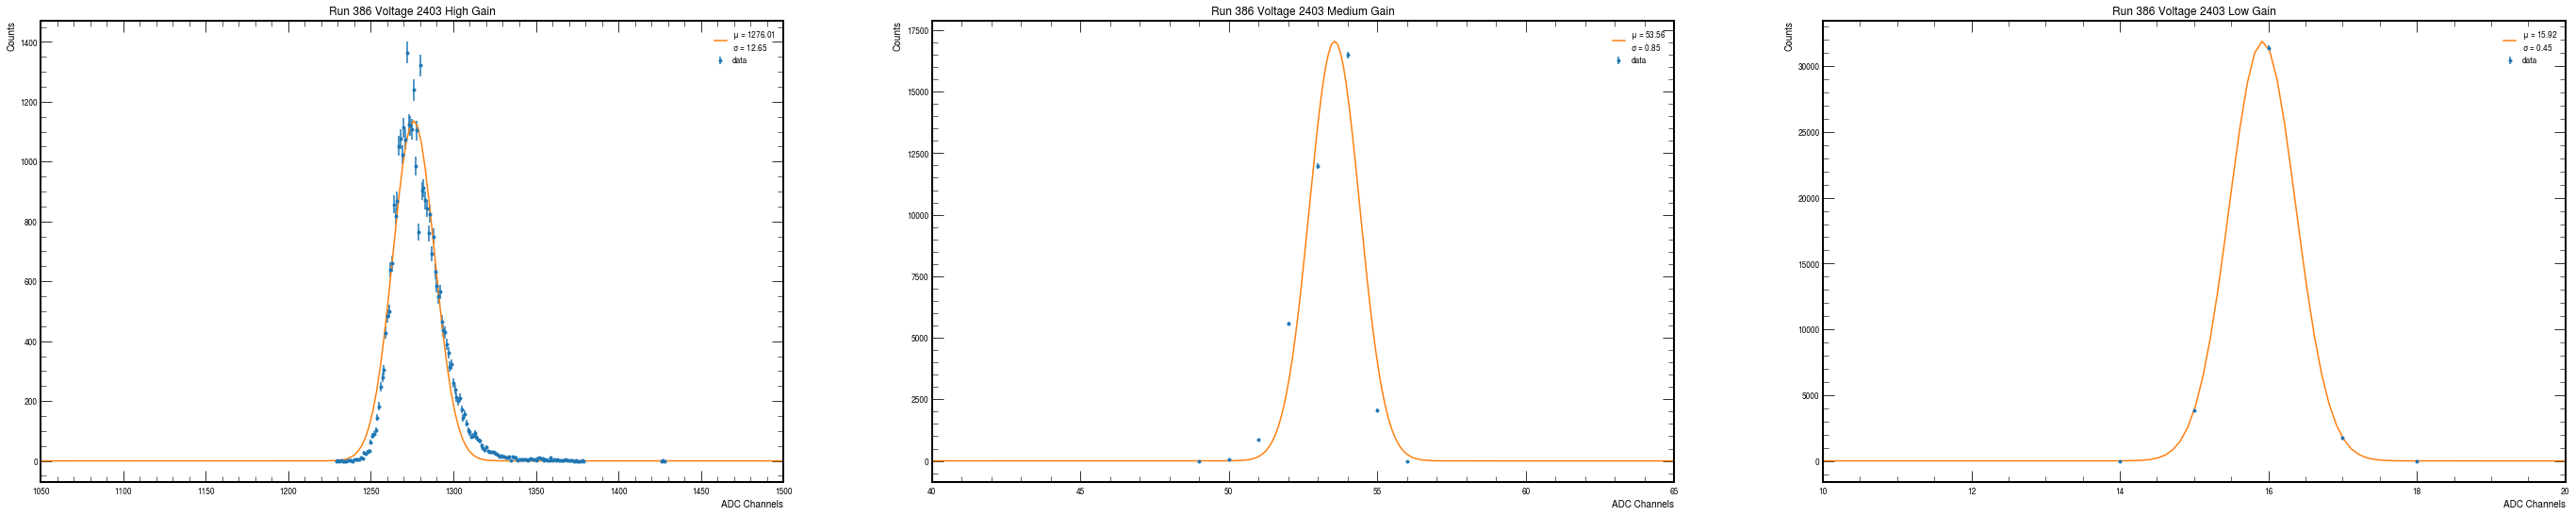

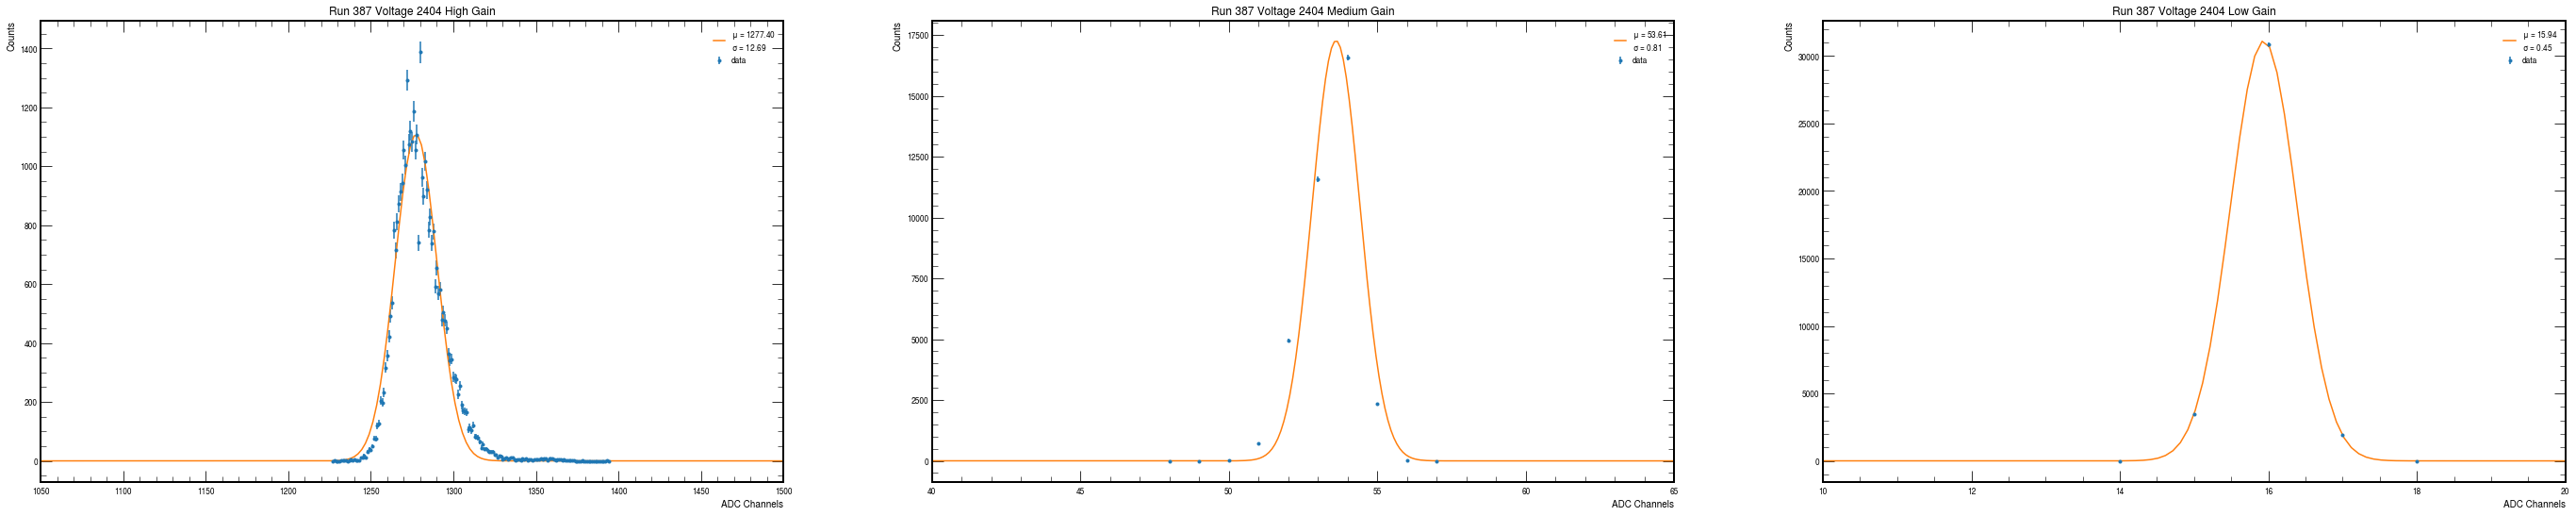

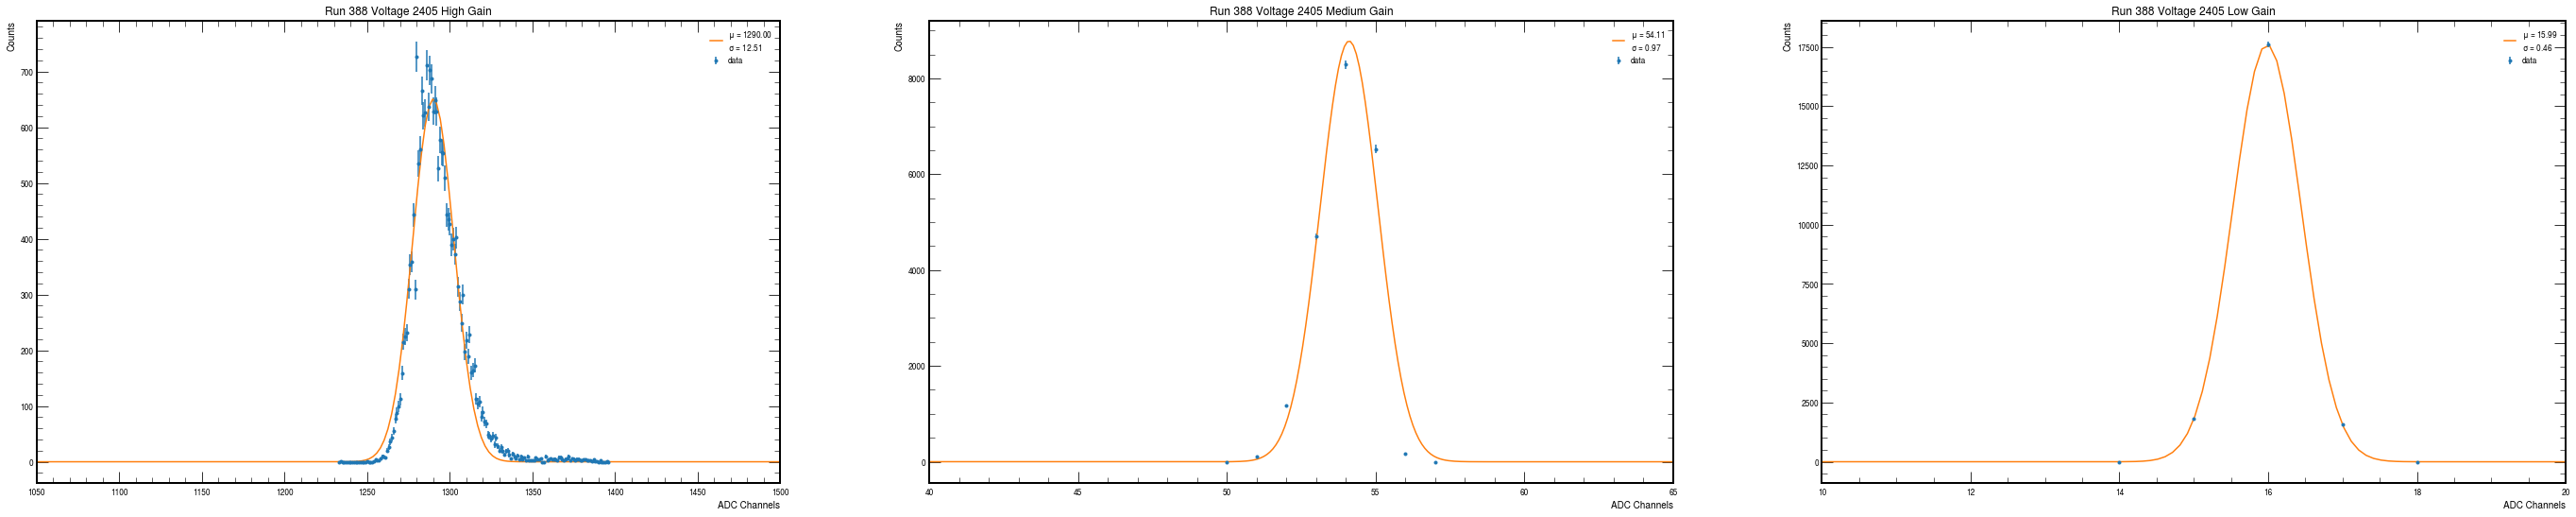

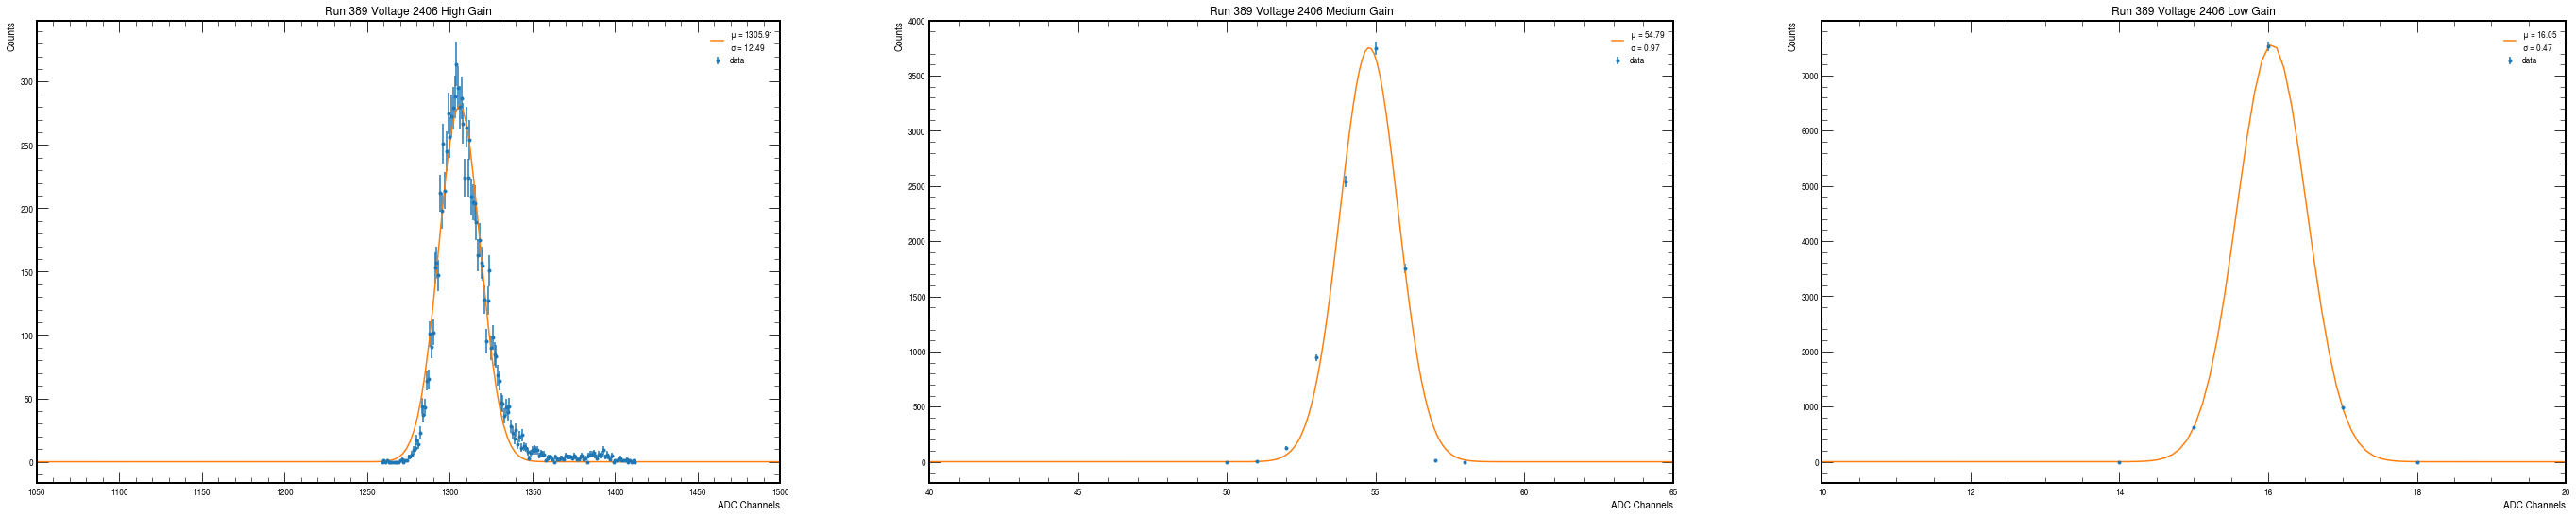

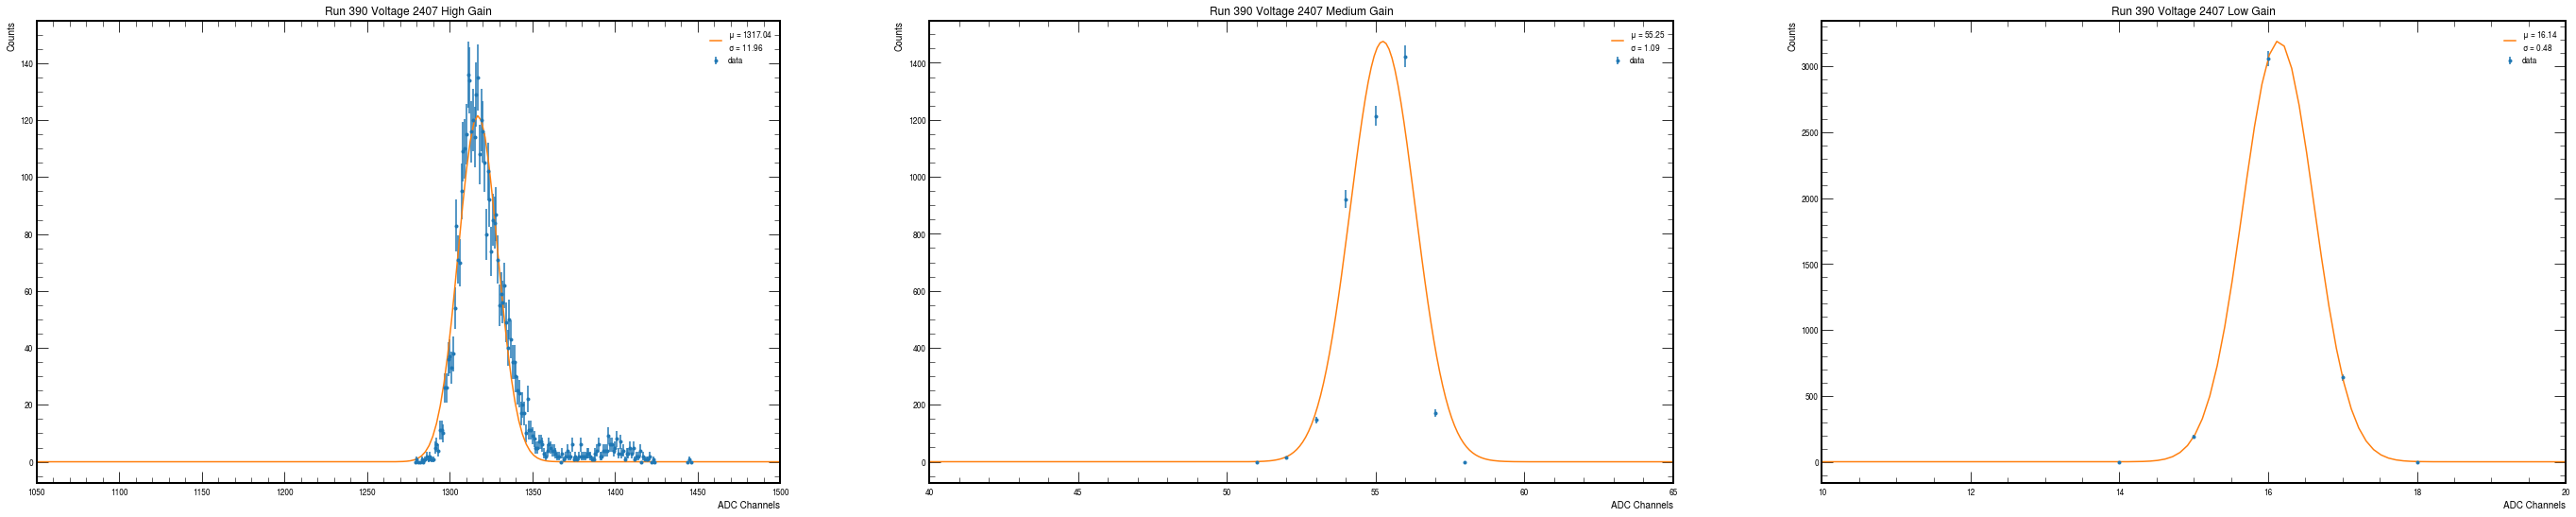

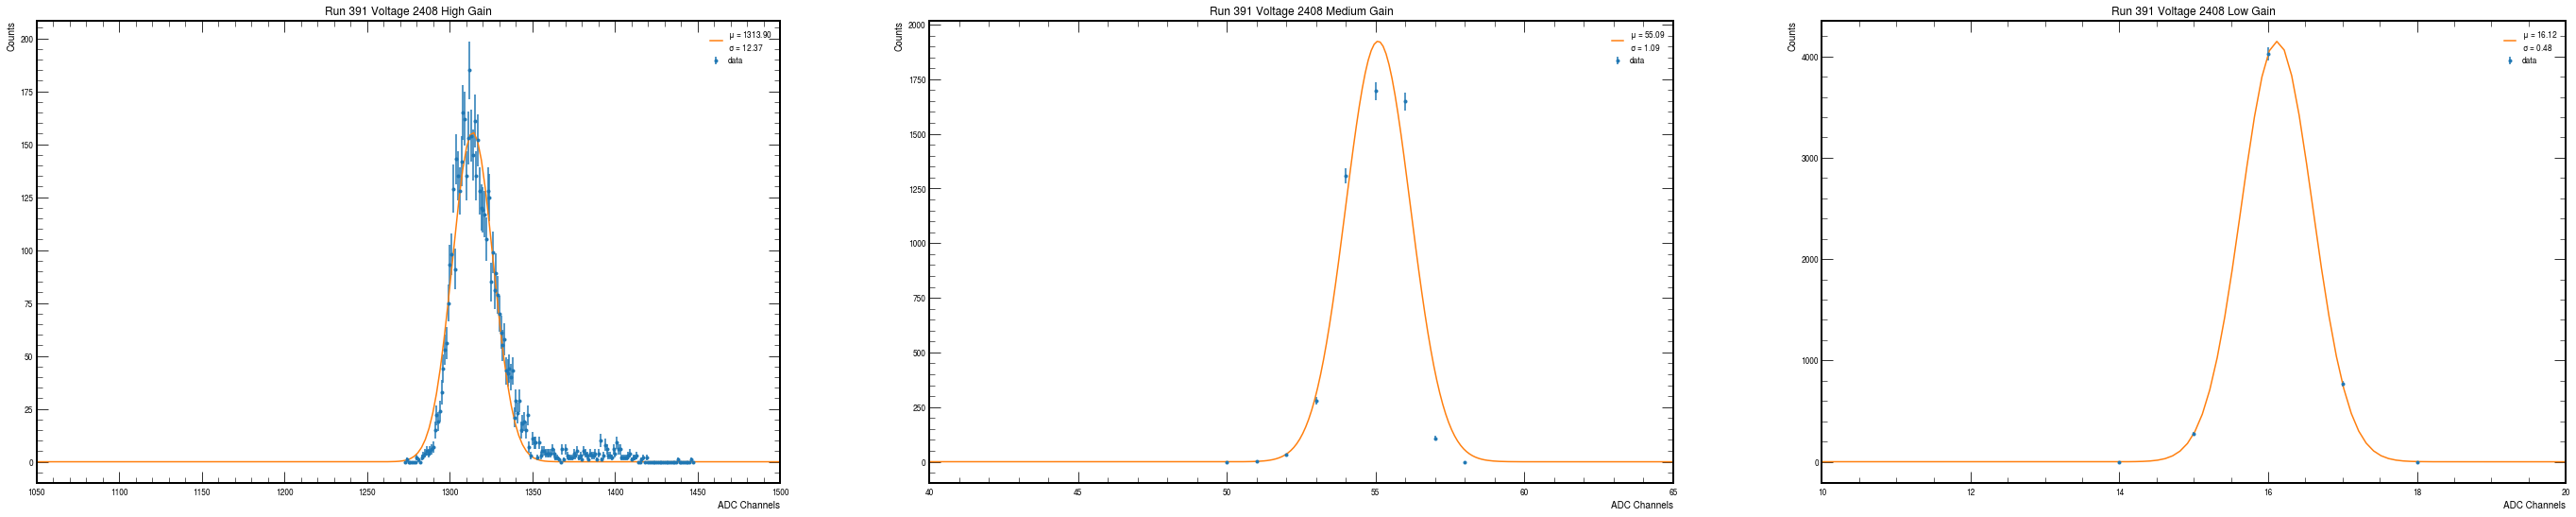

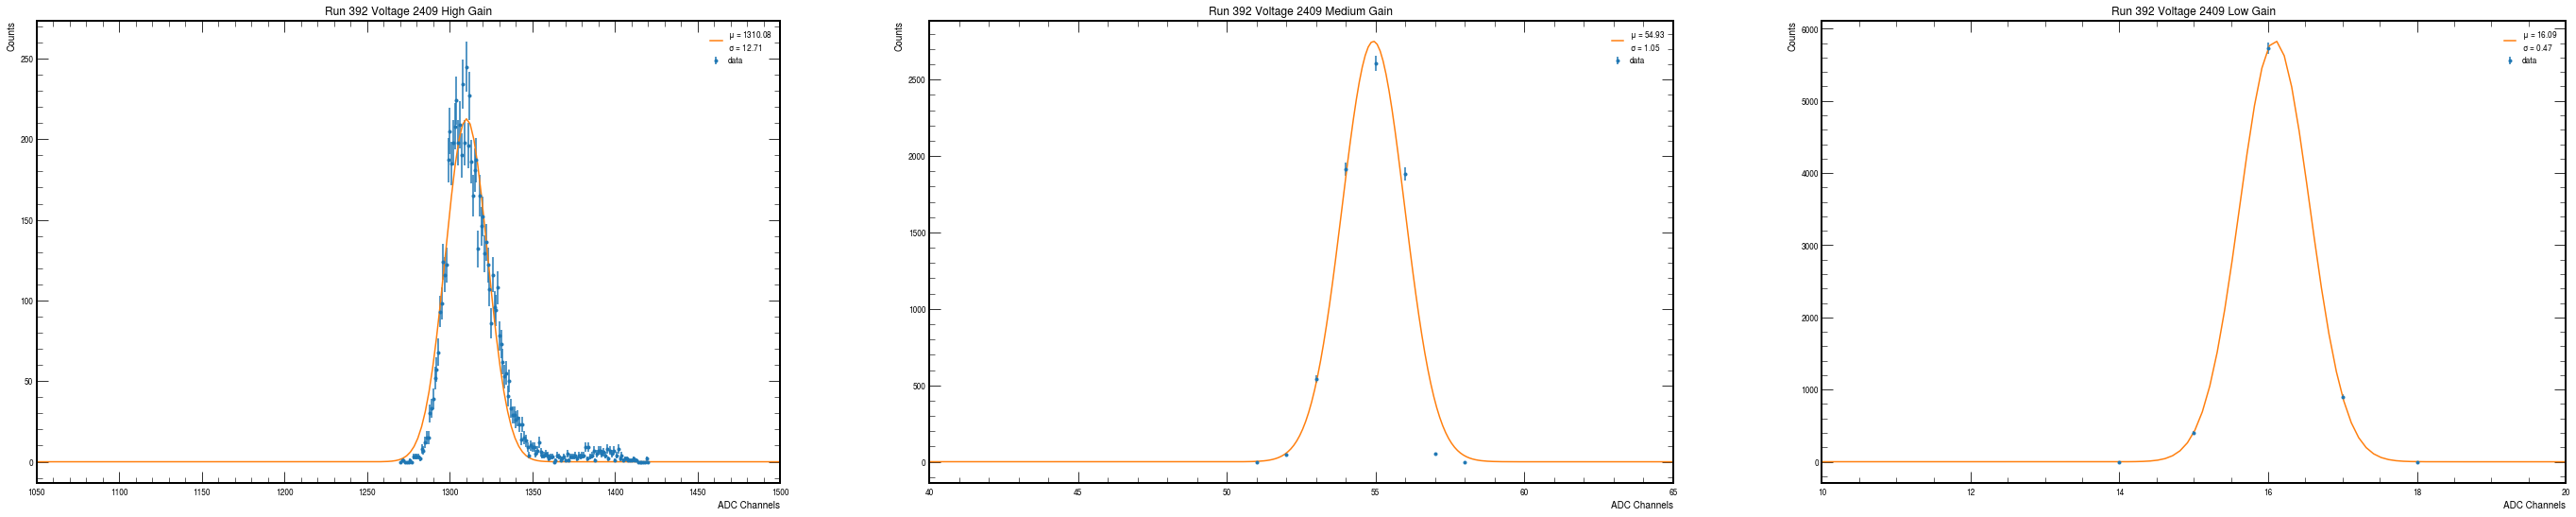

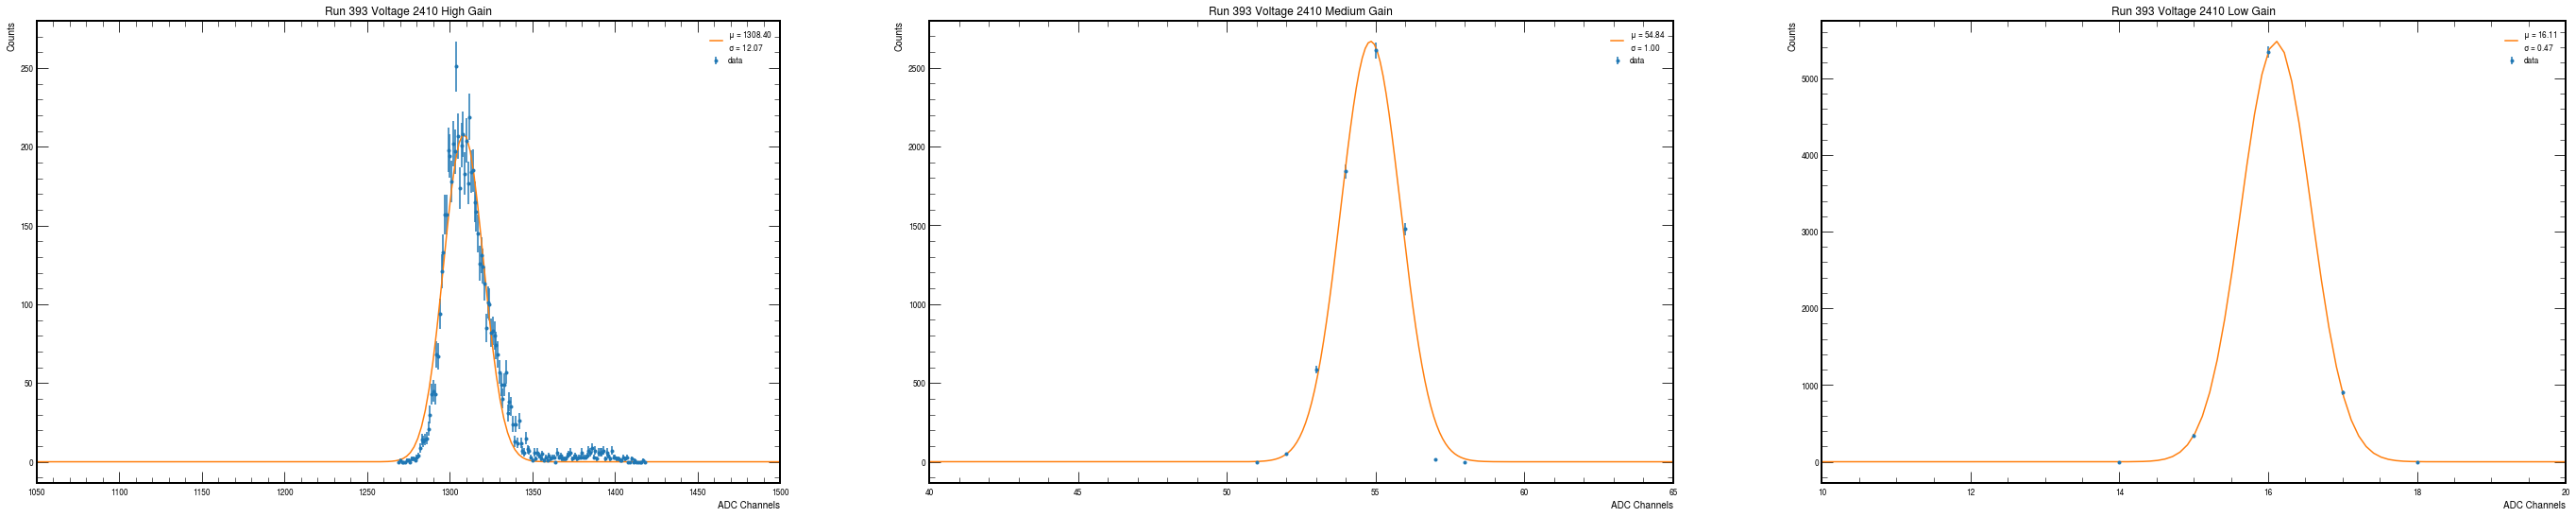

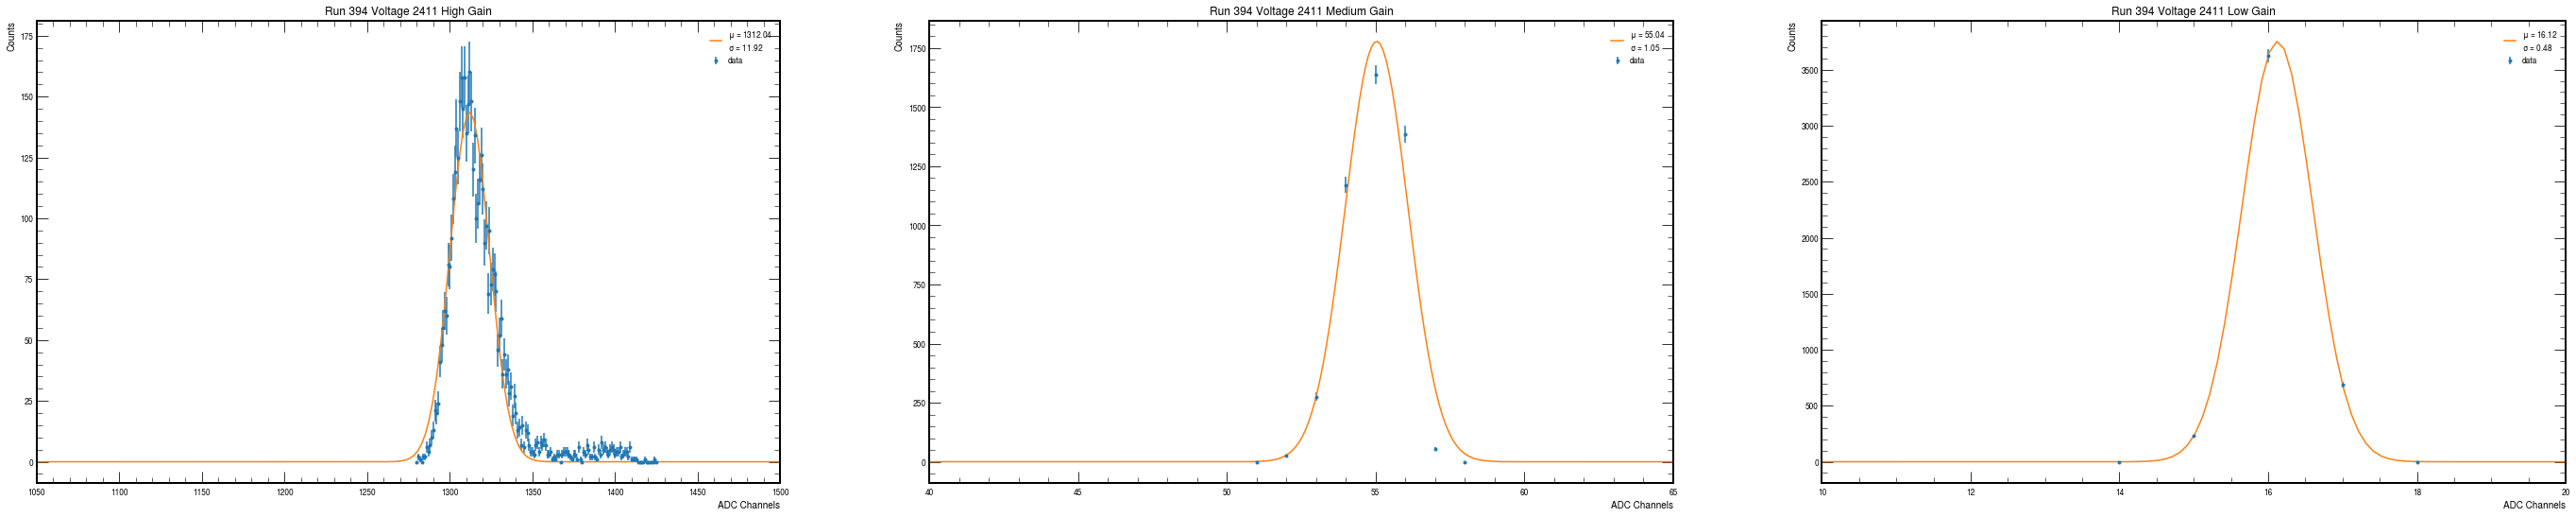

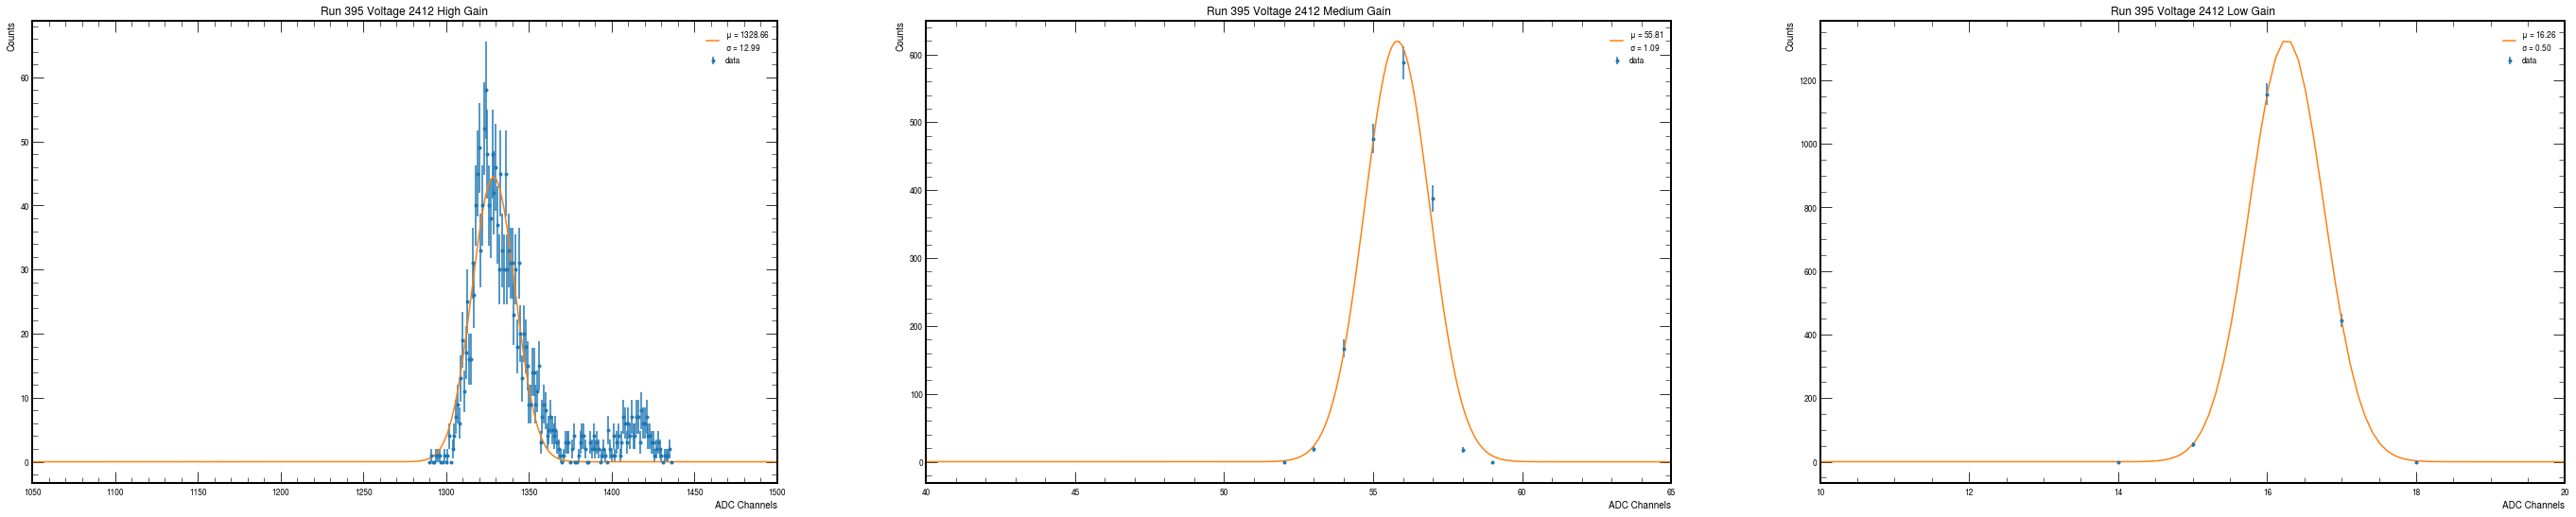

C:\Users\jiaju\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


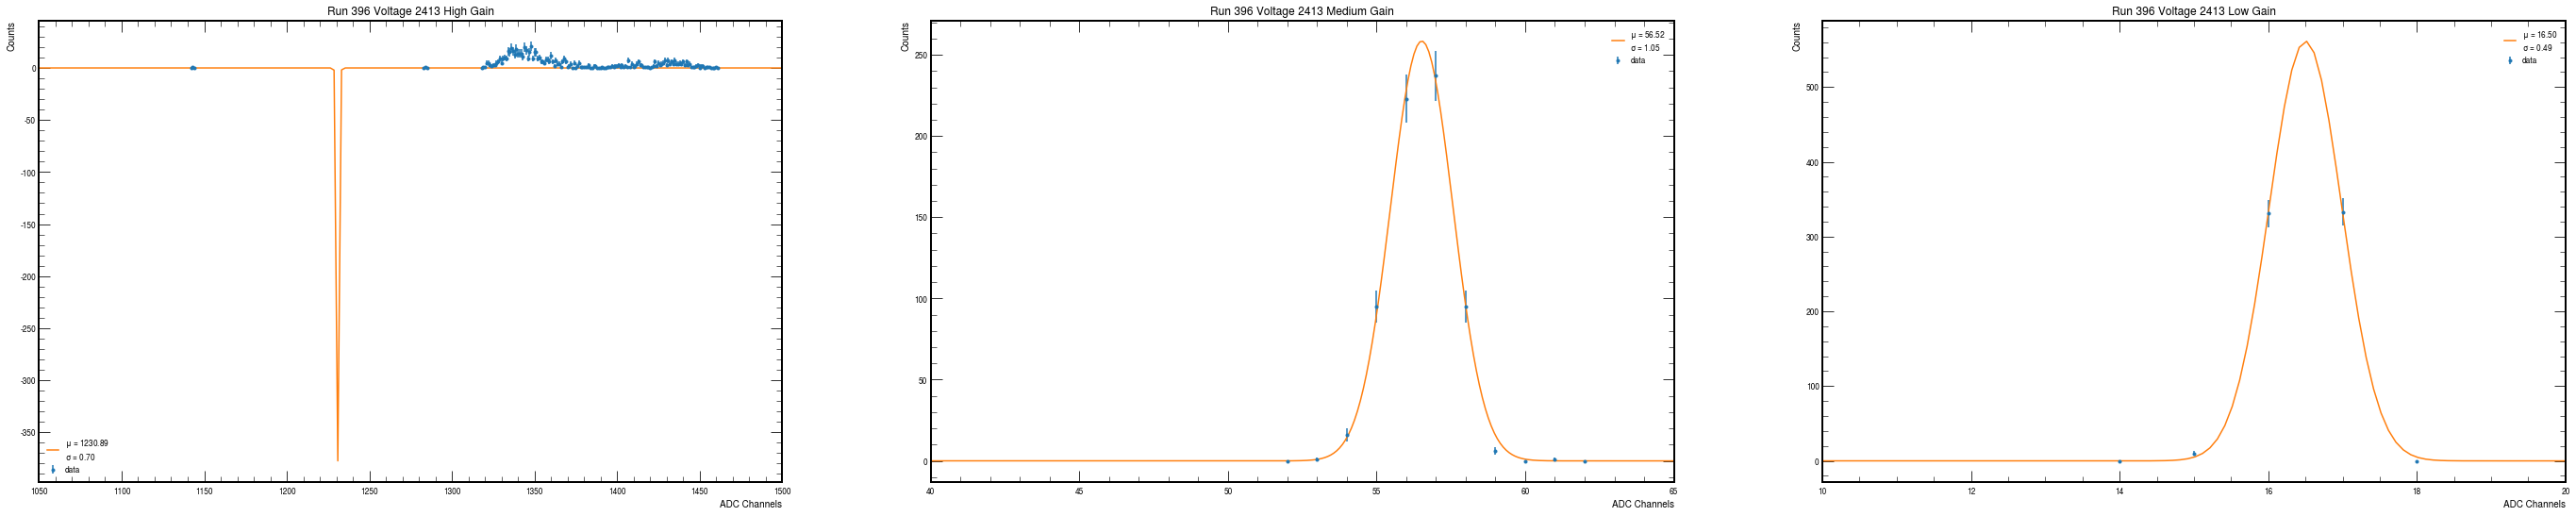

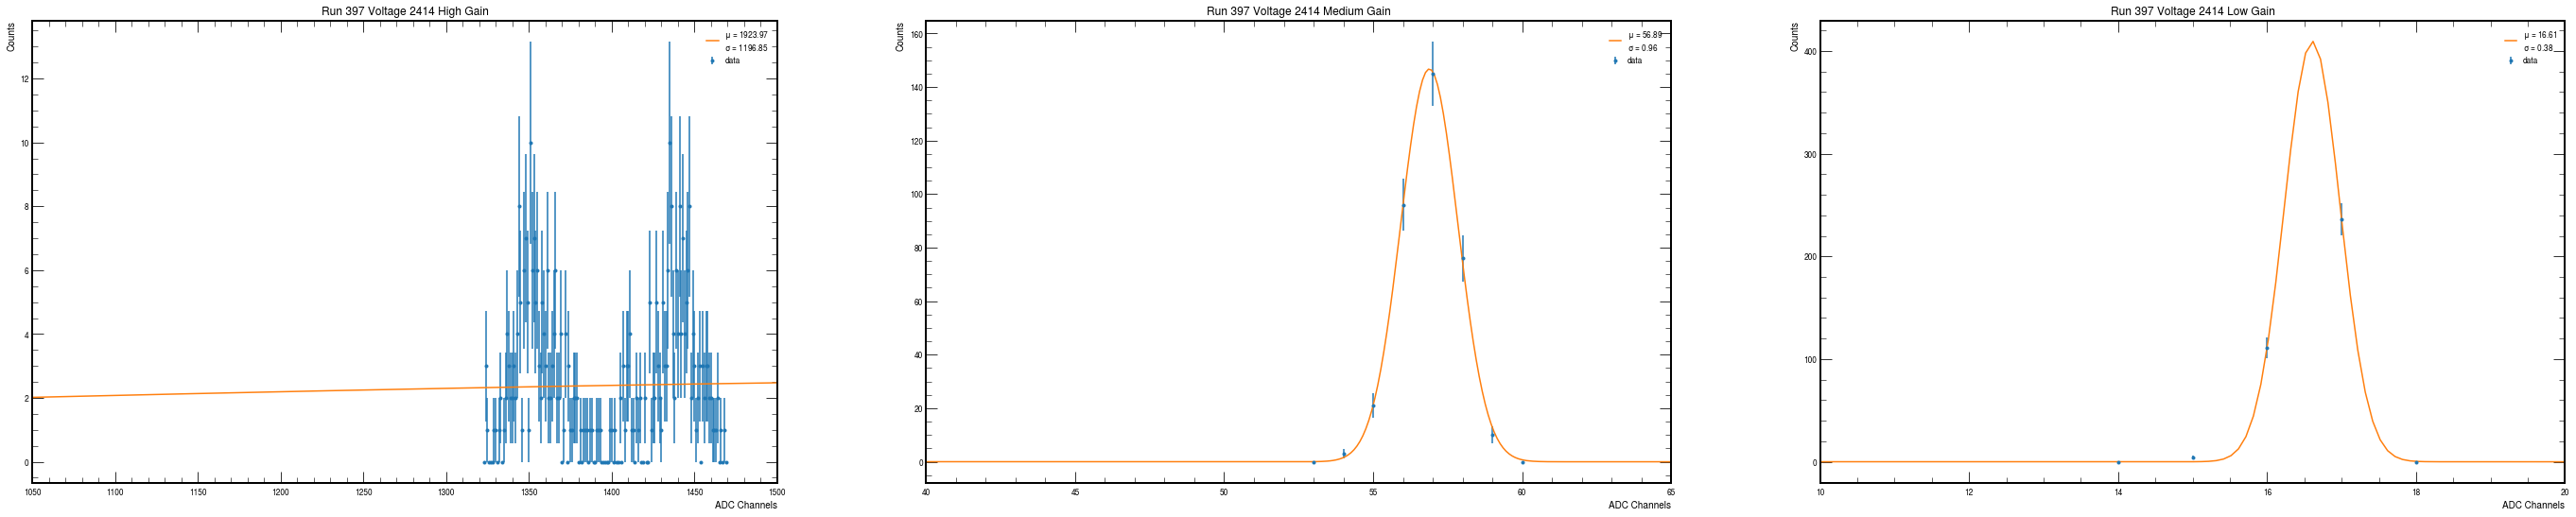

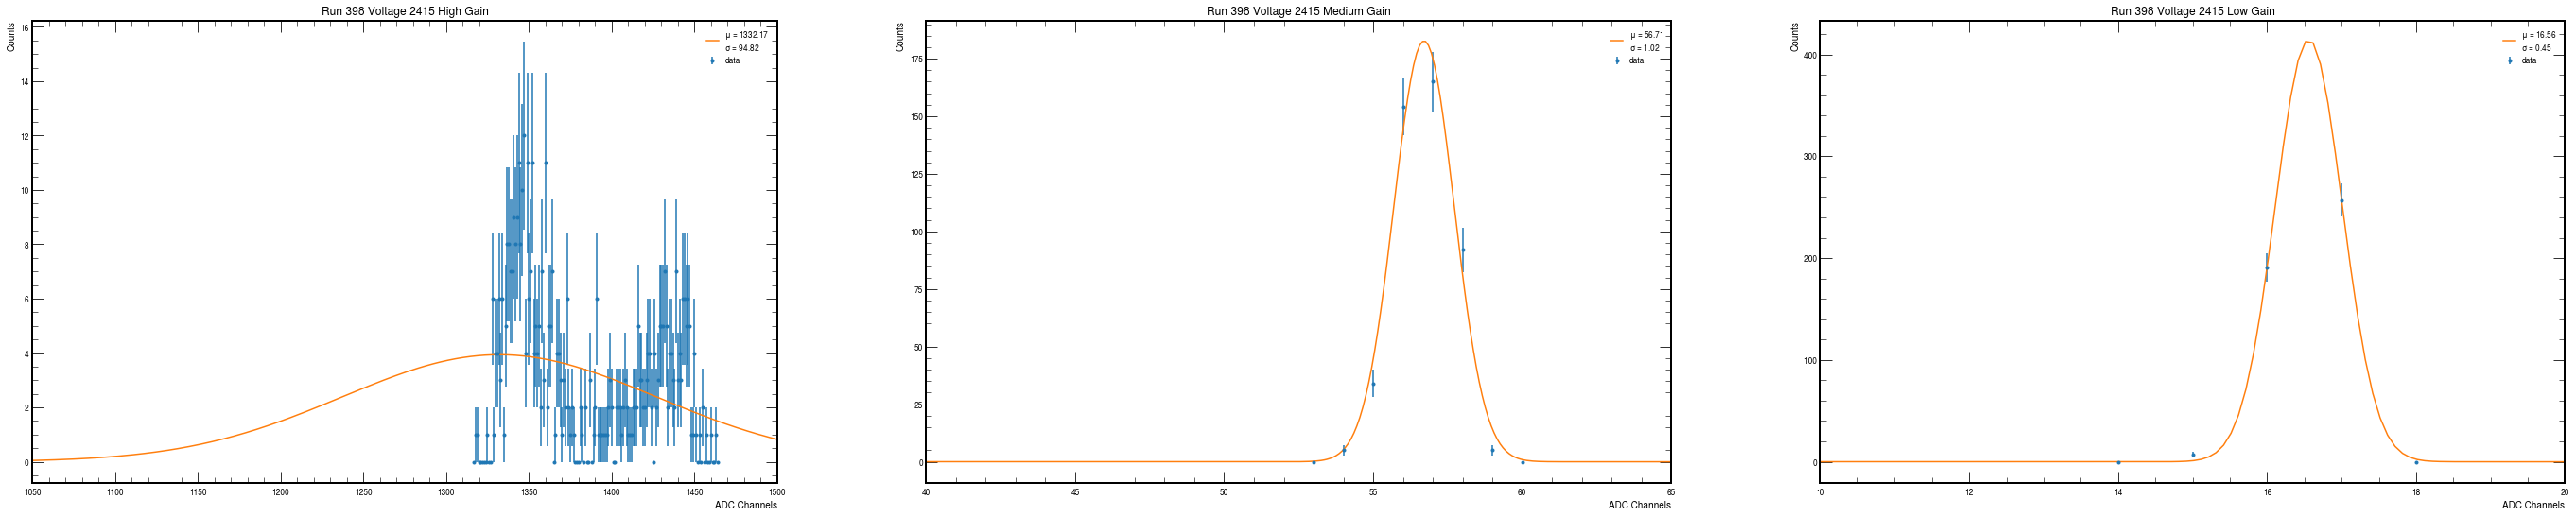

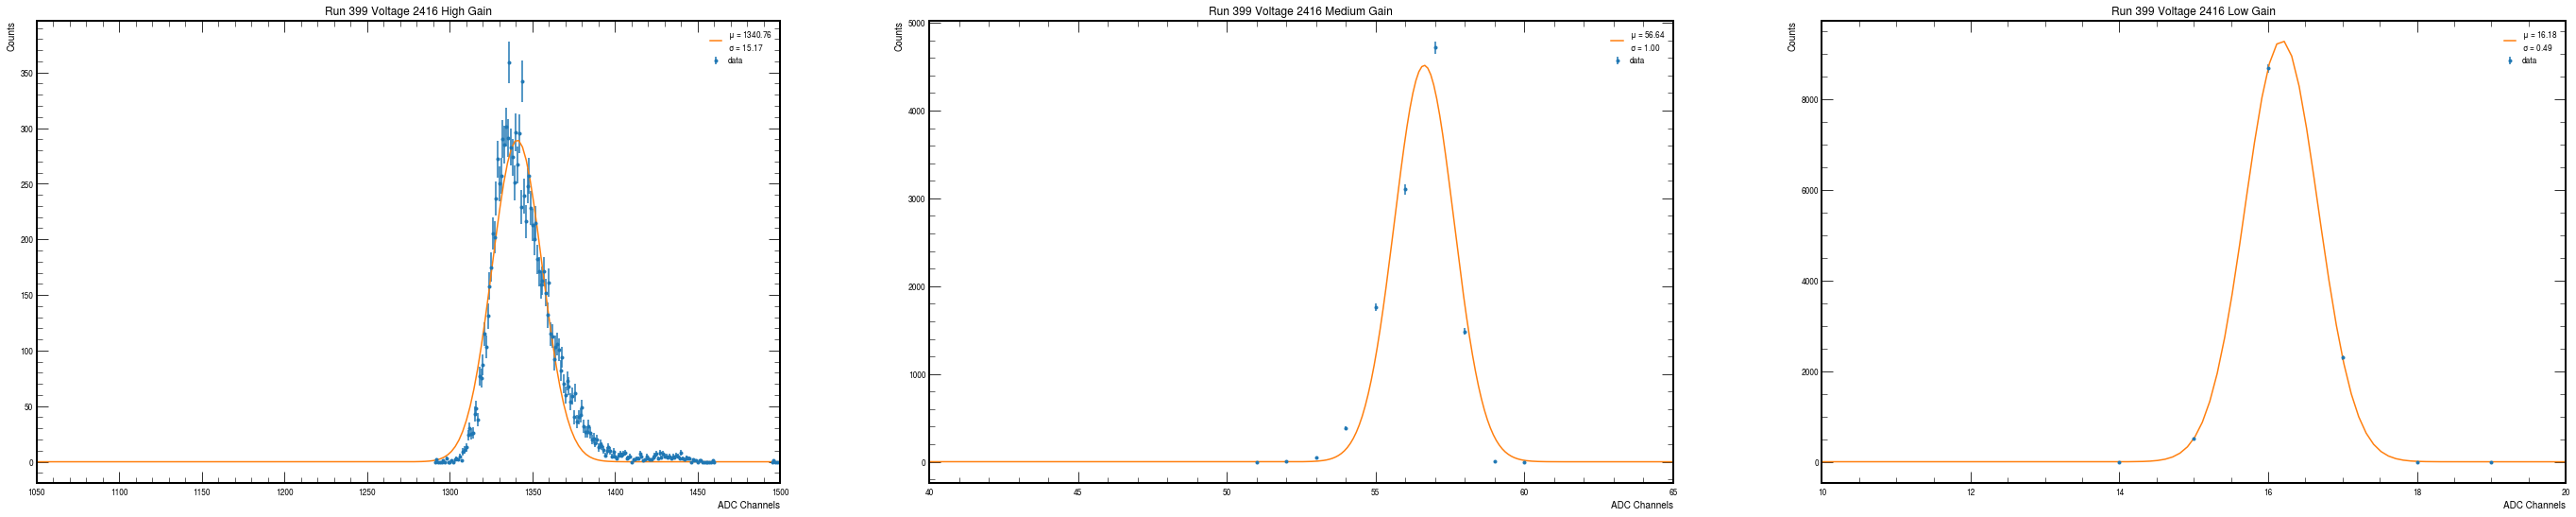

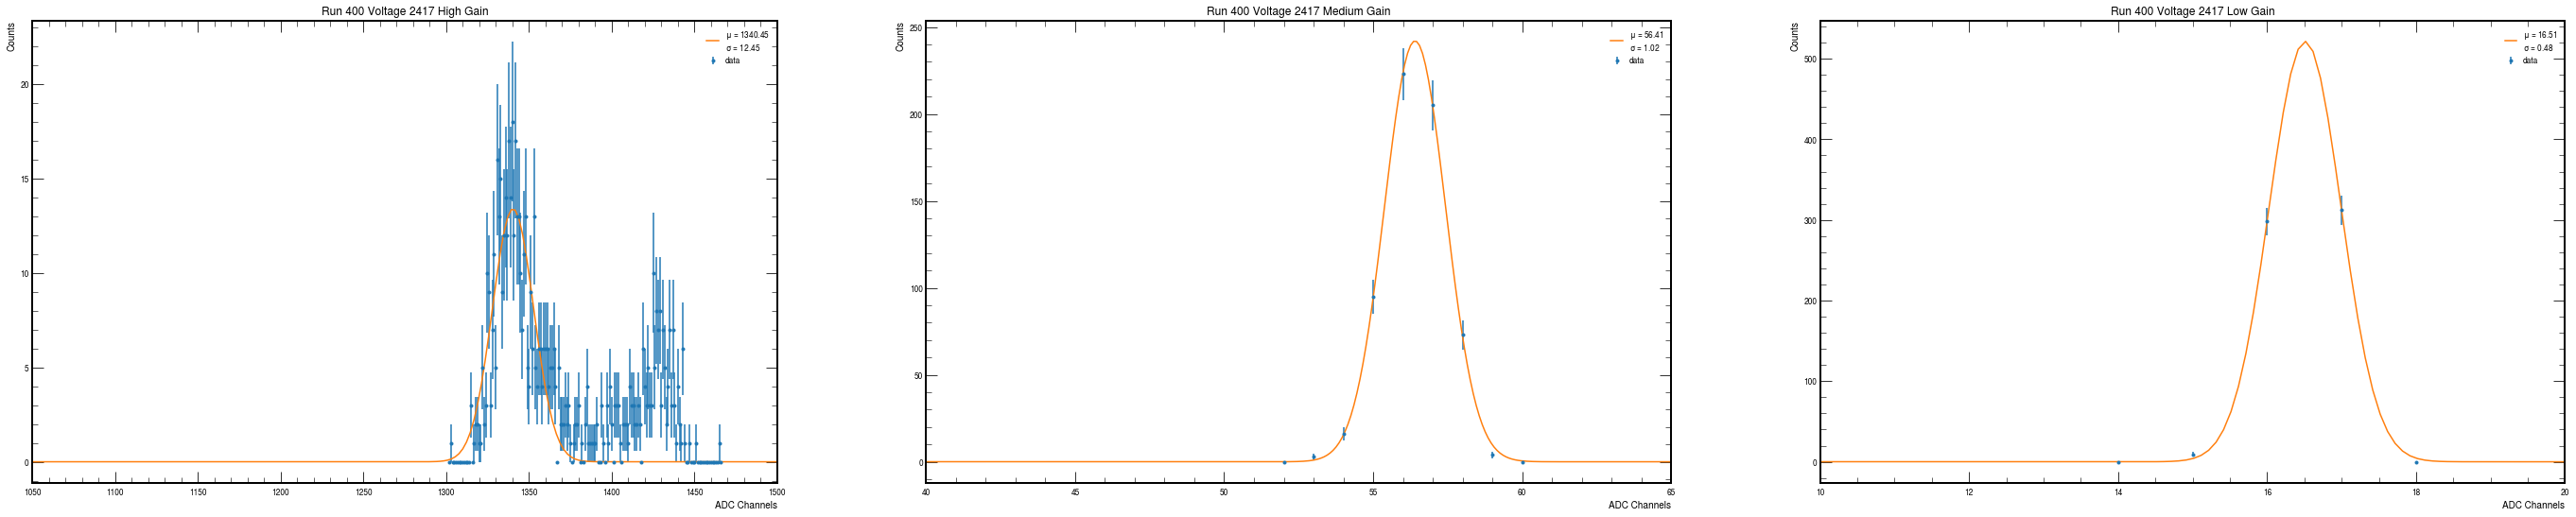

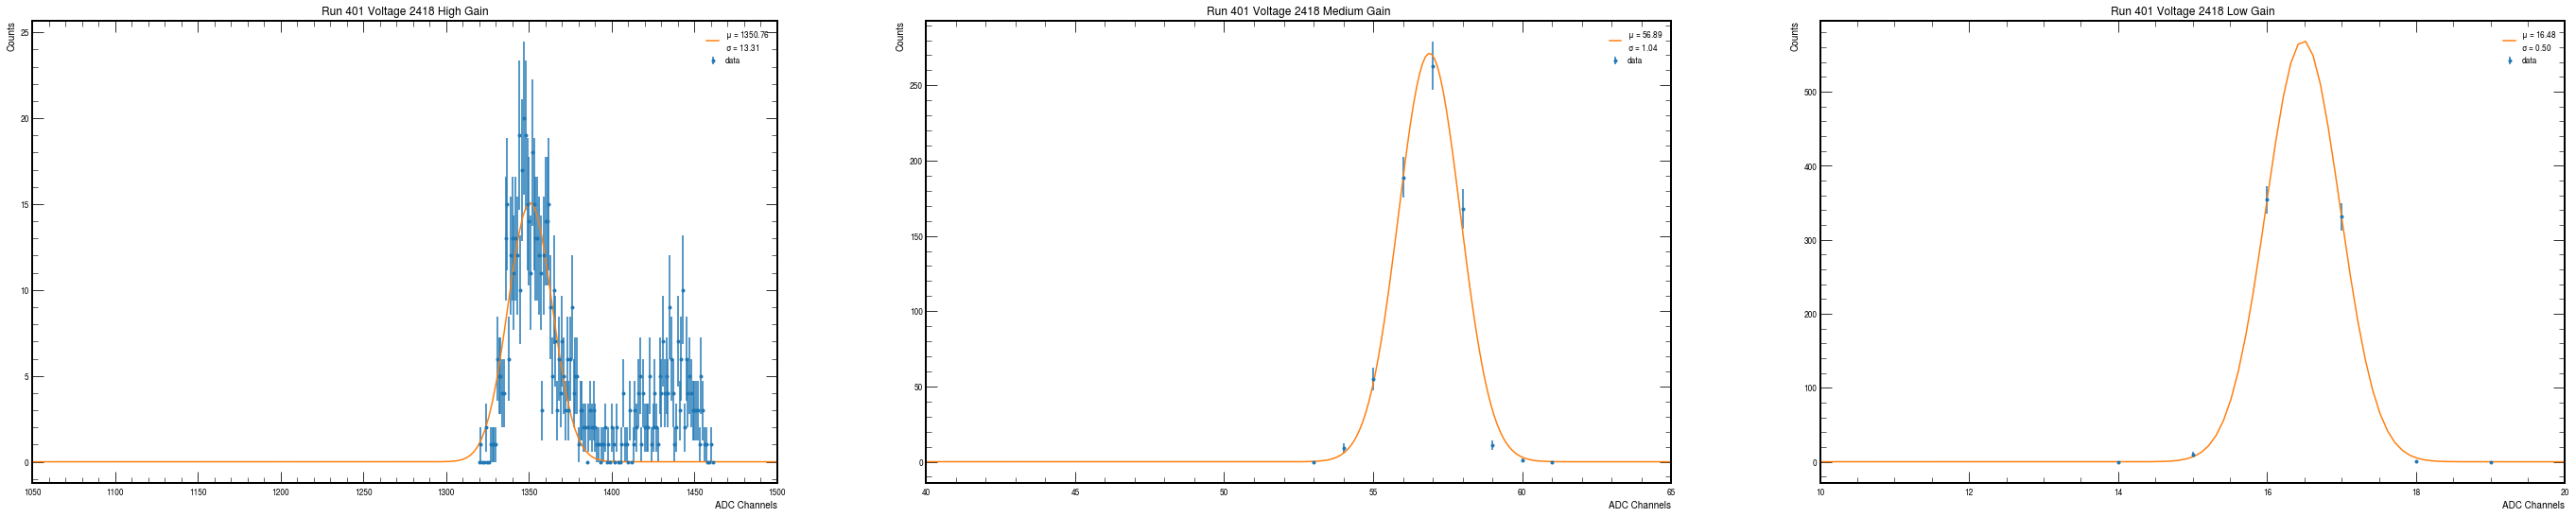

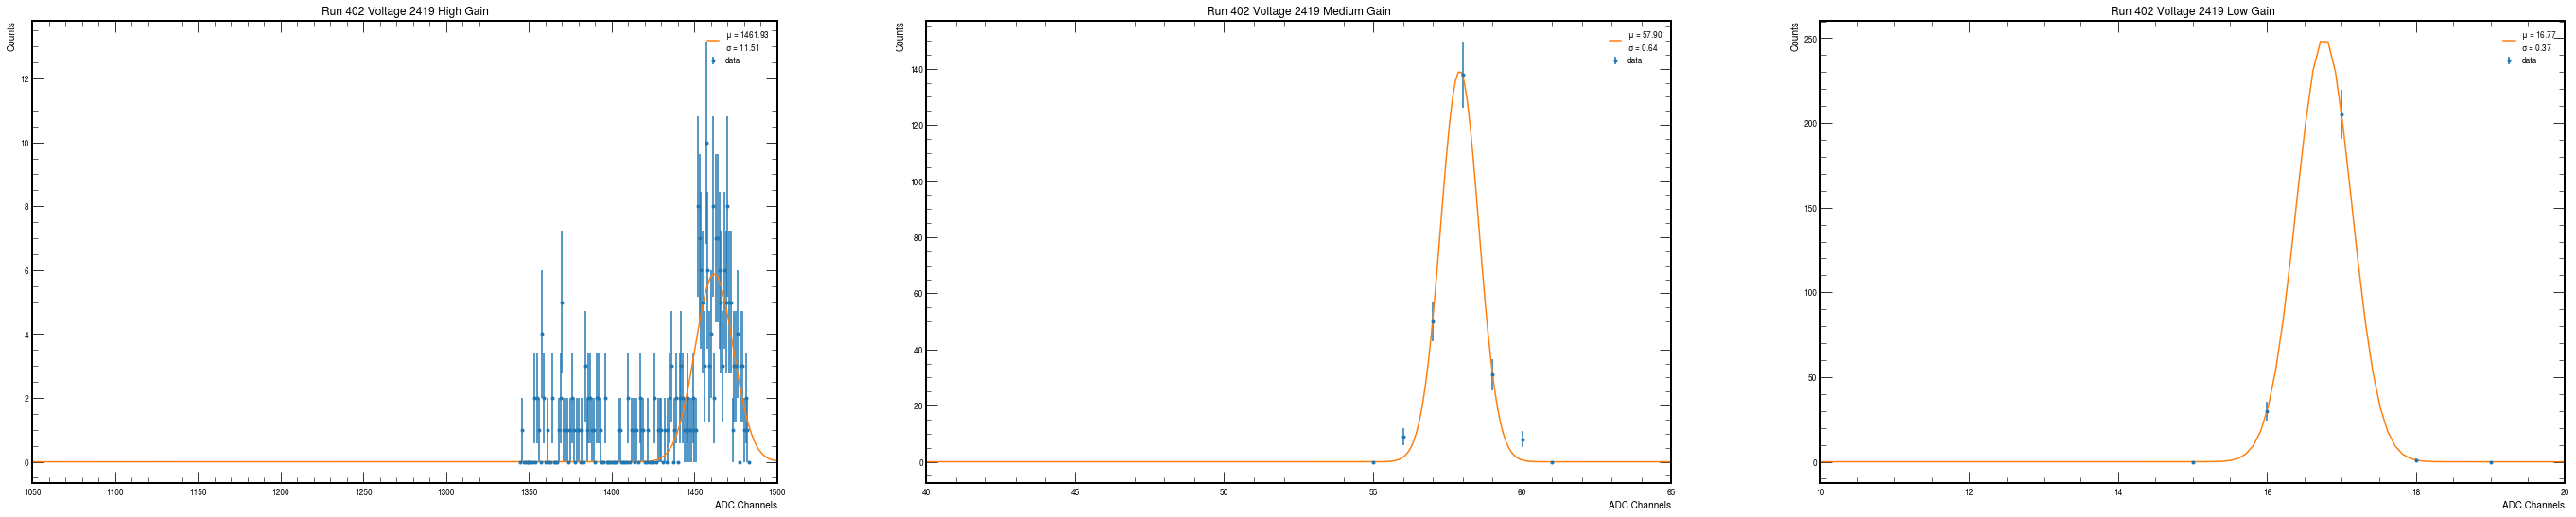

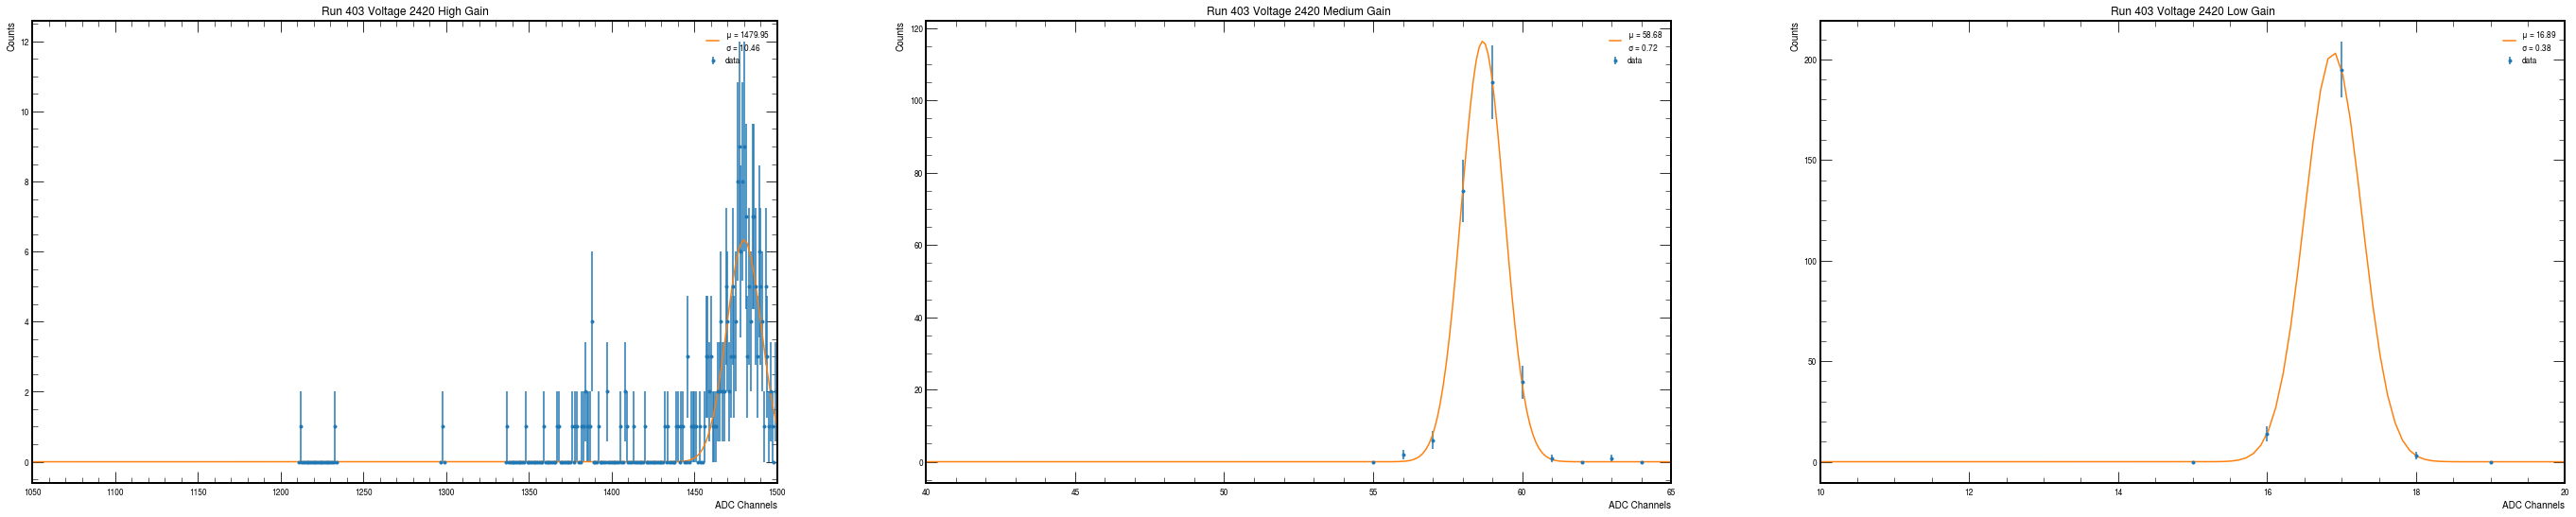

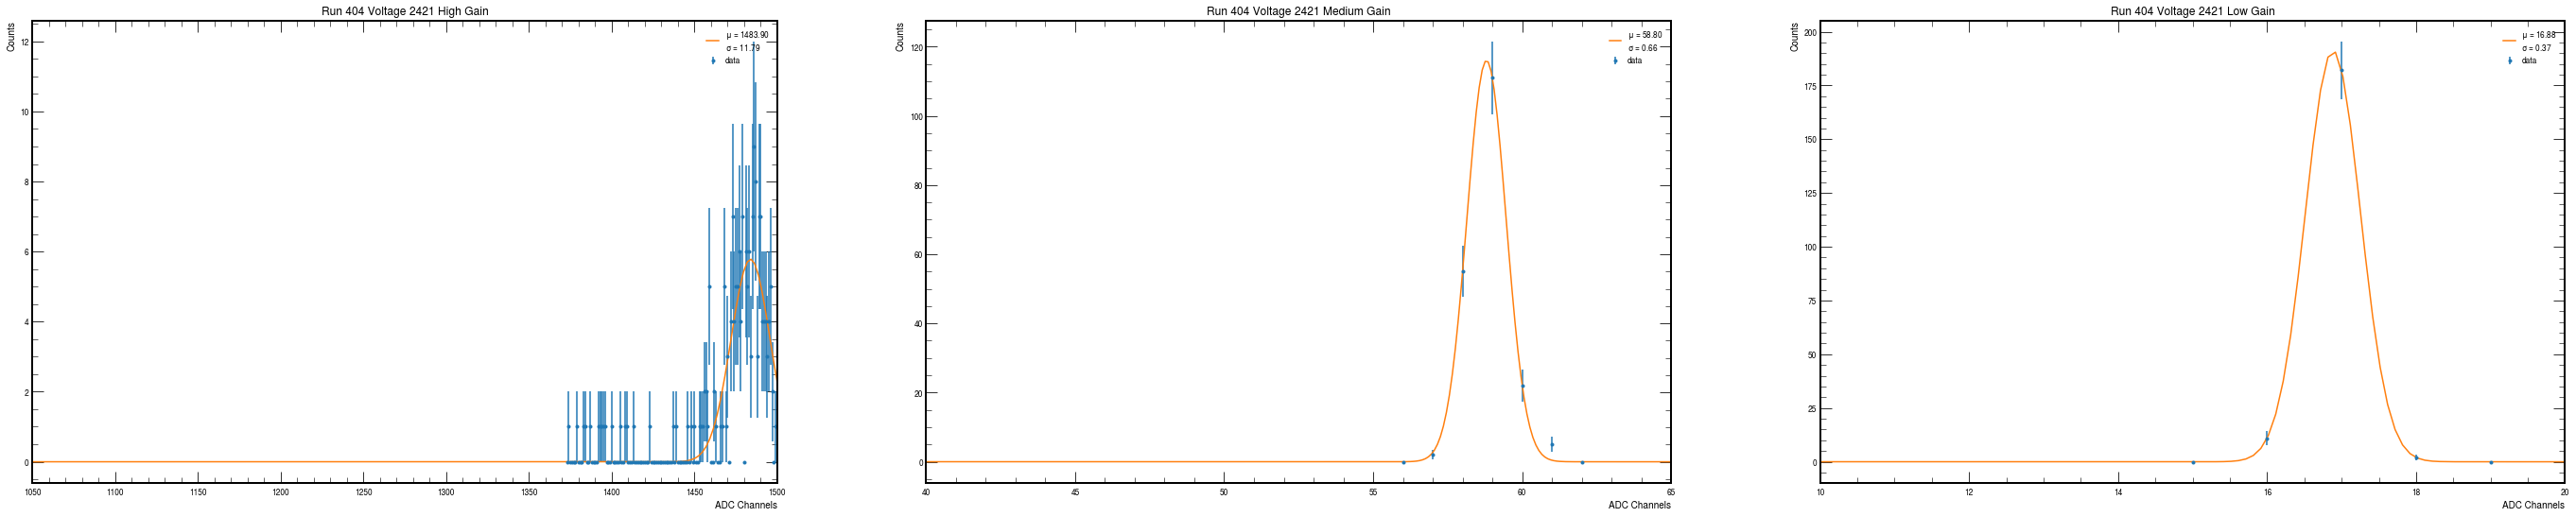

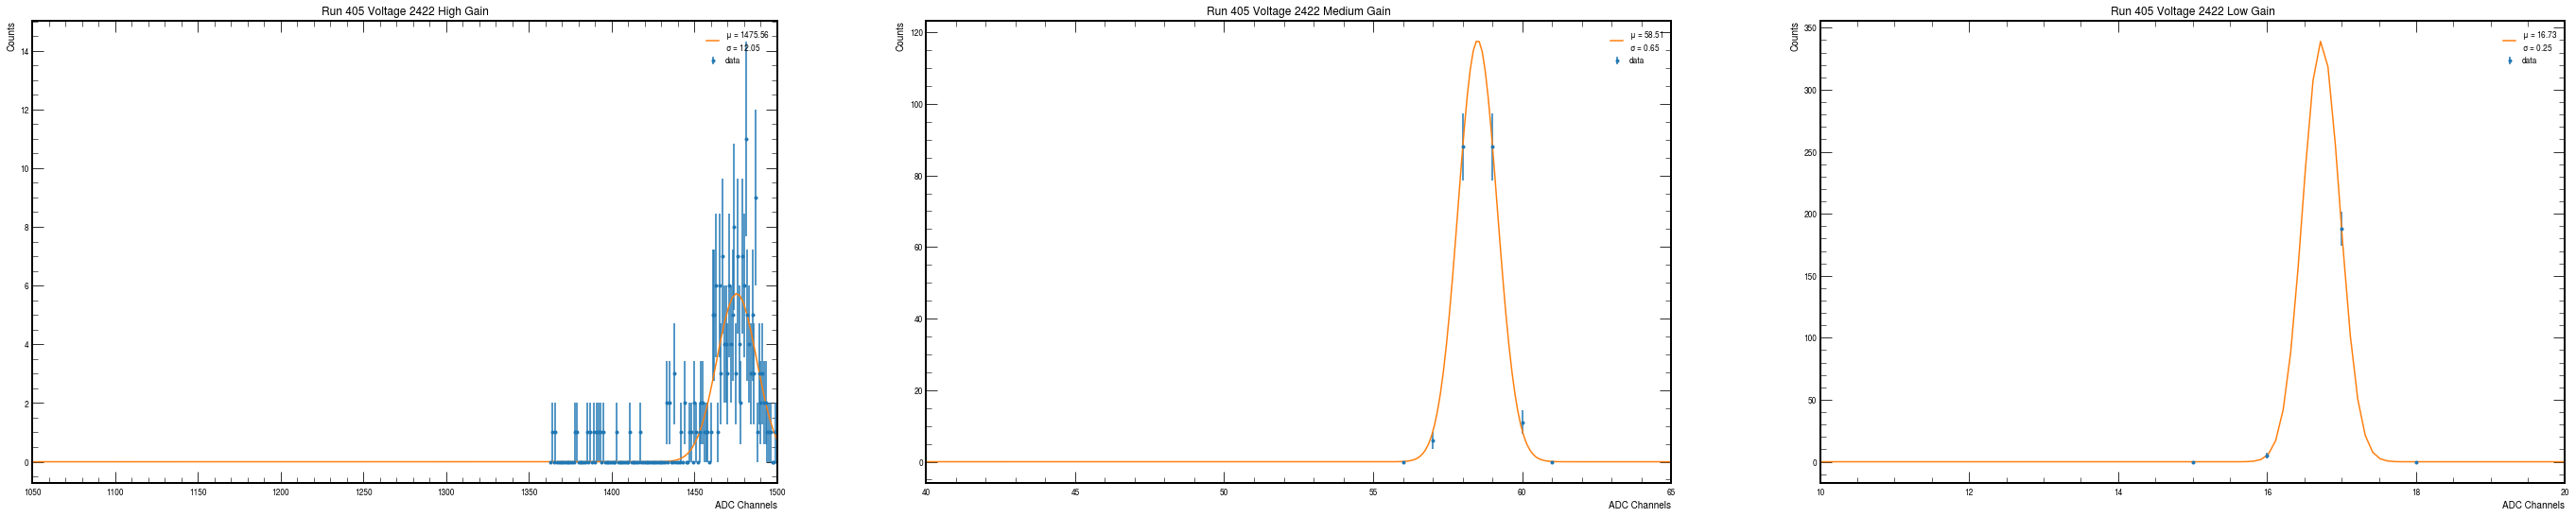

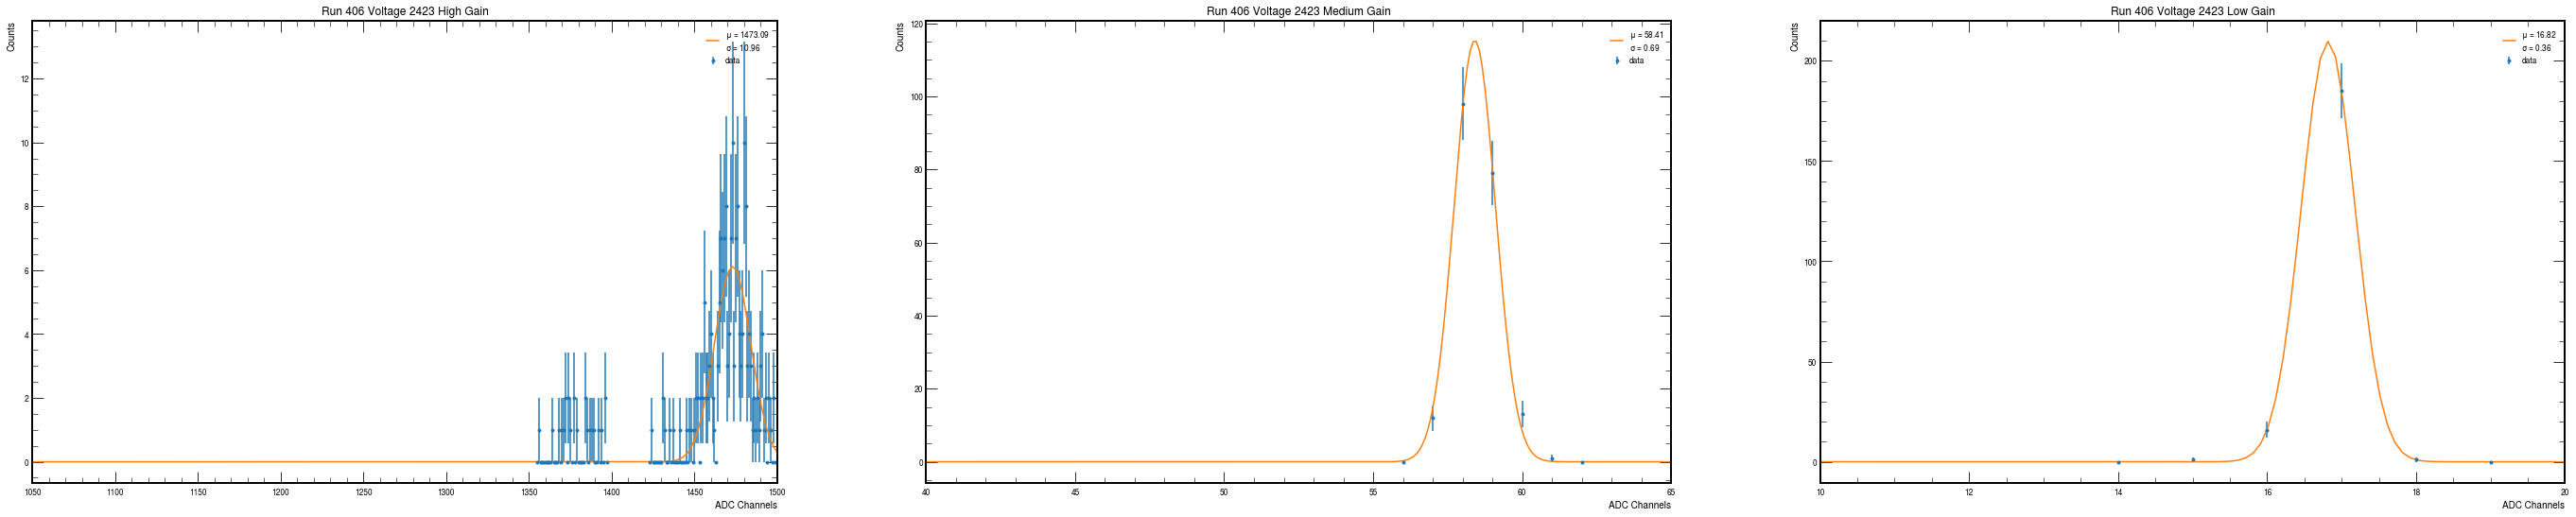

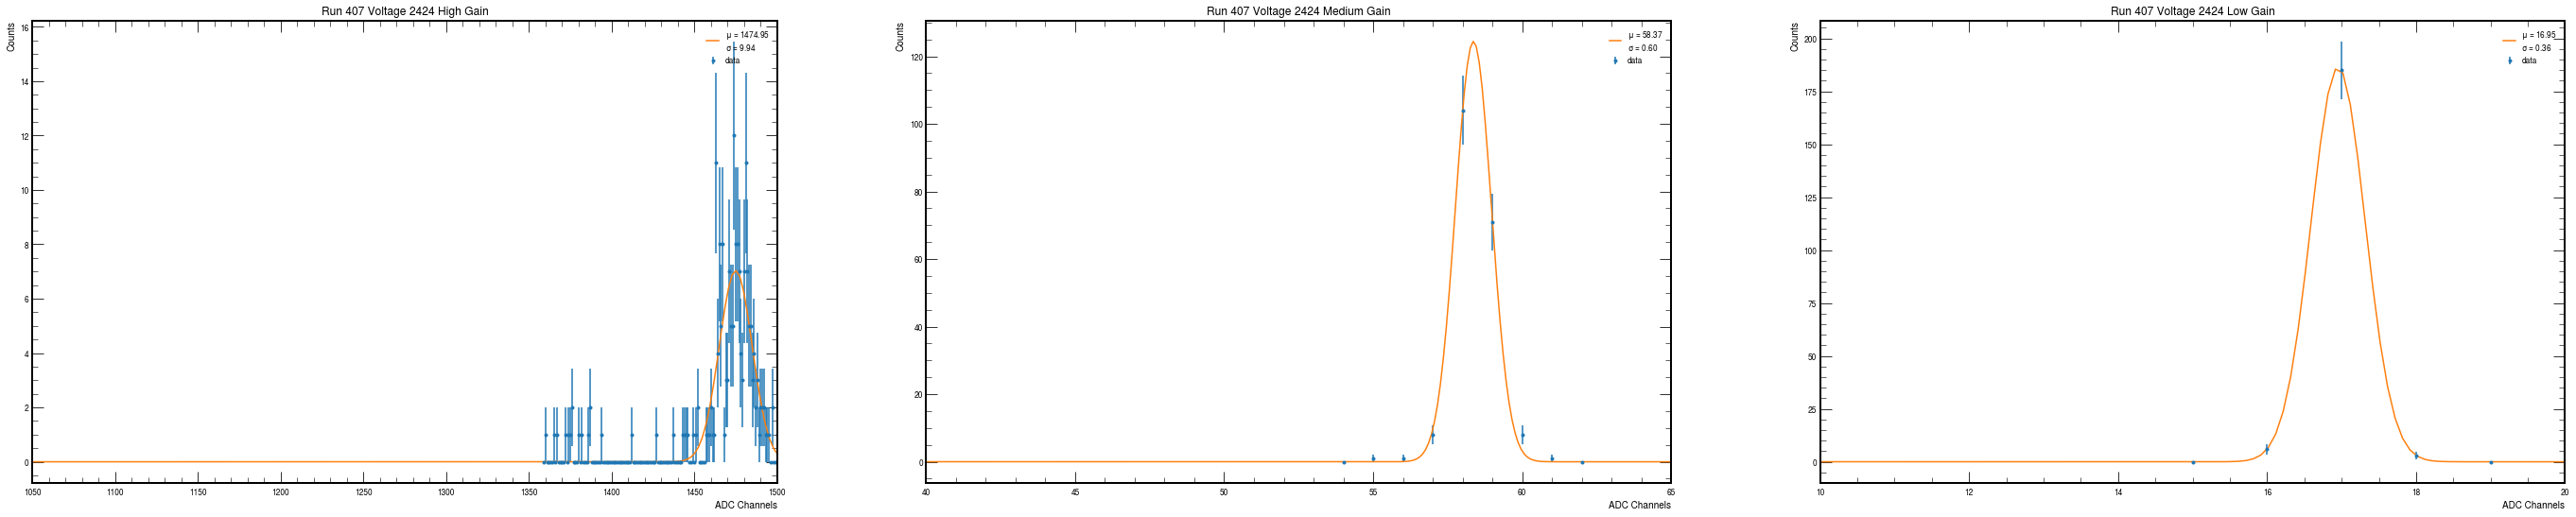

In [6]:
runnum = np.arange(358,407+1,1)
threshold = [1500]
voltage = np.arange(2375,2425,1)
gain = ["High", "Medium", "Low"]

din = {}
din["Count"] = np.array([])
for i in range(3):
    din[gain[i]] = np.array([])
    din[gain[i]+" Sigma"] = np.array([])

for j in range(len(runnum)):
    hist_x = {}
    hist_y = {}
    for elem in gain:
        hist_x[f"{elem}"] = np.array([])
        hist_y[f"{elem}"] = np.array([])

    for i in range(3):
        with open(f"Condor Data/run_0000{runnum[j]}/run_0000{runnum[j]}_adc{i}_hist.dat") as f:
            for line in f:
                line = line.partition('#')[0].split(' ')
                if(len(line)>1):
                    hist_x[gain[i]] = np.append(hist_x[gain[i]],float(line[0]))
                    hist_y[gain[i]] = np.append(hist_y[gain[i]],float(line[1]))
    din["Count"] = np.append(din["Count"],float(np.sum(hist_y[gain[0]])))
    fig, axs = plt.subplots(1,3,figsize=(48,9))
    for i in range(3):
        plt.sca(axs[i])
        plt.title(f"Run {runnum[j]} Voltage {voltage[j]} {gain[i]} Gain")
        plt.errorbar(hist_x[gain[i]],hist_y[gain[i]],yerr=np.sqrt(hist_y[gain[i]]), linestyle='', marker='o', label='data', markersize=3)
        coeff, covar = curve_fit(Gauss,hist_x[gain[i]],hist_y[gain[i]], p0 = (2500,1157+j,27) if i ==0 else ((5000,48+j/4.5,1.2) if i ==1 else (5000,17,0.3)),maxfev=80000)
        x=np.linspace(1050, 1500, 200) if i == 0 else np.linspace(0, 100, 1000)
        plt.plot(x, Gauss(x,*coeff), label=f"$\mu$ = {coeff[1]:.2f}\n$\sigma$ = {abs(coeff[2]):.2f}")
        plt.xlim((1050,1500) if i==0 else ((40,65) if i==1 else (10,20)))
        plt.xlabel("ADC Channels")
        plt.ylabel("Counts")
        plt.legend()
        din[gain[i]] = np.append(din[gain[i]],float(coeff[1]))
        din[gain[i]+" Sigma"] = np.append(din[gain[i]+" Sigma"],float(np.sqrt(covar[1][1])))
    plt.show()
    
df = pd.DataFrame(din)

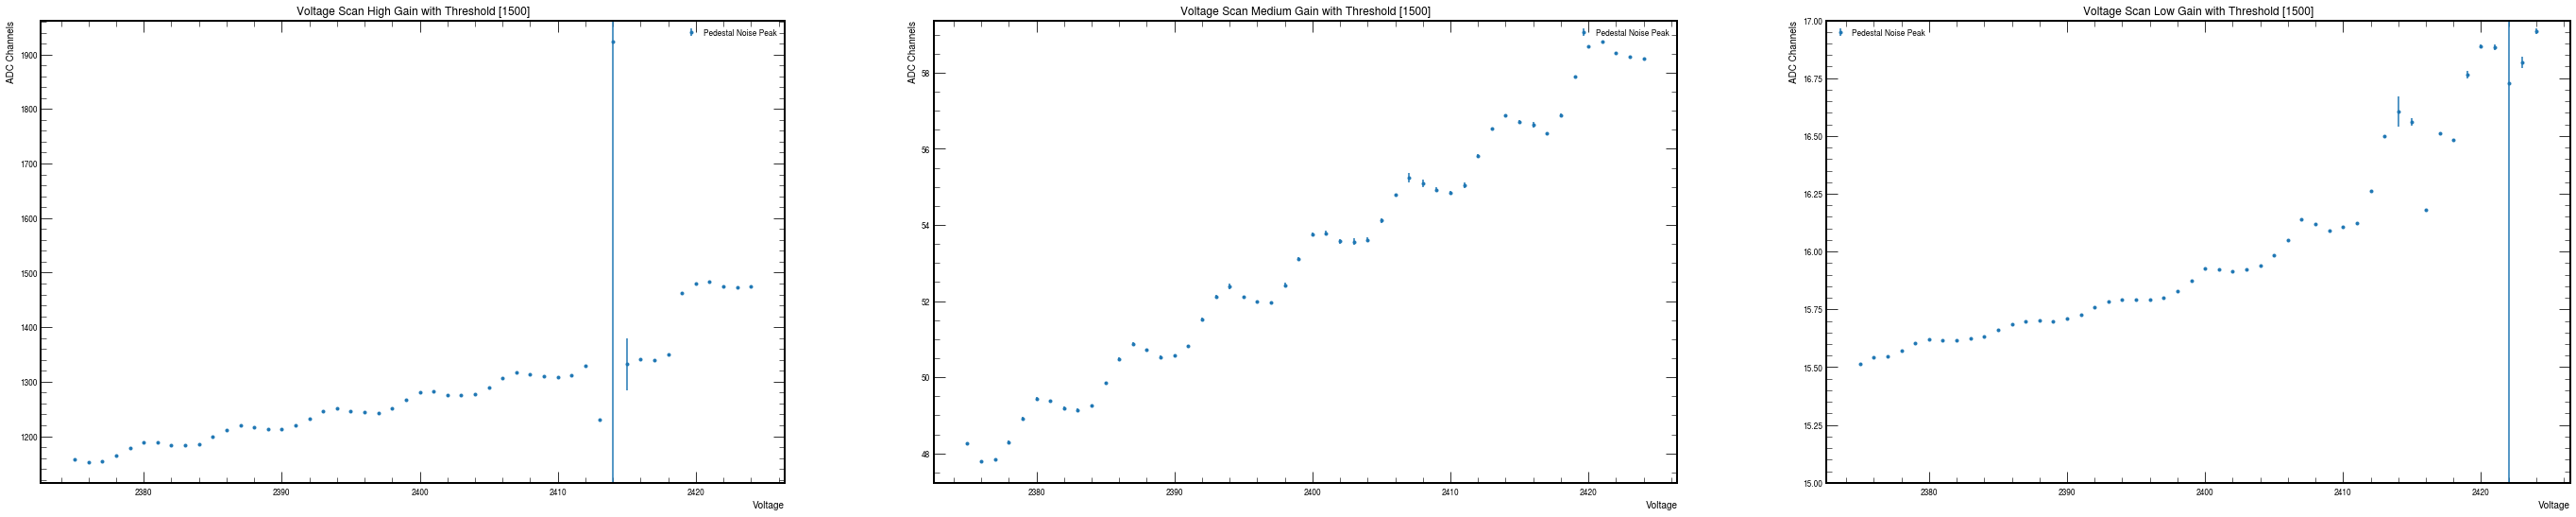

In [7]:
fig, axs = plt.subplots(1,3,figsize=(48,9))
for i in range(3):
    plt.sca(axs[i])
    plt.title(f"Voltage Scan {gain[i]} Gain with Threshold {threshold}")
    plt.errorbar(voltage,df[gain[i]],yerr=din[gain[i]+" Sigma"], linestyle='', marker='o', label='Pedestal Noise Peak', markersize=3)
    plt.ylabel("ADC Channels")
    plt.xlabel("Voltage")
    plt.legend()
    if i == 2:
        plt.ylim(15,17)
plt.show()

Text(0.5, 1.0, 'Rate with Threshold [1500]')

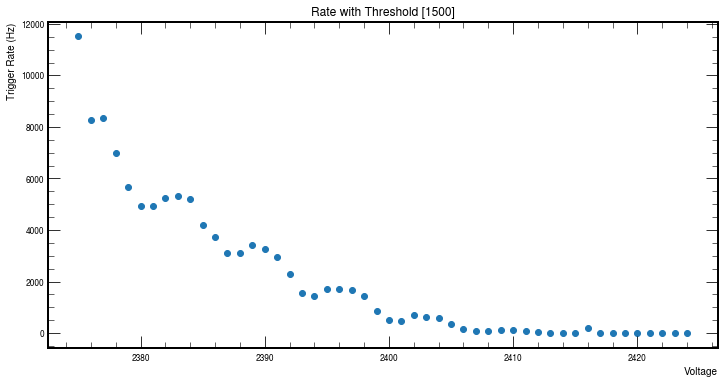

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(voltage,df["Count"]/60)
plt.xlabel("Voltage")
plt.ylabel("Trigger Rate (Hz)")
plt.title(f"Rate with Threshold {threshold}")

### Time Variation

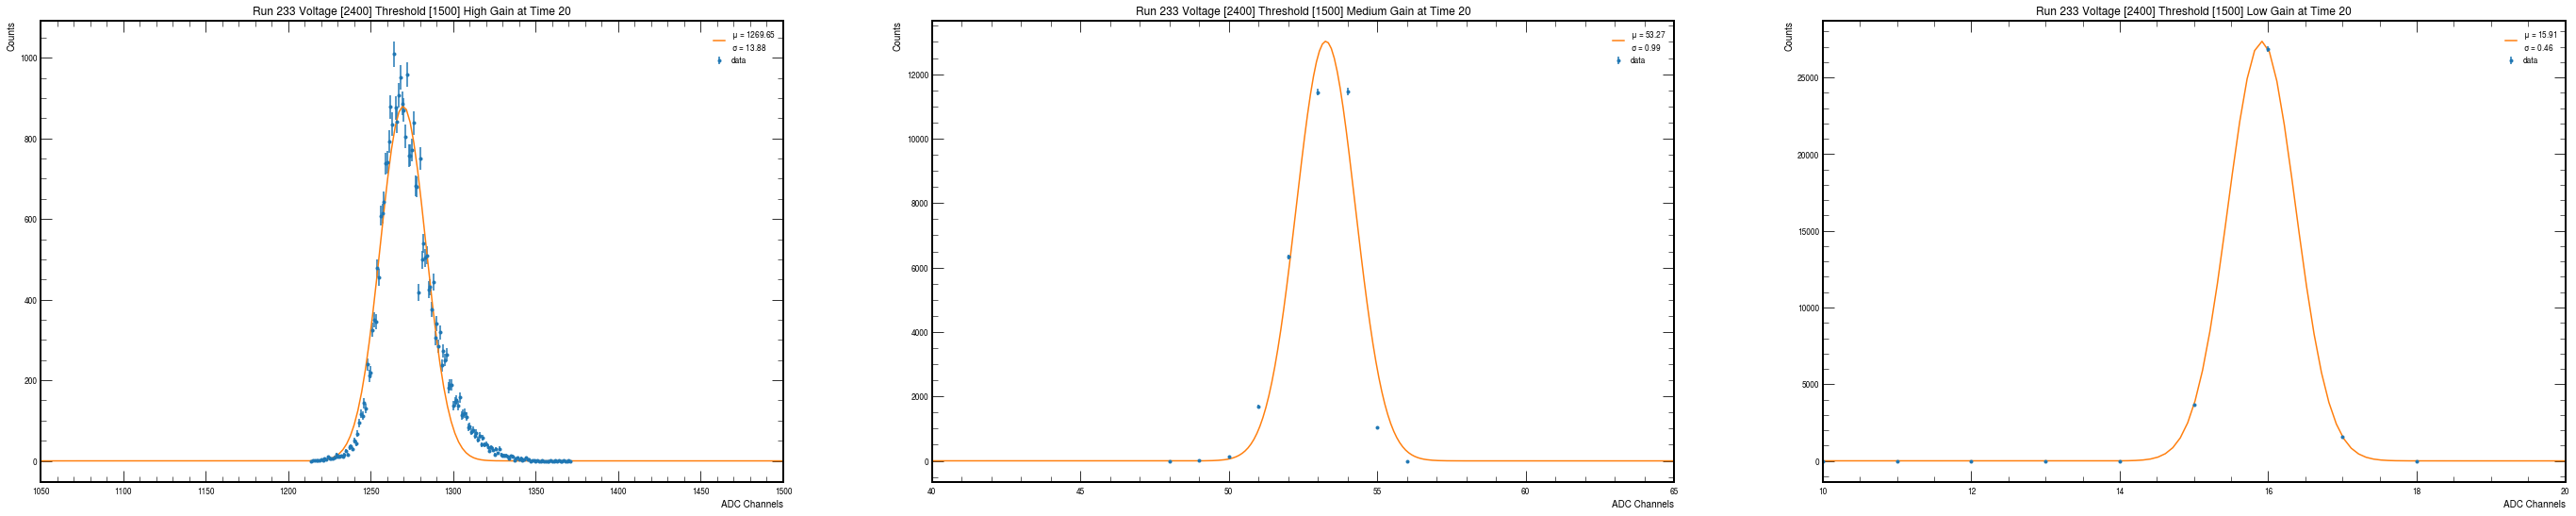

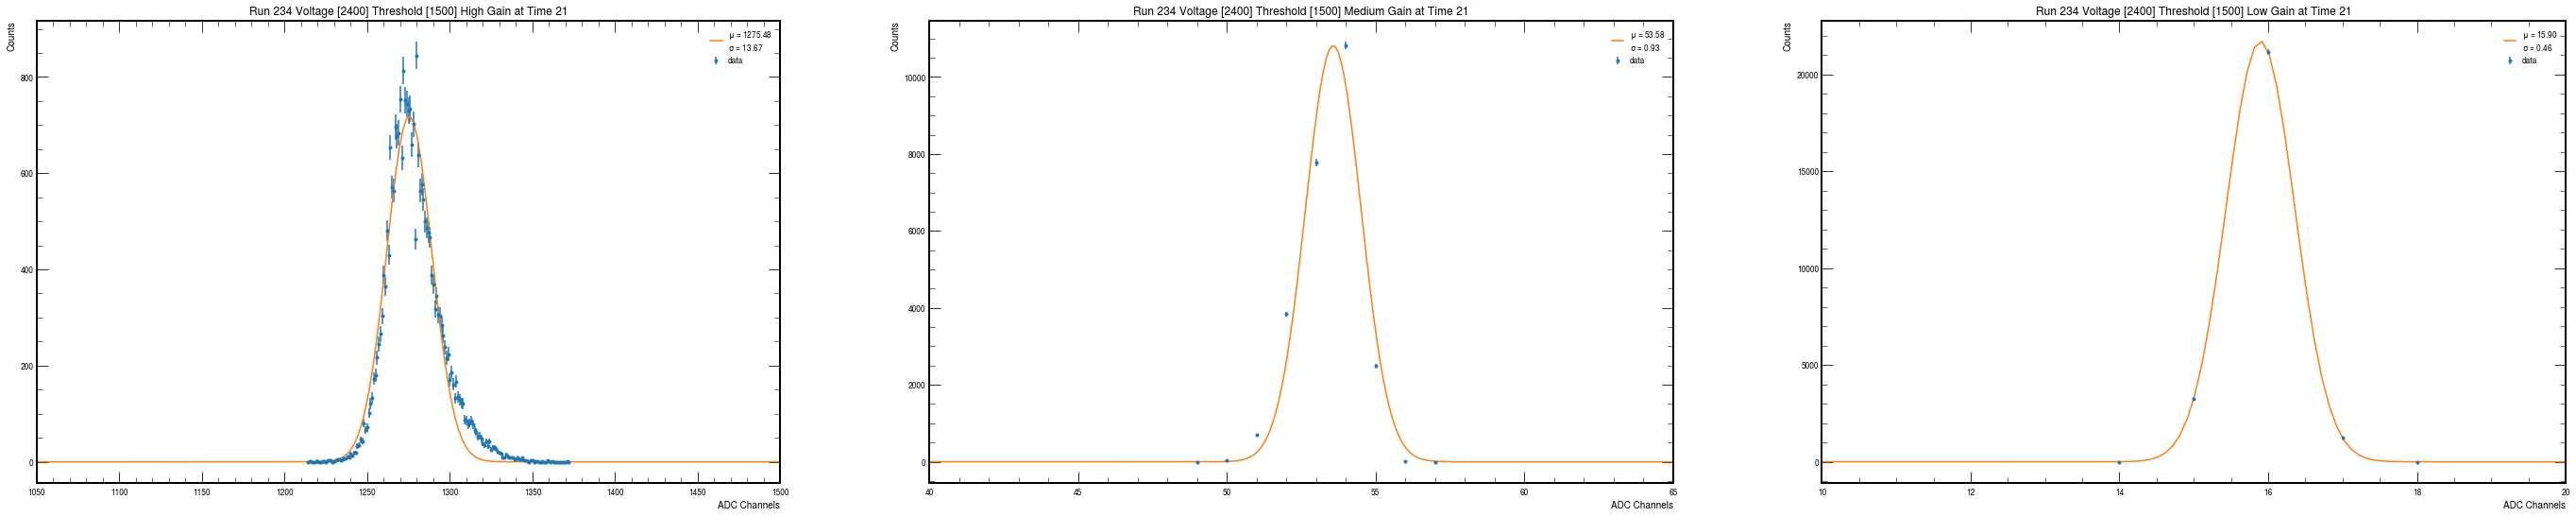

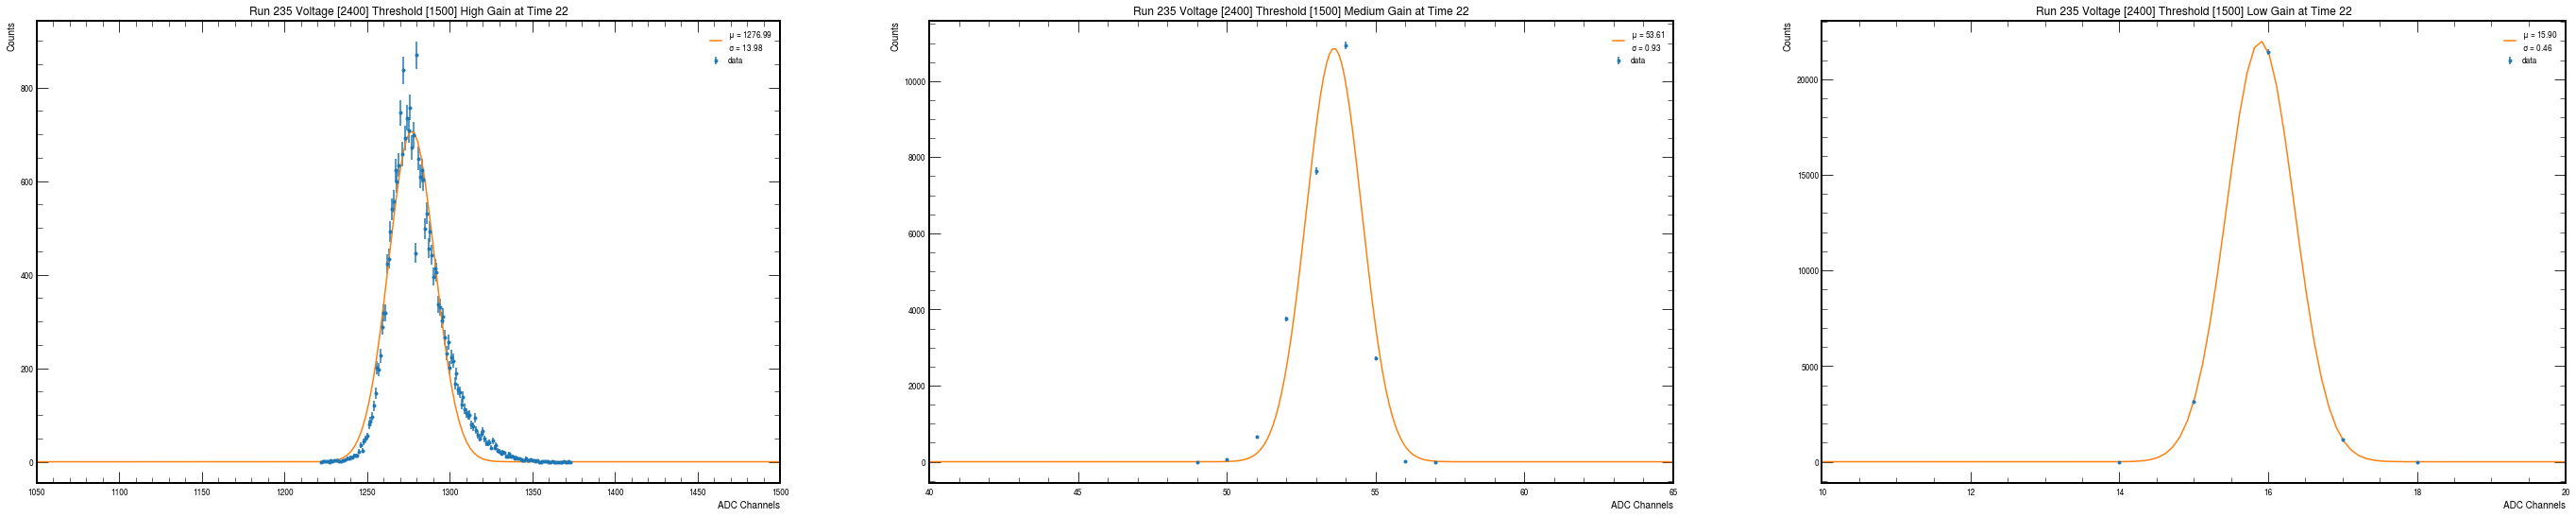

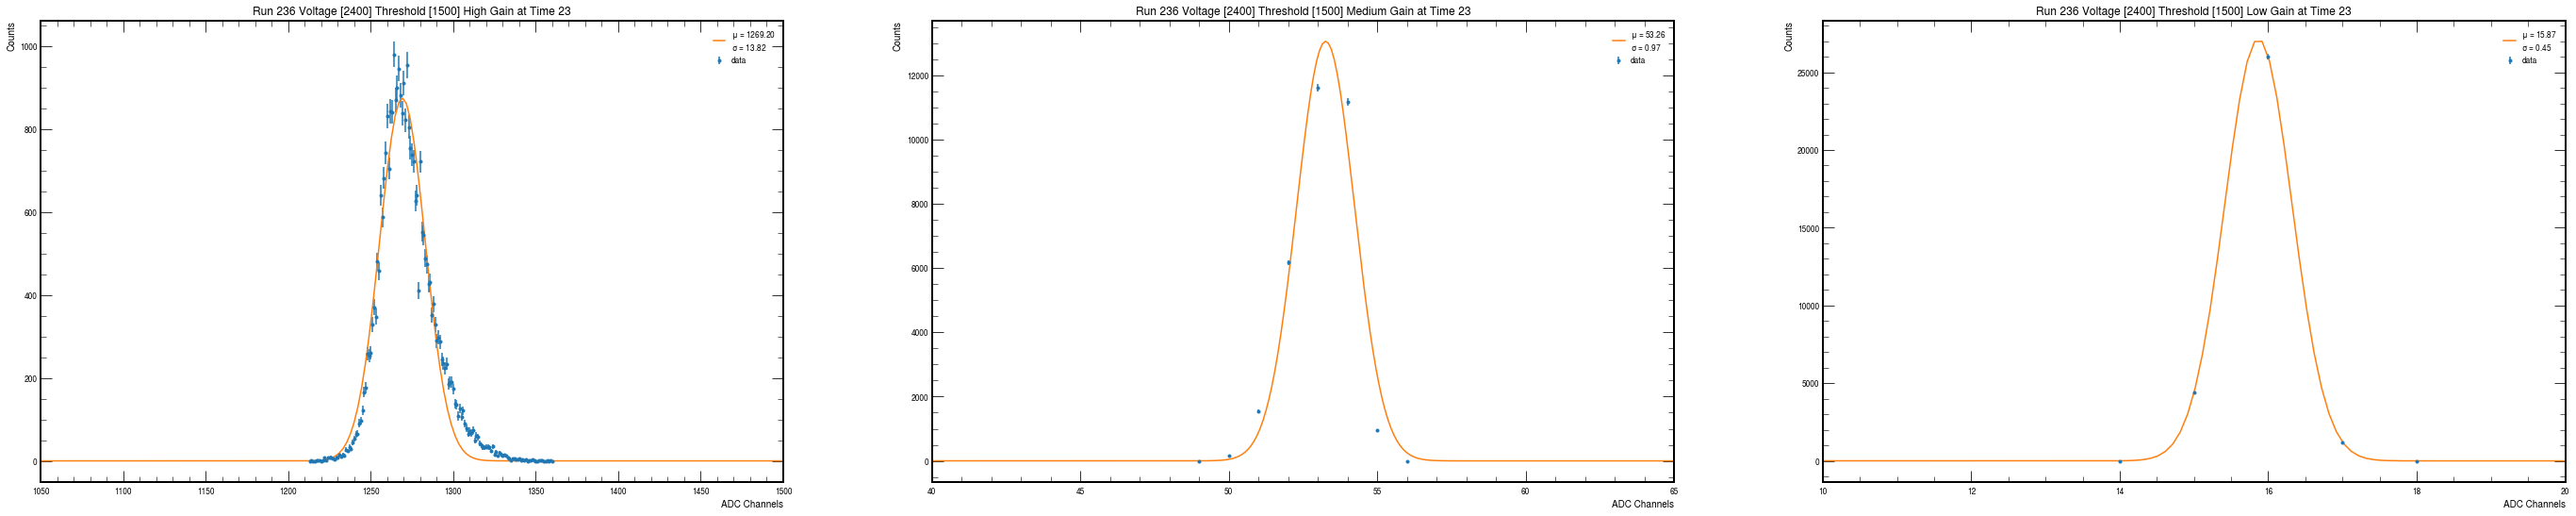

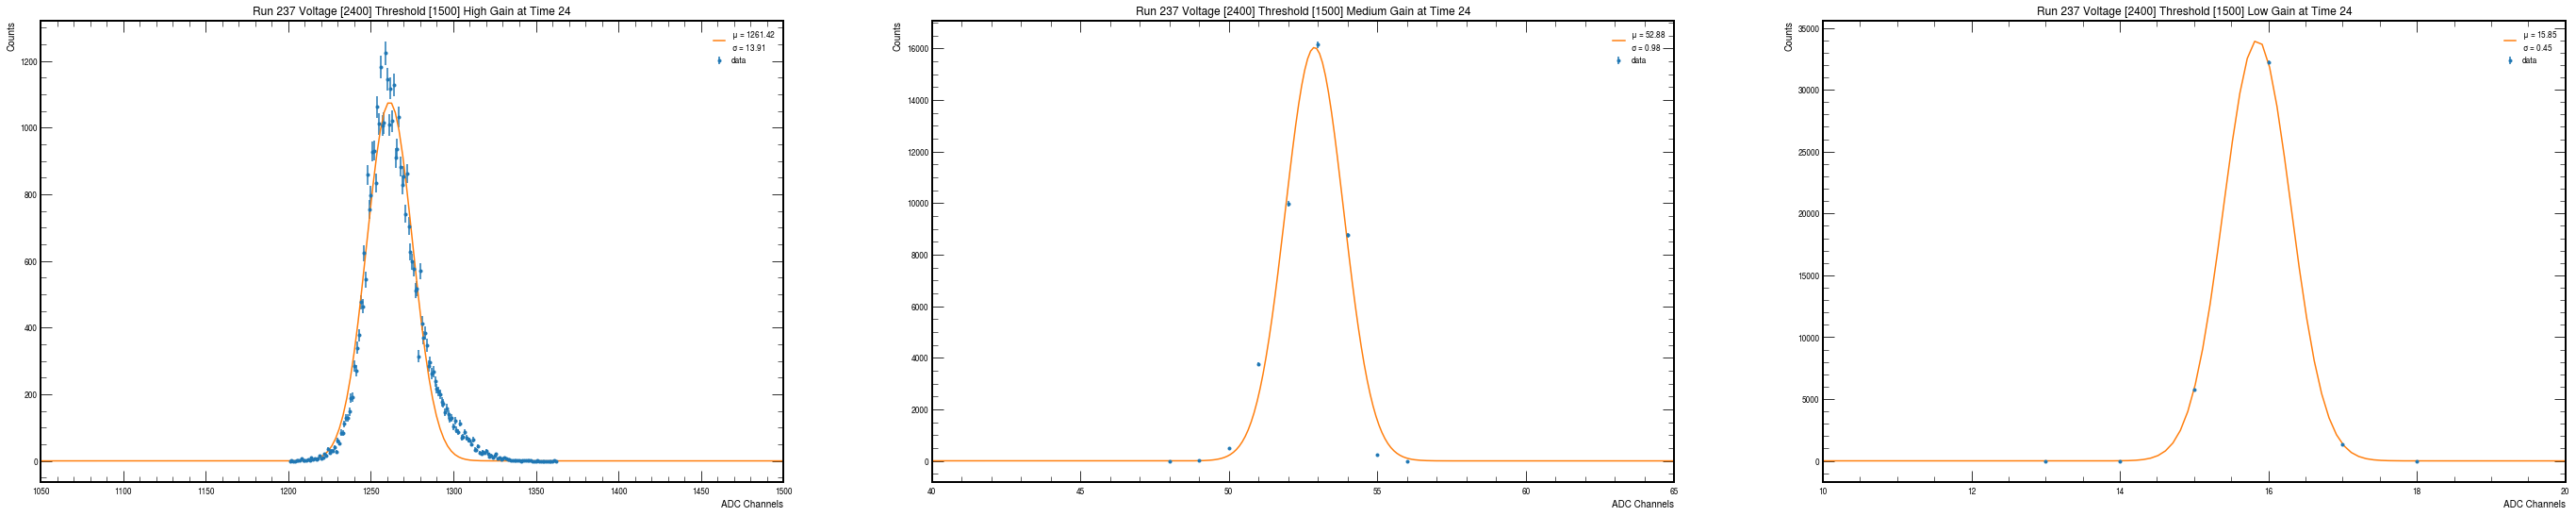

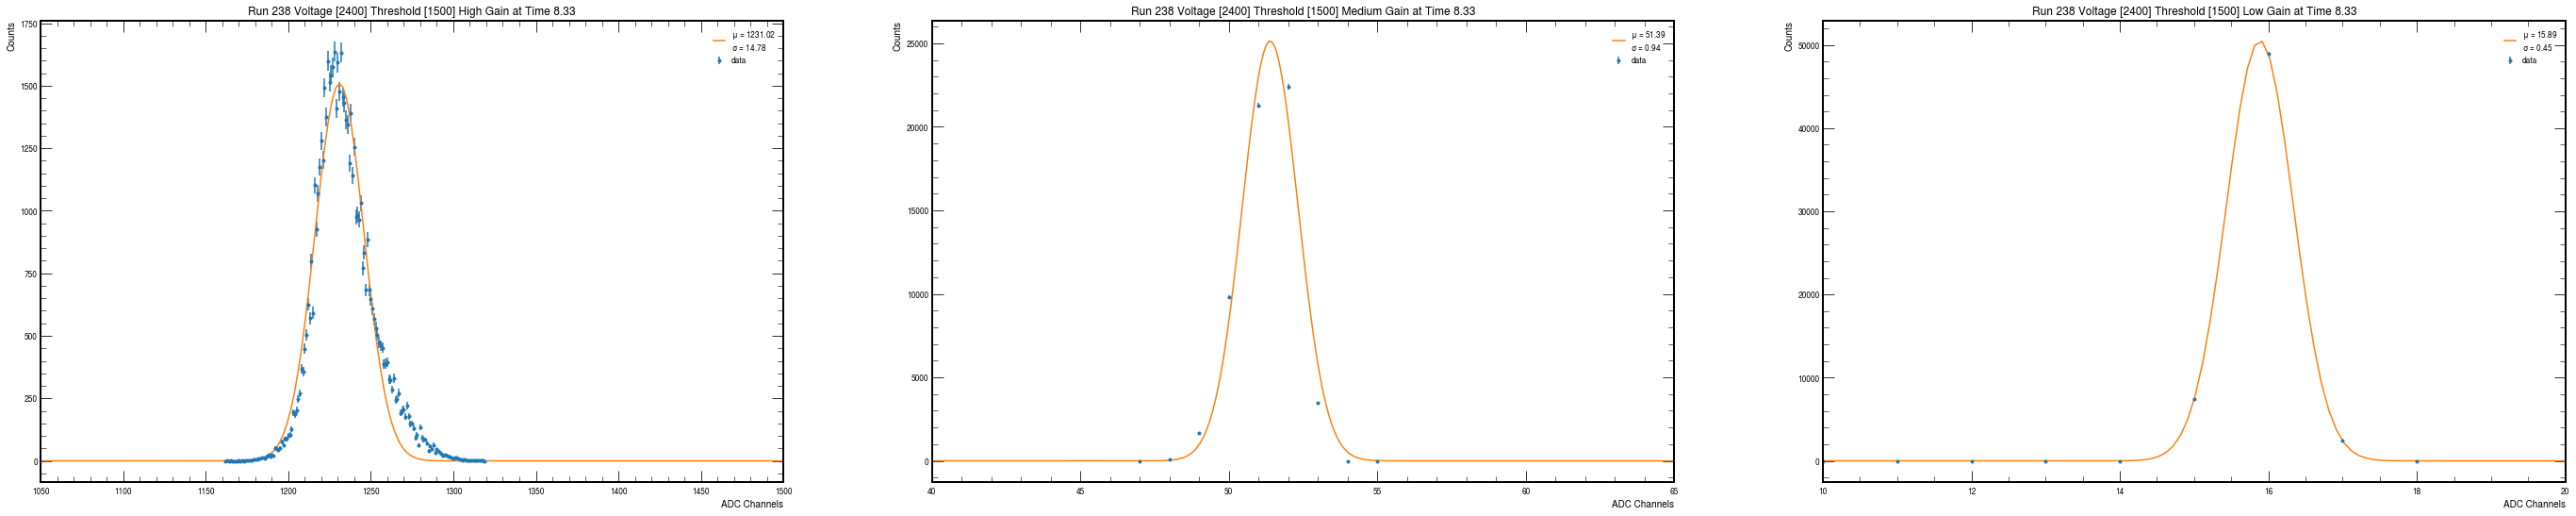

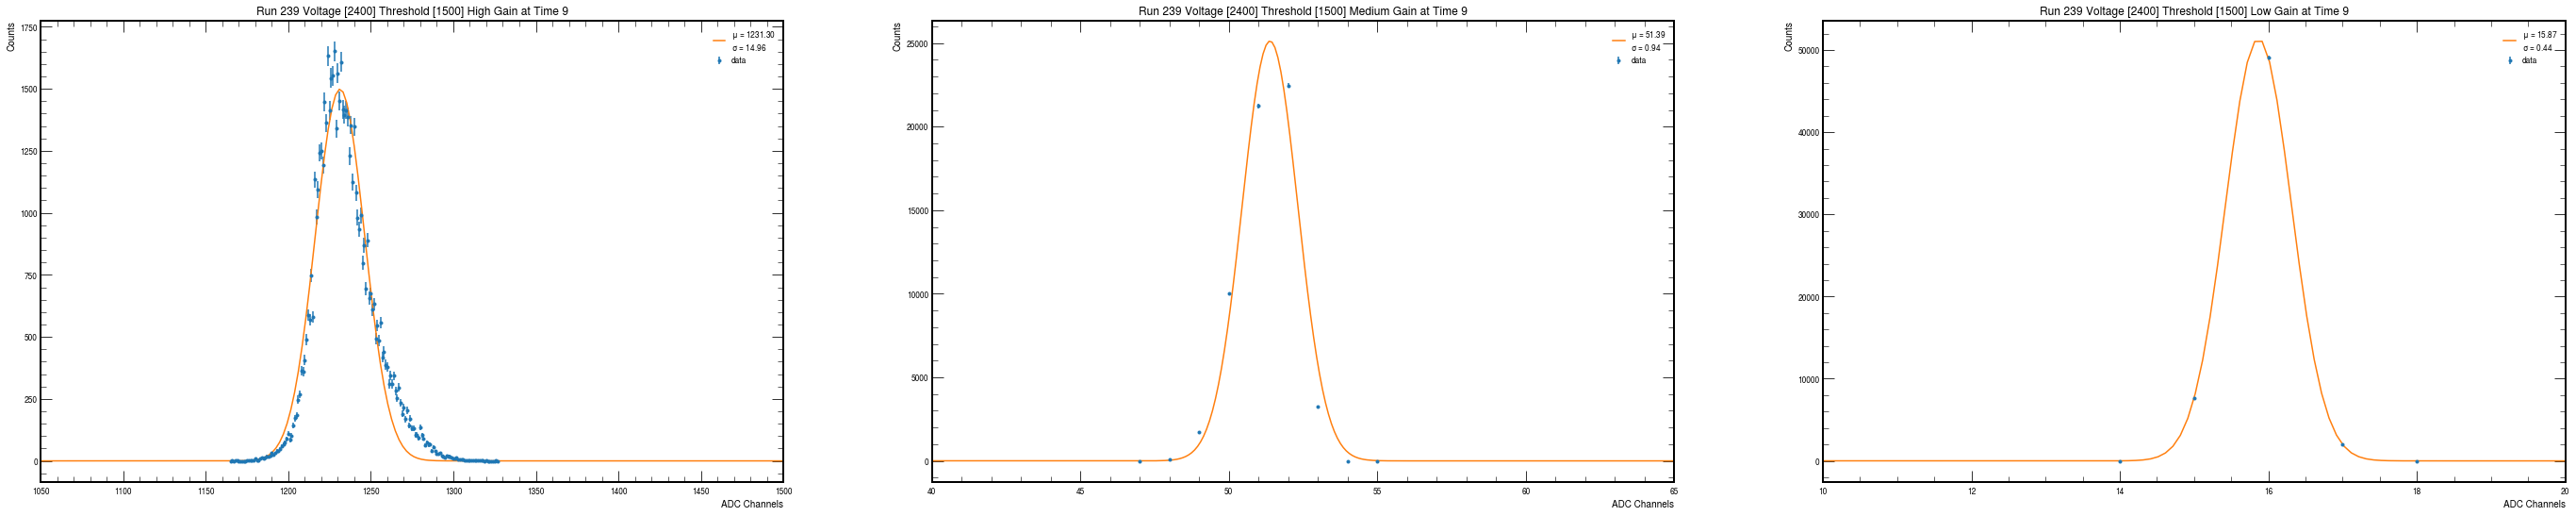

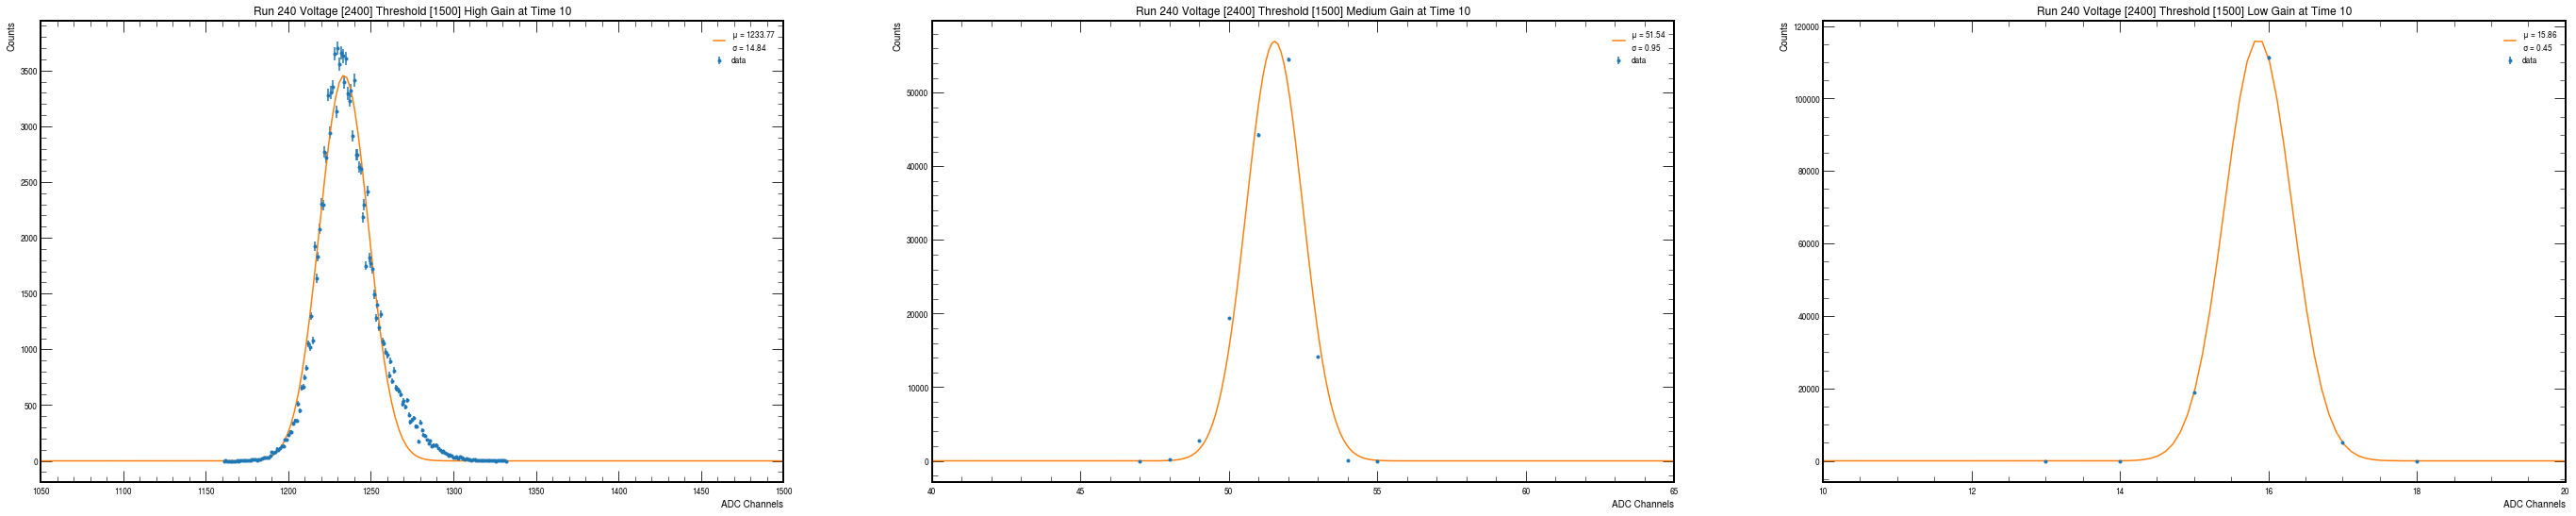

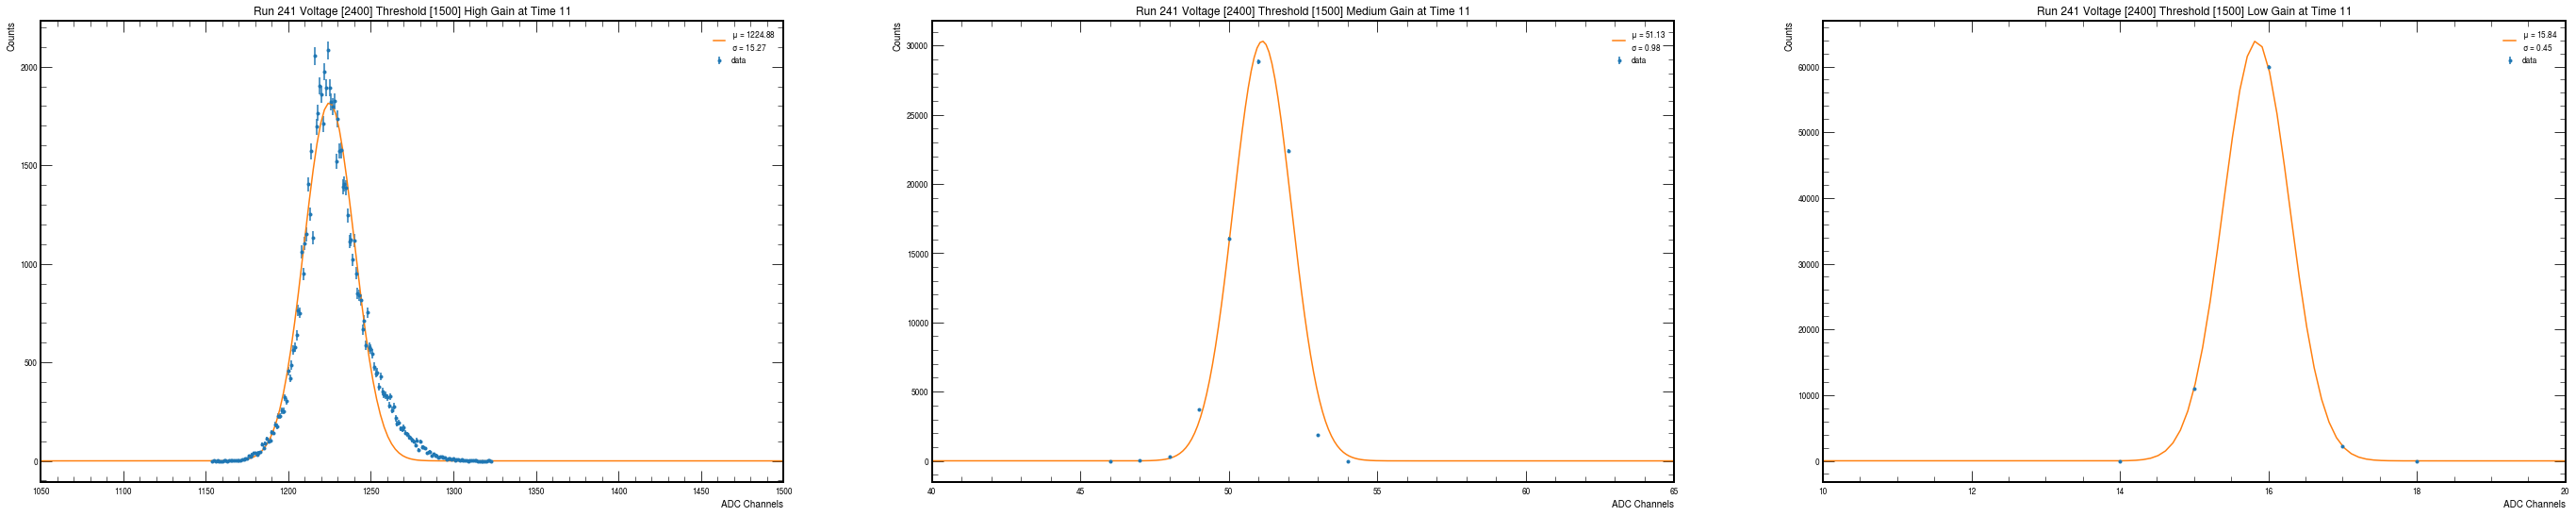

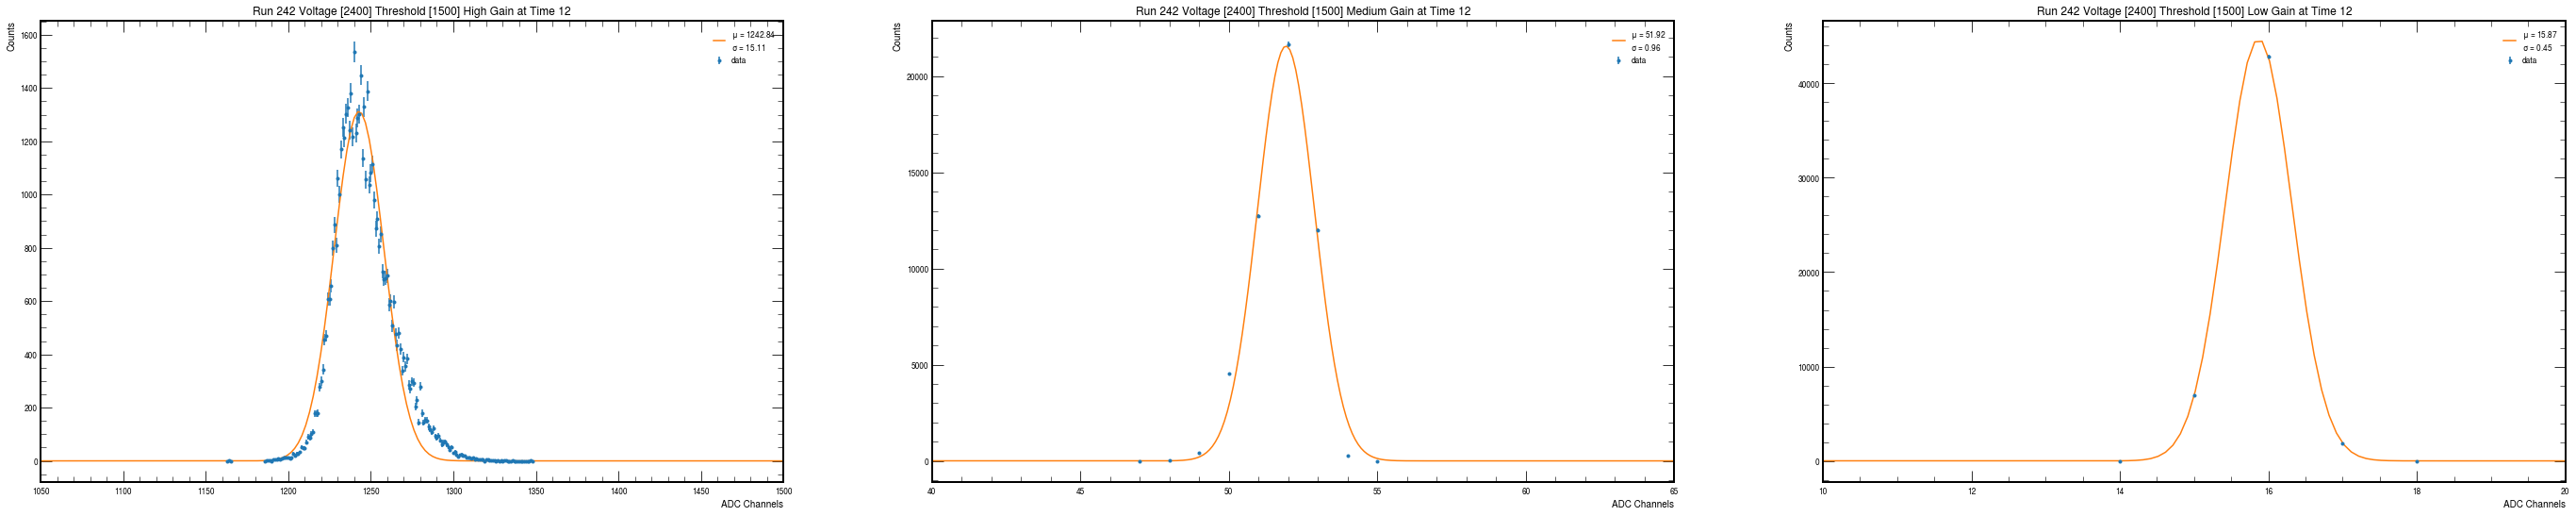

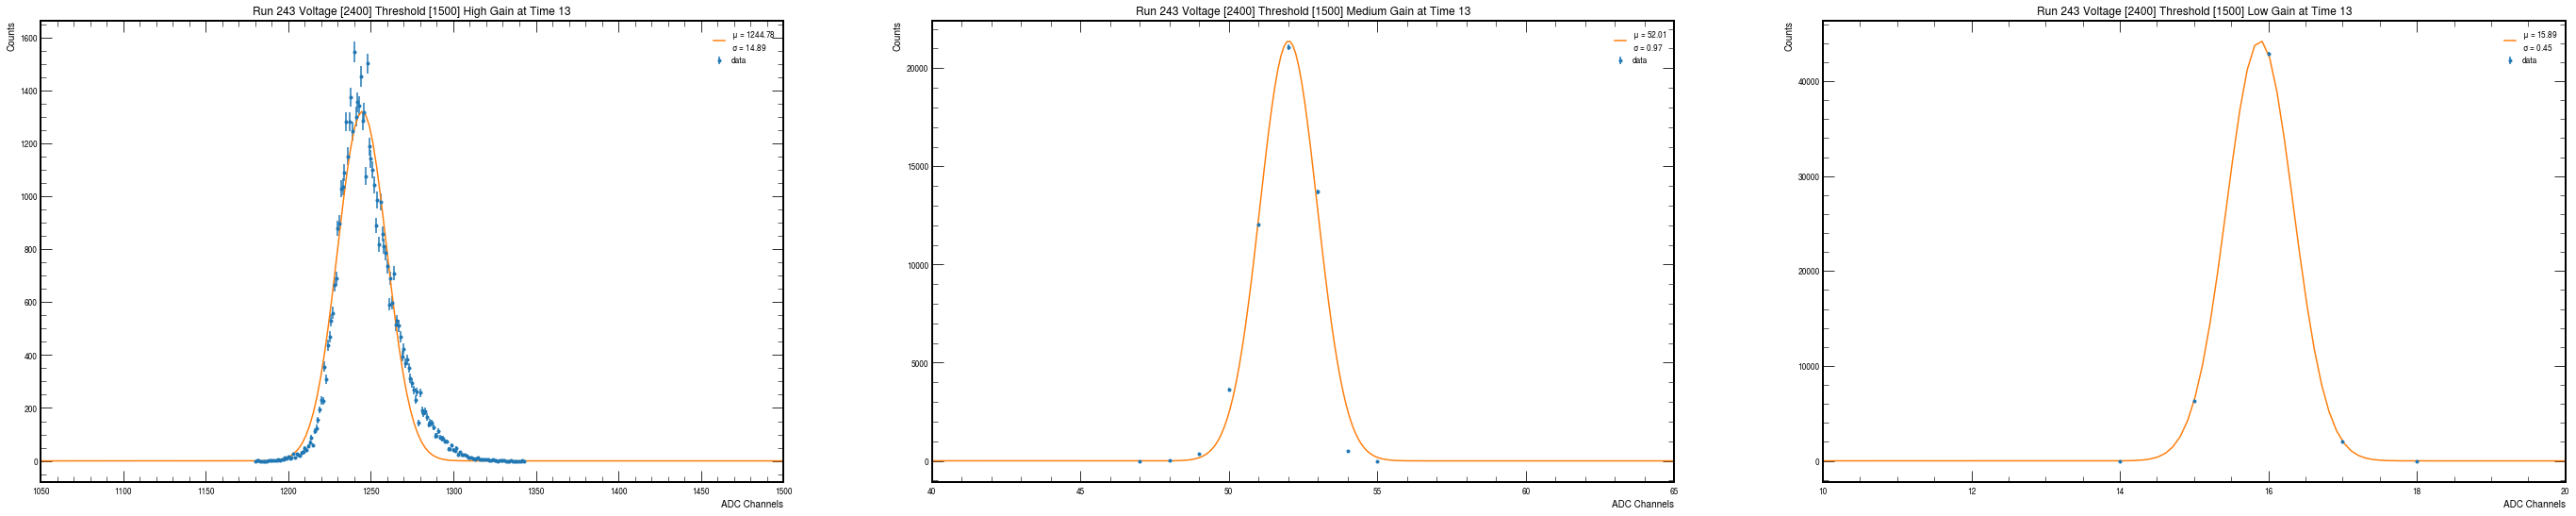

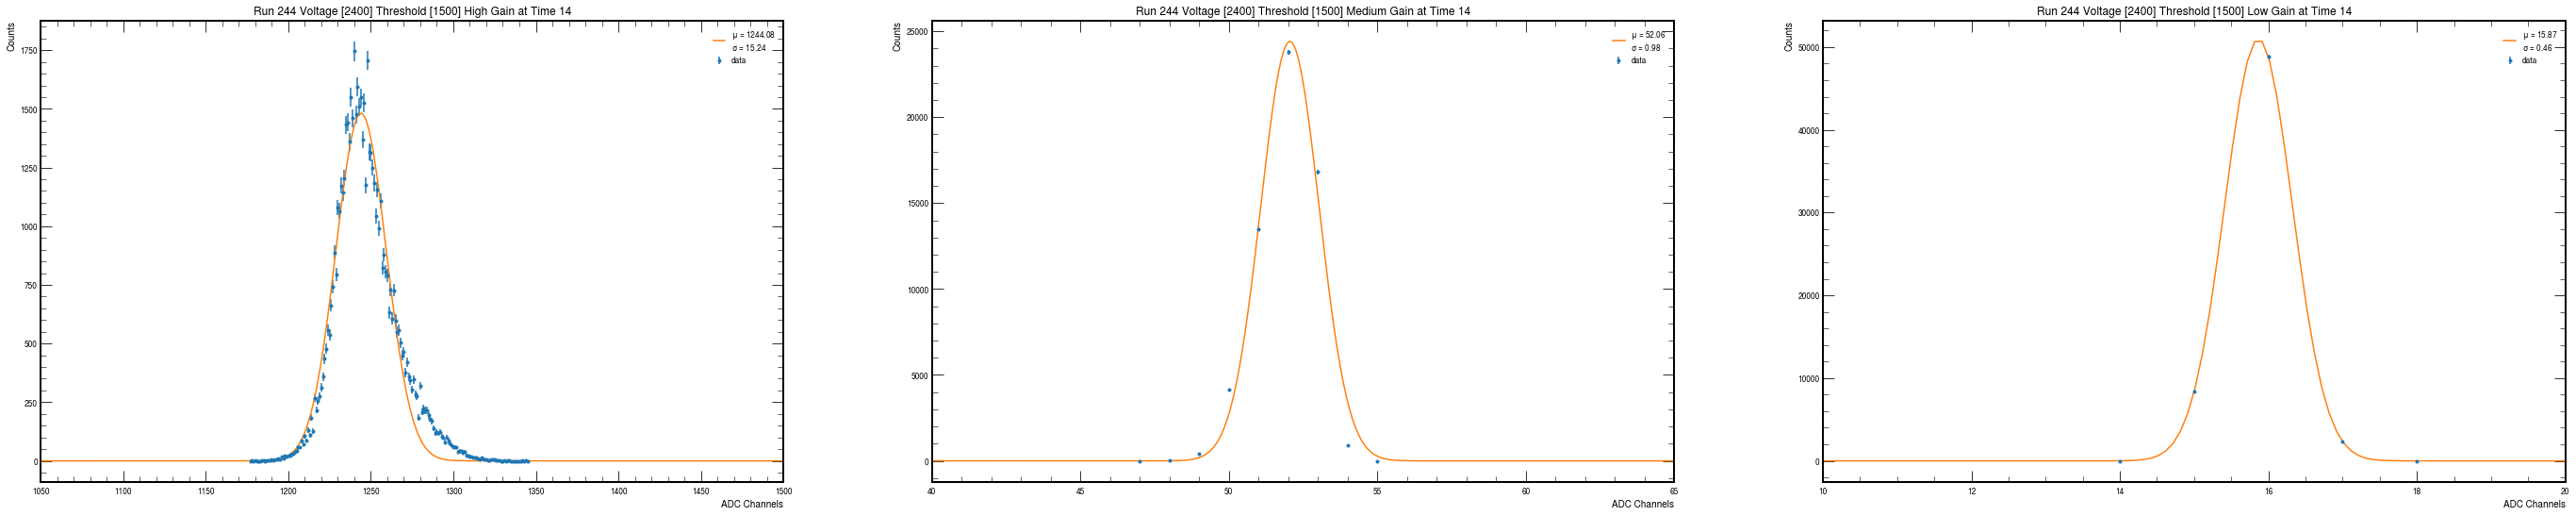

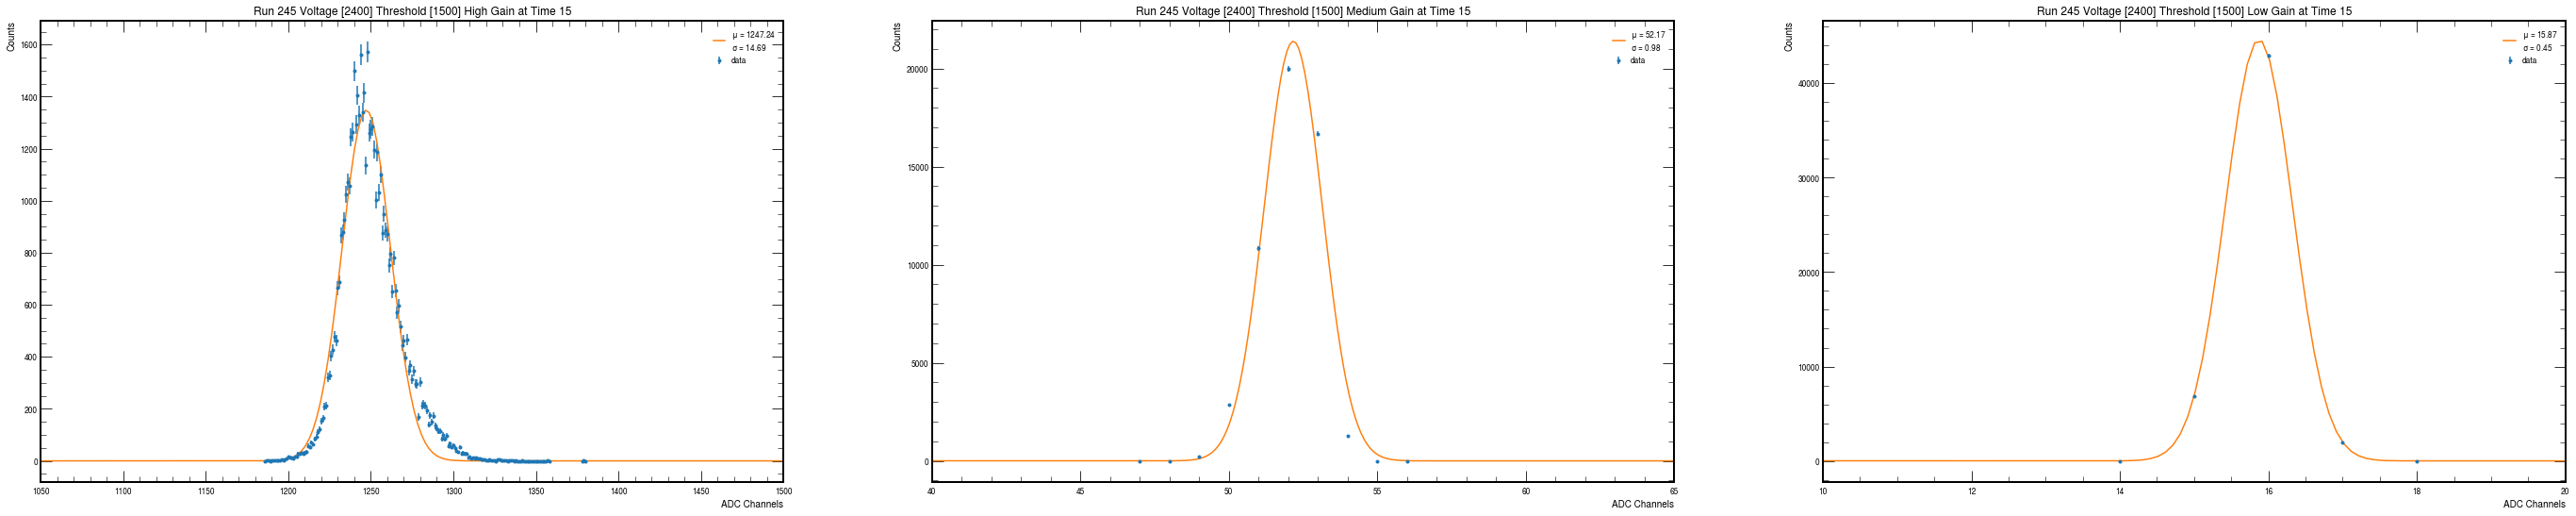

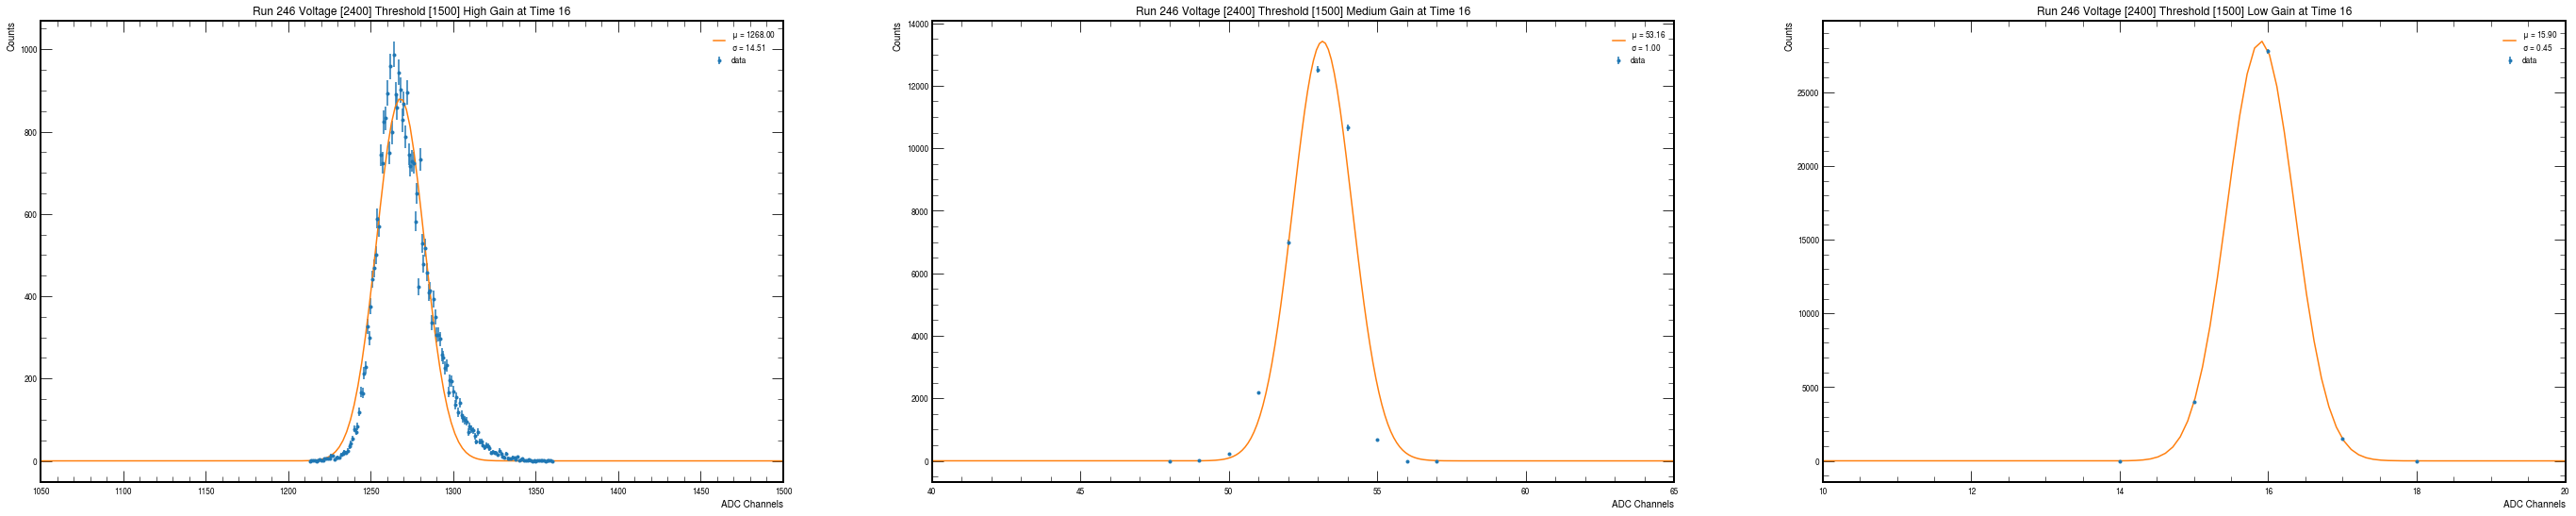

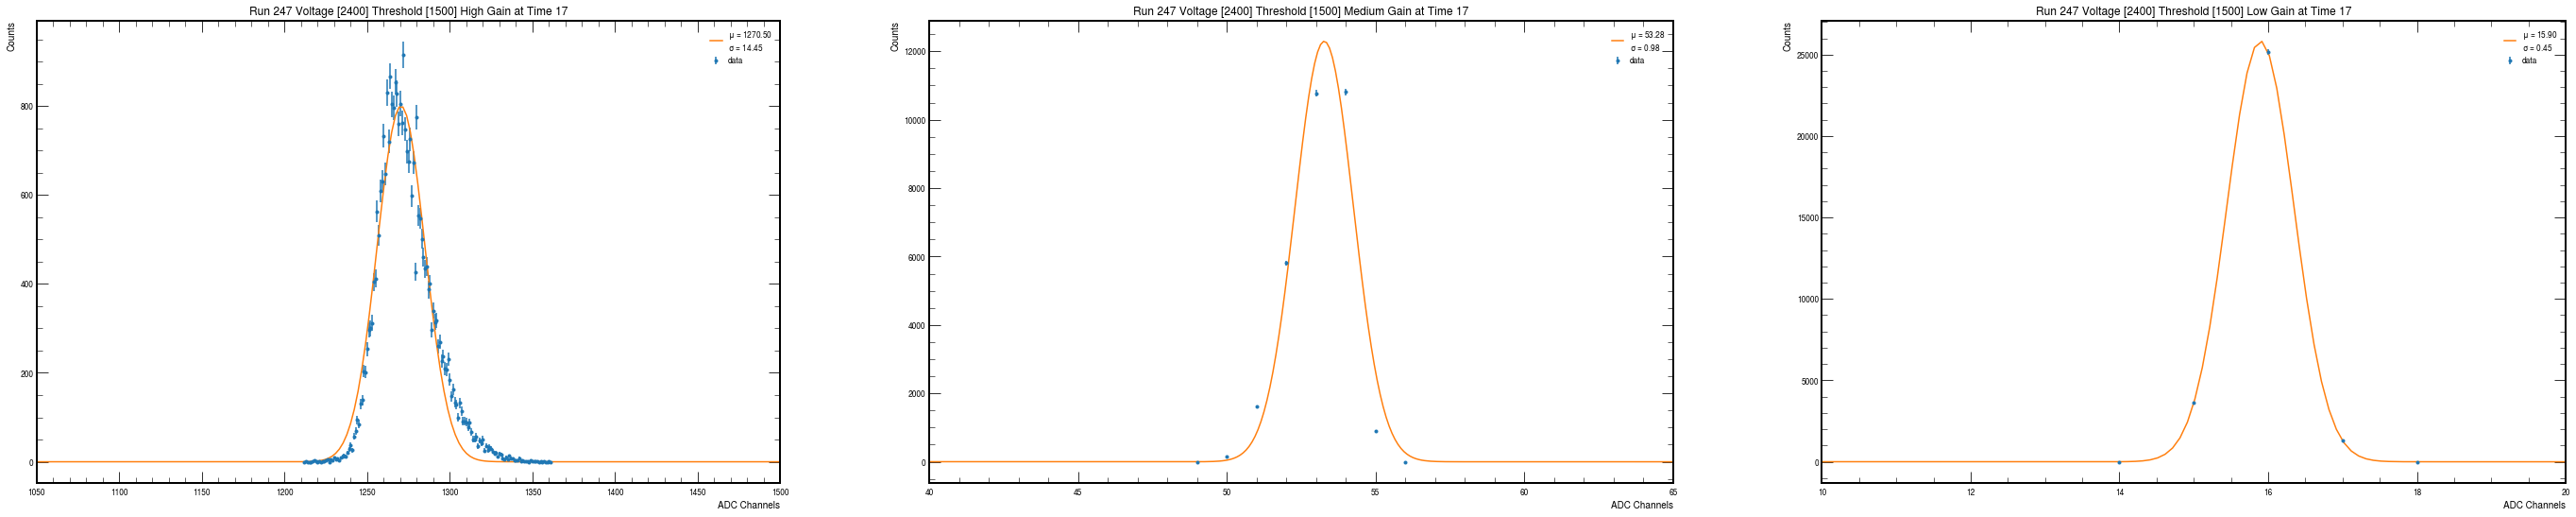

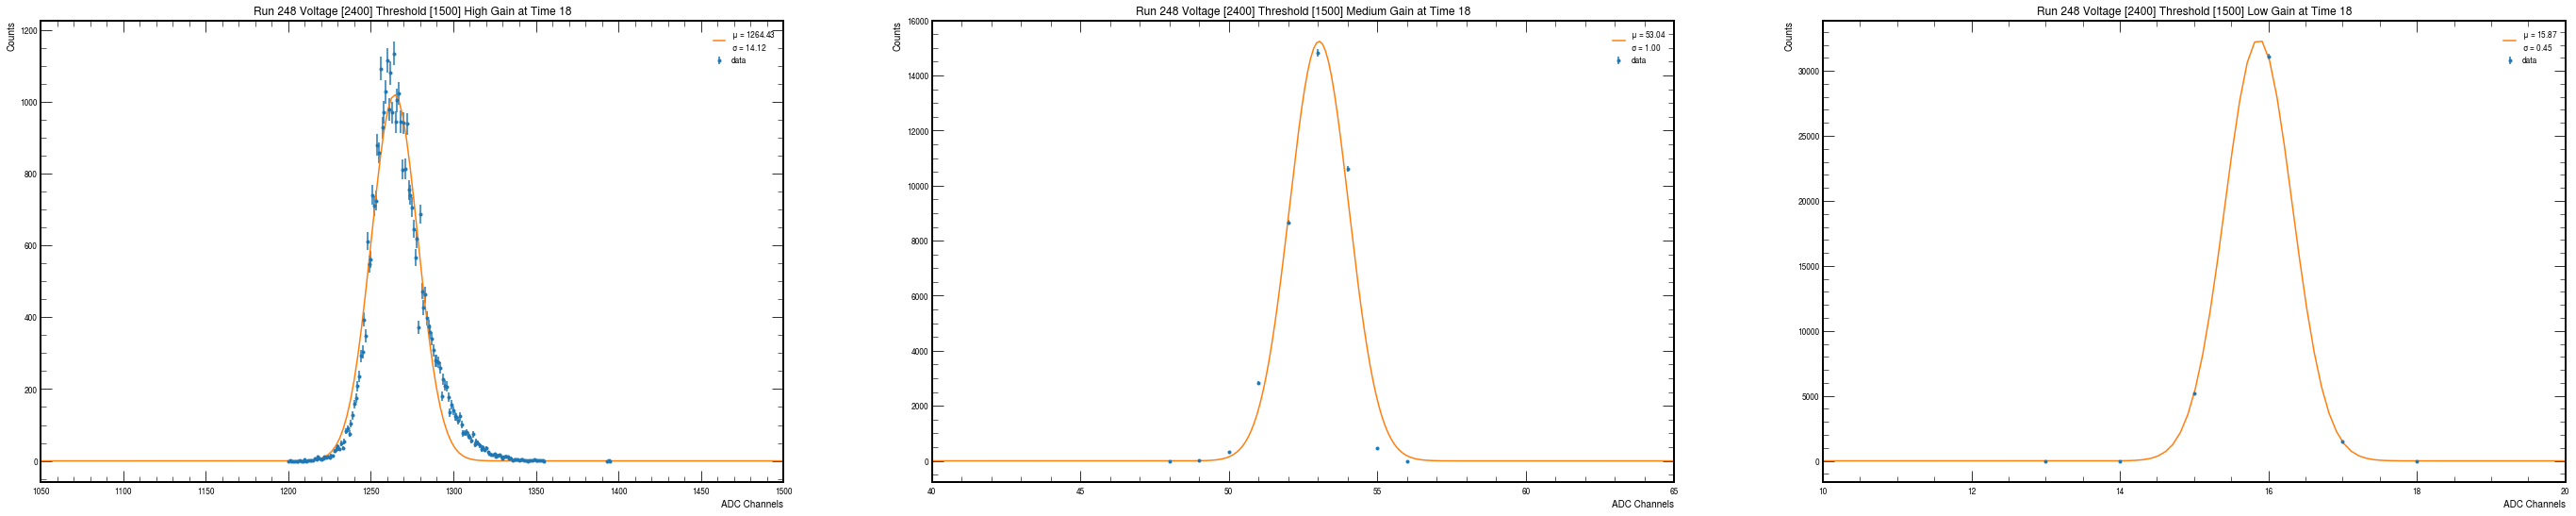

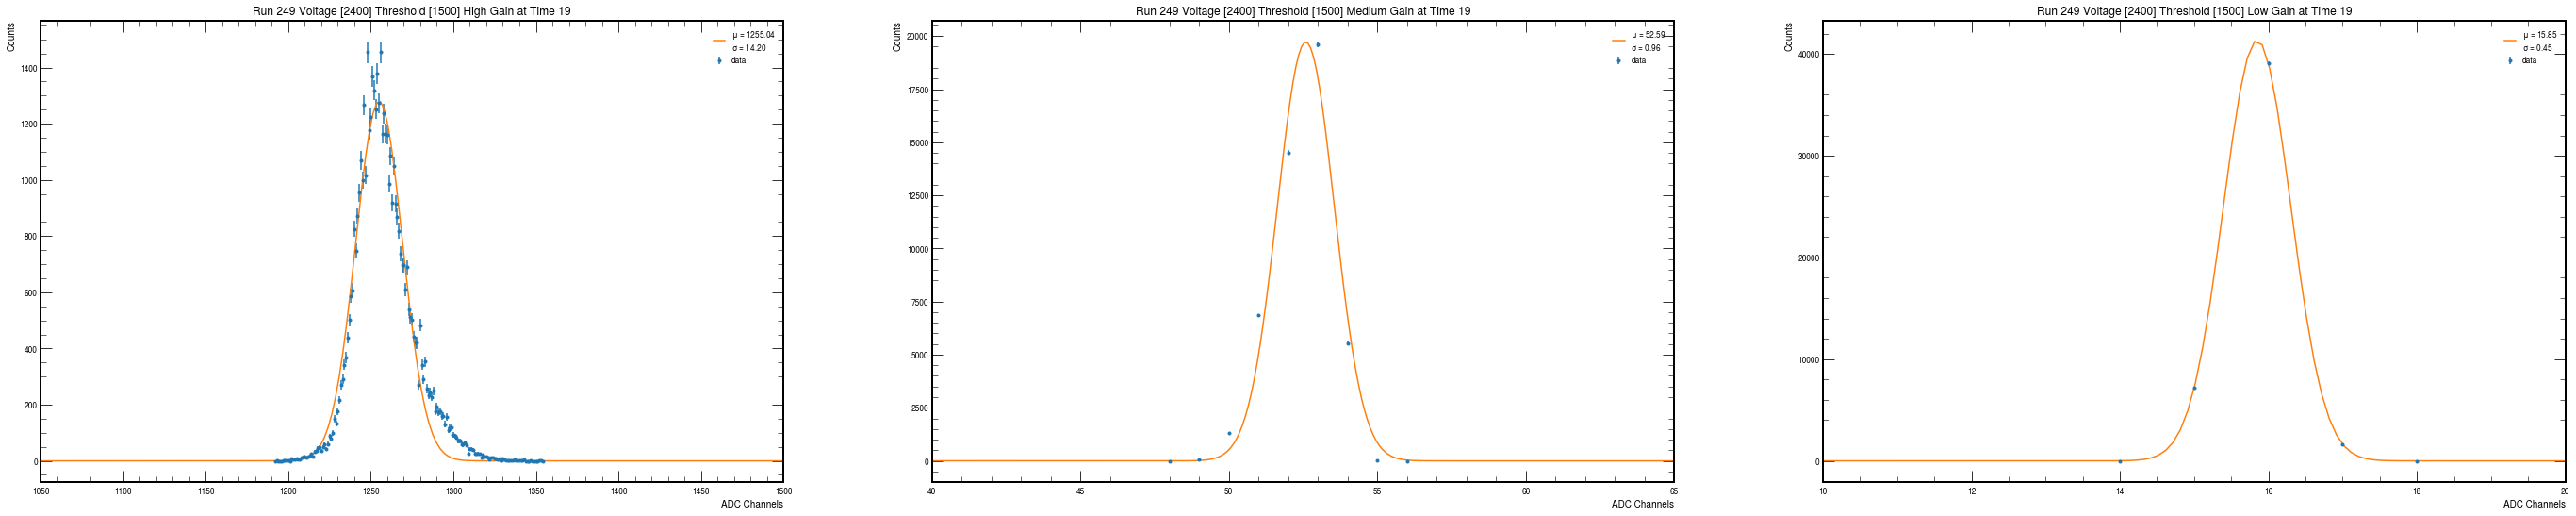

In [9]:
runnum = np.arange(233,249+1,1)
threshold = [1500]
voltage = [2400]
gain = ["High", "Medium", "Low"]
time = [20,21,22,23,24,8.33,9,10,11,12,13,14,15,16,17,18,19]

din = {}
din["Count"] = np.array([])
for i in range(3):
    din[gain[i]] = np.array([])
    din[gain[i]+" Sigma"] = np.array([])

for j in range(len(runnum)):
    hist_x = {}
    hist_y = {}
    for elem in gain:
        hist_x[f"{elem}"] = np.array([])
        hist_y[f"{elem}"] = np.array([])

    for i in range(3):
        with open(f"Condor Data/run_0000{runnum[j]}/run_0000{runnum[j]}_adc{i}_hist.dat") as f:
            for line in f:
                line = line.partition('#')[0].split(' ')
                if(len(line)>1):
                    hist_x[gain[i]] = np.append(hist_x[gain[i]],float(line[0]))
                    hist_y[gain[i]] = np.append(hist_y[gain[i]],float(line[1]))
    din["Count"] = np.append(din["Count"],float(np.sum(hist_y[gain[0]])))
    fig, axs = plt.subplots(1,3,figsize=(48,9))
    for i in range(3):
        plt.sca(axs[i])
        plt.title(f"Run {runnum[j]} Voltage {voltage} Threshold {threshold} {gain[i]} Gain at Time {time[j]}")
        plt.errorbar(hist_x[gain[i]],hist_y[gain[i]],yerr=np.sqrt(hist_y[gain[i]]), linestyle='', marker='o', label='data', markersize=3)
        coeff, covar = curve_fit(Gauss,hist_x[gain[i]],hist_y[gain[i]], p0 = (1500,1250,25) if i ==0 else ((5000,50.5,1) if i ==1 else (5000,16,0.5)),maxfev=8000)
        x=np.linspace(1050, 1500, 200) if i == 0 else np.linspace(0, 100, 1000)
        plt.plot(x, Gauss(x,*coeff), label=f"$\mu$ = {coeff[1]:.2f}\n$\sigma$ = {abs(coeff[2]):.2f}")
        plt.xlim((1050,1500) if i==0 else ((40,65) if i==1 else (10,20)))
        plt.xlabel("ADC Channels")
        plt.ylabel("Counts")
        plt.legend()
        din[gain[i]] = np.append(din[gain[i]],float(coeff[1]))
        din[gain[i]+" Sigma"] = np.append(din[gain[i]+" Sigma"],float(np.sqrt(covar[1][1])))
    plt.show()
    
df = pd.DataFrame(din)

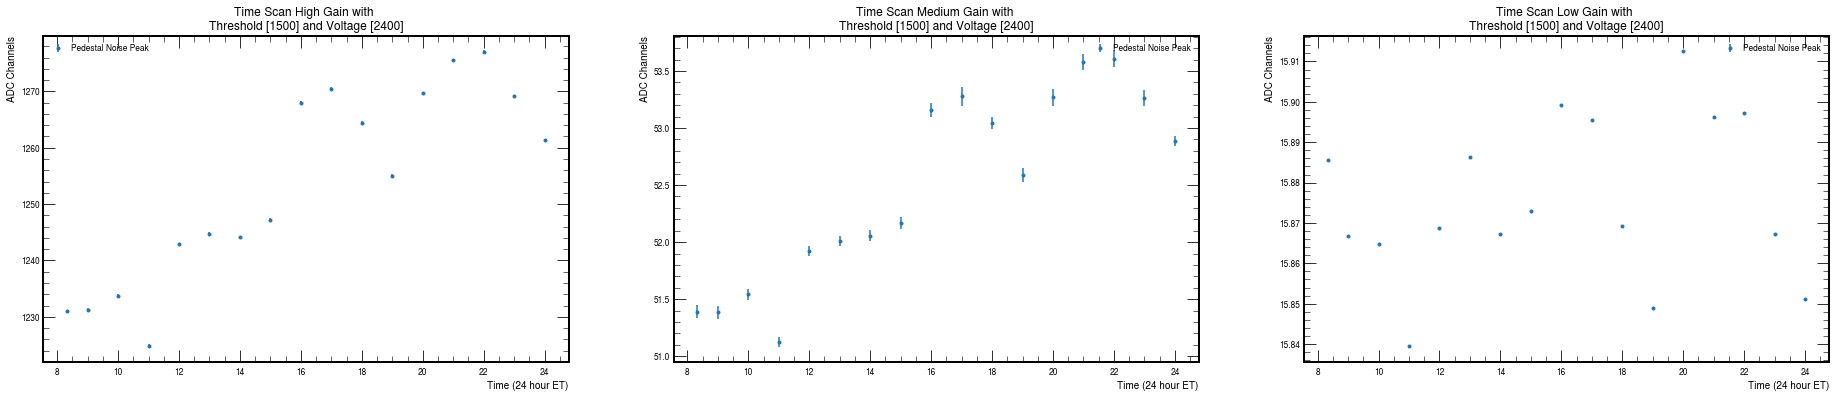

In [10]:
fig, axs = plt.subplots(1,3,figsize=(32,6))
for i in range(3):
    plt.sca(axs[i])
    plt.title(f"Time Scan {gain[i]} Gain with \nThreshold {threshold} and Voltage {voltage}")
    plt.errorbar(time,df[gain[i]],yerr=din[gain[i]+" Sigma"], linestyle='', marker='o', label='Pedestal Noise Peak', markersize=3)
    plt.ylabel("ADC Channels")
    plt.xlabel("Time (24 hour ET)")
    plt.legend()
plt.show()

Text(0.5, 1.0, 'Rate with Threshold [1500] and Voltage [2400]')

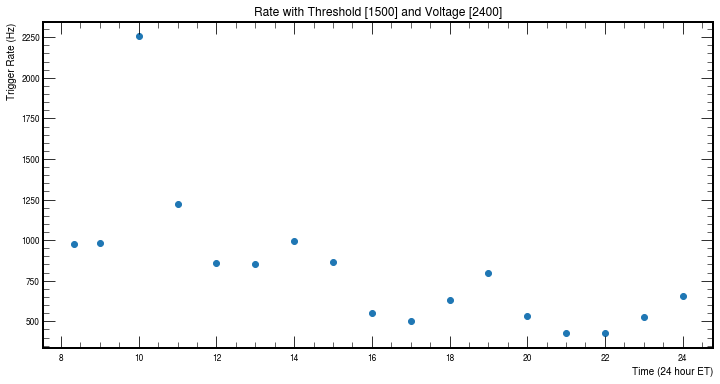

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(time,df["Count"]/60)
plt.xlabel("Time (24 hour ET)")
plt.ylabel("Trigger Rate (Hz)")
plt.title(f"Rate with Threshold {threshold} and Voltage {voltage}")